# • DOMAIN: Smartphone, Electronics
# • CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.
• DATA DESCRIPTION:
• author : name of the person who gave the rating
• country : country the person who gave the rating belongs to

# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [1]:
import pandas as pd
import numpy as np
from surprise import SVD, accuracy,Dataset,Reader
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, KNNWithMeans
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from surprise.model_selection import train_test_split
from collections import defaultdict
from surprise.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

In [2]:
encoding = 'iso-8859-1'
df1 = pd.read_csv('phone_user_review_file_1.csv', encoding=encoding)
df2 = pd.read_csv('phone_user_review_file_2.csv', encoding=encoding)
df3 = pd.read_csv('phone_user_review_file_3.csv', encoding=encoding)
df4 = pd.read_csv('phone_user_review_file_4.csv', encoding=encoding)
df5 = pd.read_csv('phone_user_review_file_5.csv', encoding=encoding)
df6 = pd.read_csv('phone_user_review_file_6.csv', encoding=encoding)

In [3]:
print('Shape of df1 ', df1.shape)
print('Shape of df2 ', df2.shape)
print('Shape of df3 ', df3.shape)
print('Shape of df4 ', df4.shape)
print('Shape of df5 ', df5.shape)
print('Shape of df6 ', df6.shape)

Shape of df1  (374910, 11)
Shape of df2  (114925, 11)
Shape of df3  (312961, 11)
Shape of df4  (98284, 11)
Shape of df5  (350216, 11)
Shape of df6  (163837, 11)


In [4]:
print('columns of df1 ', df1.columns)
print('columns of df2 ', df2.columns)
print('columns of df3 ', df3.columns)
print('columns of df4 ', df4.columns)
print('columns of df5 ', df5.columns)
print('columns of df6 ', df6.columns)

columns of df1  Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
columns of df2  Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
columns of df3  Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
columns of df4  Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
columns of df5  Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
columns of df6  Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object'

# A. Merge all the provided CSVs into one dataFrame.

In [5]:
concatList = [df1, df2, df3,df4, df5,df6]  # List of your dataframes
df = pd.concat(concatList, ignore_index=True)
del df1, df2, df3,df4, df5,df6

In [6]:
df.shape

(1415133, 11)

In [7]:
totalRecord = 0;
for dataframe in concatList:
    totalRecord = totalRecord + dataframe.shape[0]
totalRecord

1415133

### Total record number is same when using pandas concat function vs total record in all the dataframe

# B. Explore, understand the Data and share at least 2 observations. [2 Marks]

### Check the info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


### Observation : Looks like there are null value present in score, Score_max, extract, author and product

### Checking the datatype of dataframe

In [9]:
df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

### Score and score_max is of float type
### Other than score and score max, rest of the features are object

### Checking for null value in the dataframe

In [10]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

### Observation : There are lot of null values in the features like score, score_max, extract, author 
### One null value in product feature.

### Let Explore the list of unique product we have

In [11]:
df['product'].unique()

array(['Samsung Galaxy S8',
       'Samsung Galaxy S8 (64GB) G950U 5.8" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)',
       'Samsung Galaxy S8 64GB (AT&T)', ..., 'Maxon MX-3204',
       'Maxon 3204', 'Alcatel Club Plus Handy'], dtype=object)

### Finding the record which has null product.

In [12]:
df[df['product'].isnull()]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
802795,/cellphones/samsung-galaxy-s-iii/,1/22/2014,de,de,Amazon,amazon.de,10.0,10.0,Bestes Smartphone was ich bisher hatte :) Ã¶af...,NaN,NaN


### displaying the 5 point summary

In [13]:
df.describe(include='all')

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
count,1415133,1415133,1415133,1415133,1415133,1415133,1.351644e+06,1351644.0,1395772,1351931,1415132
unique,5556,7728,22,42,331,384,NaN,NaN,1321353,801103,61313
top,/cellphones/samsung-galaxy-s-iii/,7/18/2016,en,us,Amazon,amazon.com,NaN,NaN,#NAME?,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"
freq,17093,3244,554746,318435,728471,214776,NaN,NaN,667,76978,5226
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.007060e+00,10.0,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.616121e+00,0.0,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e-01,10.0,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.200000e+00,10.0,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.200000e+00,10.0,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,10.0,NaN,NaN,NaN


### Maximum rating is given on date 7/18/2016. The soruce from where the rating was taken is "AMAZON". The top Most product is "Lenovo Vibe K4 Note (White,16GB)" which are found in 5226.
### Total number of unique product is 61313 out of 1415132.  Data are retrieved from  42 unique country.
### Min value of rating score is near to 0.2 
### Max value of score is 10.
### Mean value of score is near about 8.
### 75% of records are having 10 rating and max value is 10.
### score max has min, max , mean value as 10.

#### Checking the min and max value of score in dataframe.

In [14]:
print('minimum value is ', df['score'].min())
print('maximum value is ', df['score'].max())

minimum value is  0.2
maximum value is  10.0


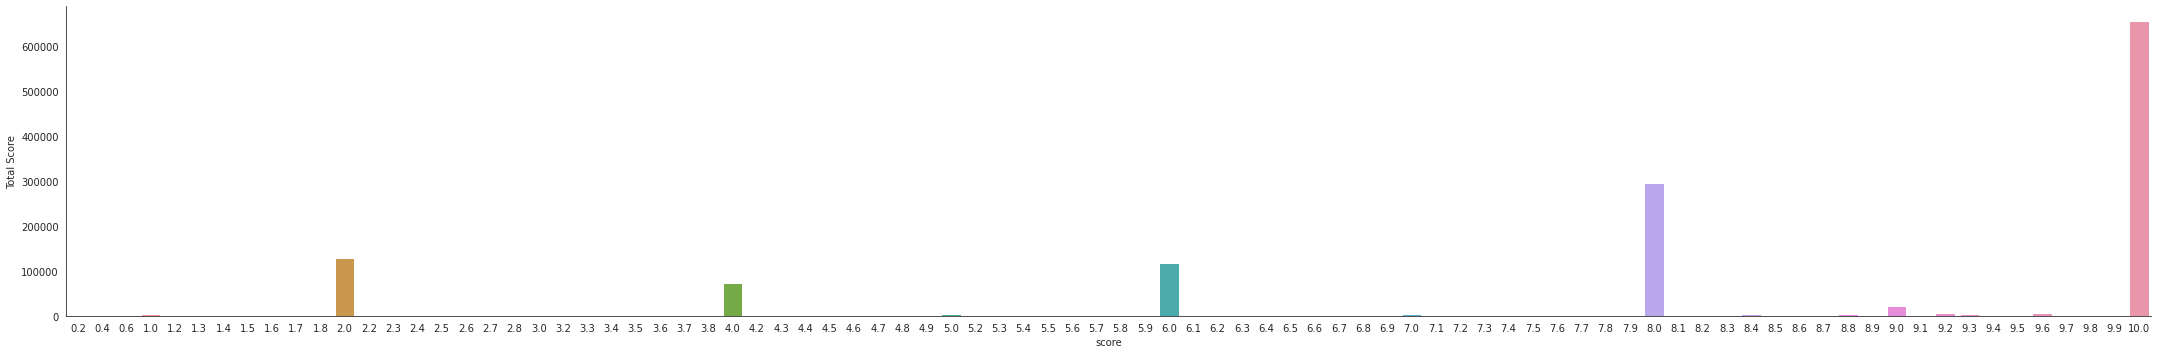

In [15]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("score", data=df, aspect=6.0,kind='count')
    g.set_ylabels("Total Score") 

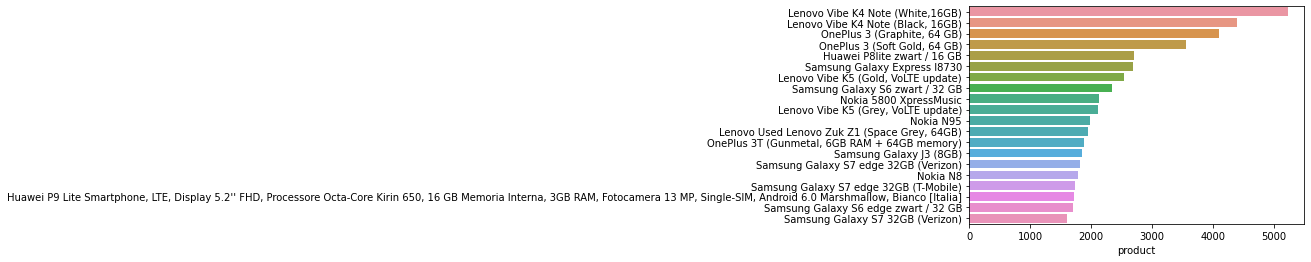

In [16]:
product = df['product'].value_counts()[:20]
sns.barplot(y=product.index,x=product)
plt.tight_layout()
plt.show()

### Observations :
### As per the countplt, Most of the smartphone received rating of 10.
### Small percentage of smartphone achieved  above 9.0 rating  . This is very less in number
### 2nd most highest rated score is 8. 
### Someof the smartphone received 2 rating.
### Most selling smartphone is Lenevo vibe K4 Note (white 16GB). The above plot show the top 20 most selling product.

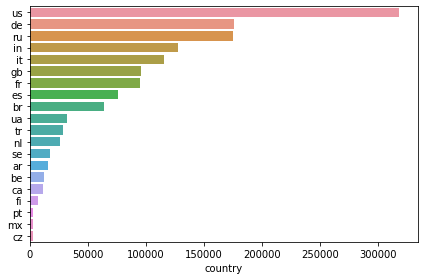

In [17]:
### Who country user has given most rating.
country = df['country'].value_counts()[:20]
sns.barplot(y=country.index,x=country)
plt.tight_layout()
plt.show()

### Observations 
    1). US people has given most of the rating .
    2) de is the second country which is on 2nd number
    3) de and ru are giving almost same number rating.

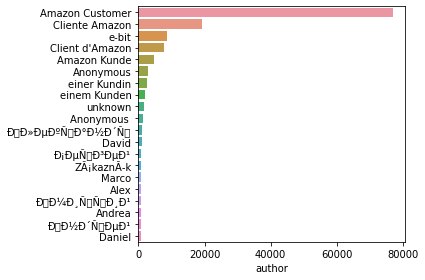

Amazon Customer       76978
Cliente Amazon        19304
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
Anonymous              2750
einer Kundin           2610
einem Kunden           1898
unknown                1738
Anonymous              1461
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1071
David                  1016
Ð¡ÐµÑÐ³ÐµÐ¹            904
ZÃ¡kaznÃ­k              898
Marco                   866
Alex                    861
ÐÐ¼Ð¸ÑÑÐ¸Ð¹          849
Andrea                  822
ÐÐ½Ð´ÑÐµÐ¹            779
Daniel                  733
Name: author, dtype: int64

In [18]:
### Which author has given most rating. Displaying only 20 authors
source = df['author'].value_counts()[:20]
sns.barplot(y=source.index,x=source)
plt.tight_layout()
plt.show()
source

### Most active user is "Amazon Customer"
### Most of the author are Anonymous and some are having name but they are very less in numbers.
### More name are written in some other language other than english.
Lets re-name the individual user to "Anonymous". Name like 'CarolAnn35' and Anonymous are treated in the same way. So better to rename it as "Anonymous"

In [19]:
df['author'].unique()

array(['CarolAnn35', 'james0923', 'R. Craig', ..., 'Christiane14',
       'michaelawr', 'claudia0815'], dtype=object)

In [20]:
# I tried to replace all the columns other than excluded value to  Anonymous, but it is taking infinite time. Hence going with limited number of columns
# excluded_value = ['Amazon Customer','Cliente Amazon','e-bit', "Client d'Amazon",'Amazon Kunde' ,'Anonymous' ]
# replaced_values = [value for value in df['author'].unique() if value not in excluded_value]

# df['author'].replace(to_replace = replaced_values, 
#                           value = 'Anonymous', 
#                           inplace=True)

In [21]:
replaced_values = ['Anonymous','einer Kundin','einem Kunden', "Anonymous ",'unknown' ,'ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ','David', "Ð¡ÐµÑÐ³ÐµÐ¹", "ZÃ¡kaznÃ­k"]

df['author'].replace(to_replace = replaced_values, 
                          value = 'Anonymous', 
                          inplace=True)

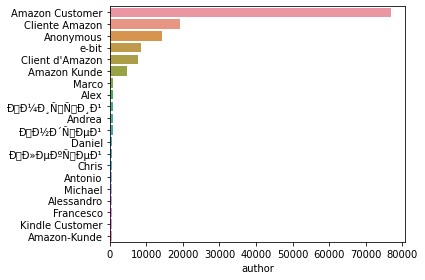

Amazon Customer    76978
Cliente Amazon     19304
Anonymous          14346
e-bit               8663
Client d'Amazon     7716
Amazon Kunde        4750
Marco                866
Alex                 861
ÐÐ¼Ð¸ÑÑÐ¸Ð¹       849
Andrea               822
ÐÐ½Ð´ÑÐµÐ¹         779
Daniel               733
ÐÐ»ÐµÐºÑÐµÐ¹       732
Chris                689
Antonio              648
Michael              643
Alessandro           597
Francesco            590
Kindle Customer      570
Amazon-Kunde         534
Name: author, dtype: int64

In [22]:
### checking again 
### Which author has given most rating.
source = df['author'].value_counts()[:20]
sns.barplot(y=source.index,x=source)
plt.tight_layout()
plt.show()
source

### C. Round off scores to the nearest integers. [3 Marks]

In [23]:
df.head(40)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [24]:
### Checking the unique Score in the dataframe 

In [25]:
df.score.unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

In [26]:
### Printing the count of product by score wise

In [27]:
df.groupby(by='score')['product'].count().head(20)

score
0.2        40
0.4         2
0.6         4
1.0      3172
1.2        13
1.3        42
1.4        13
1.5         1
1.6        15
1.7        55
1.8        12
2.0    128485
2.2        33
2.3        95
2.4        45
2.5        21
2.6        33
2.7       148
2.8        98
3.0      1887
Name: product, dtype: int64

In [28]:
df['score'].isna().sum()

63489

In [29]:
def roundoff(x):
    if pd.isna(x):
        return x
    else:
        return round(x)
df['score'] = df['score'].apply(roundoff)

In [30]:
df.groupby(by='score')['product'].count().head(20)

score
0.0         42
1.0       3244
2.0     128762
3.0       2513
4.0      73333
5.0       4730
6.0     118349
7.0       8771
8.0     305550
9.0      40602
10.0    665747
Name: product, dtype: int64

In [31]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


#### Observation:  
###### The score which is in fractional are imputed with round function. 
###### The missing value imputation is still pending.         

### D. Check for missing values. Impute the missing values, if any. [2 Marks]

In [32]:
df['score'] = df['score'].fillna(df['score'].median())

In [33]:
df['score'].isna().sum()

0

In [34]:
df['score_max'] = df['score_max'].fillna(df['score_max'].median())

In [35]:
df['score'] = df['score'].astype('int')
df['score_max'] = df['score_max'].astype('int')

### Checking how many null value are present in the dataframe

In [36]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

### We can see that there are feature like author, extract, product having null value. lets remove that feture

In [37]:
#drop NaNs in 'publisher' column
df.dropna(subset=['extract', 'author', 'product'], inplace=True)
df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

### Observation : Now there is no column left with missing value.

# E. Check for duplicate values and remove them, if any. [2 Marks]

In [38]:
### checking for duplicate 

In [39]:
df.shape

(1336416, 11)

In [40]:
df.duplicated().sum()

4823

In [41]:
### Remvoing 4823 rows 

In [42]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [43]:
df.shape

(1331593, 11)

### Duplicate values are removed from the dataframe.

# F. Keep only 1 Million data samples. Use random state=612. [2 Marks]

In [44]:
df_sample = df.sample(n=1000000, random_state=612)

In [45]:
df_sample.shape

(1000000, 11)

### G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]

In [46]:
df_sample = df_sample[['author', 'product', 'score']]

In [47]:
df_sample.head()

,author,product,score
8765,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10
145859,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB,10
1203260,katha_maria93,Sony Ericsson W395 blush titanium Handy,8
1205666,paul george,Apple iPhone 3G 8GB SIM-Free - Black,2


# 2. Answer the following questions.

### A. Identify the most rated products. 

In [48]:
df_grouped = df_sample.groupby(['product']).agg({'score':'count'})
df_grouped['Average_rating']= df_sample.groupby(['product']).agg({'score':'mean'})
grouped_sum = df_grouped['score'].sum()
df_grouped['Percentage'] =df_grouped['score'].div(grouped_sum)*100
df_most_rating_product = df_grouped.sort_values(['score', 'Average_rating', 'product'], ascending=[0,0,1])
df_most_rating_product.head(10)

,score,Average_rating,Percentage
product,,,
"Lenovo Vibe K4 Note (White,16GB)",3913,7.158191,0.3913
"Lenovo Vibe K4 Note (Black, 16GB)",3228,7.167906,0.3228
"OnePlus 3 (Graphite, 64 GB)",3127,8.690758,0.3127
"OnePlus 3 (Soft Gold, 64 GB)",2643,8.503216,0.2643
Huawei P8lite zwart / 16 GB,1994,8.465898,0.1994
Samsung Galaxy Express I8730,1982,8.993946,0.1982
"Lenovo Vibe K5 (Gold, VoLTE update)",1865,6.834316,0.1865
Samsung Galaxy S6 zwart / 32 GB,1729,8.991324,0.1729
"Lenovo Vibe K5 (Grey, VoLTE update)",1596,6.726817,0.1596


### Above is 10 top rated product with average rating as well as percentage.

### B. Identify the users with most number of reviews.

In [49]:
df_author_grouped = df_sample.groupby(['author']).agg({'score':'count'}).reset_index().rename(columns={'score': 'count'})
author_grouped_sum = df_author_grouped['count'].sum()
df_grouped['Percentage'] =df_author_grouped['count'].div(author_grouped_sum)*100
df_author_grouped.sort_values(['count', 'author'], ascending=[0,1]).head(10)

,author,count
23698,Amazon Customer,57801
75728,Cliente Amazon,14656
32445,Anonymous,10406
447788,e-bit,6260
75704,Client d'Amazon,5715
24018,Amazon Kunde,3563
19203,Alex,655
237929,Marco,646
26753,Andrea,623
602598,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,611


### Amazon Customer having given total rating of 57801 
### Cliente Amazon has achievd 2nd ranking with giving no of reviews as 14656
### Above list is containing top 10 authors.

### C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset 


In [50]:
products =df_sample['product'].value_counts()
product_gt_50 = products[products>50].index.tolist()
print('Number of product which are having more than 50 rating', len(product_gt_50))

authors = df_sample['author'].value_counts()
authors_gt_50 = authors[authors>50].index.tolist()
print('Number of authors which are having more than 50 rating', len(authors_gt_50))

recordMorethan50Rating = df_sample[(df_sample['product'].isin(product_gt_50)) & (df_sample['author'].isin(authors_gt_50))] 
recordMorethan50Rating.head(10)

Number of product which are having more than 50 rating 4376
Number of authors which are having more than 50 rating 682


,author,product,score
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10
537487,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2
518771,Anonymous,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10
353663,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8
224123,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8
298148,Amazon Customer,"Lenovo Vibe X3 (White, 32GB)",10
292322,Massimo,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",8
416589,Amazon Customer,"Sony Xperia Z3 Compact Smartphone (11,7 cm (4,...",2
750342,Amazon Customer,BlackBerry Z10 (White),2
606377,Jennifer,LG Optimus Exceed 2 (Verizon Prepaid) (Discont...,2


In [51]:
print('shape of the final dataset', recordMorethan50Rating.shape)

shape of the final dataset (109237, 3)


In [52]:
df_sample= recordMorethan50Rating

### Above are the 10 records in which products are having more than 50 rating and user have given more than 50 rating.
### The shape of final Dataset  is (109237, 3)

# 3. Build a popularity based model and recommend top 5 mobile phones

### Popular items means more number of users are purchasing the product. In that case, average rating can be little bit lesser. That is the reason , we are sorting it by total number of rating first. If the total number of rating is same , then  average rating will will be considered for that records. More the average rating, more popular it is.
### If we go to Average rating only. In that case if only 1 user give the rating of 10, then it average rating will be 10 and it will come in popularity list. So better to go total number of rating first and if it is same , then take the average rating into consideration

In [53]:
df_grouped = df_sample.groupby(['product']).agg({'score':'count'}).rename(columns={'score': 'Total_no_of_rating'})
df_grouped['Avg_rating'] = df_sample.groupby(['product']).agg({'score':'mean'})
grouped_sum = df_grouped['Total_no_of_rating'].sum()
df_grouped['Percentage'] =df_grouped['Total_no_of_rating'].div(grouped_sum)*100
df_sorted = df_grouped.sort_values([ 'Total_no_of_rating','Avg_rating','product'], ascending=[0,0,1]) # Sort by desc ordering on total no of rating.If the total number of rating is same , then sort it based on average rating.
df_sorted['Rank'] = df_sorted['Total_no_of_rating'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = df_sorted.head(5) 
popularity_recommendations 

,Total_no_of_rating,Avg_rating,Percentage,Rank
product,,,,
"Lenovo Vibe K4 Note (White,16GB)",2338,6.994867,2.140300,1.0
"Lenovo Vibe K4 Note (Black, 16GB)",1900,7.026316,1.739337,2.0
"OnePlus 3 (Graphite, 64 GB)",1433,8.499651,1.311827,3.0
"OnePlus 3 (Soft Gold, 64 GB)",1317,8.338648,1.205635,4.0
"Lenovo Vibe K5 (Gold, VoLTE update)",1157,6.610199,1.059165,5.0


#### Above are the top 5 mobile phones which are popular.

# 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you


### Taking 30K samples, as it is taking too much time to fit and transform. Even in grid search it is taking infinity time to execute.

In [54]:
df_30k_sample = recordMorethan50Rating.sample(n=30000, random_state=612)

In [55]:
reader = Reader(rating_scale=(1, 10))

In [56]:
surprise_df = Dataset.load_from_df(df_30k_sample[['author', 'product', 'score']],reader) # Converting pandas dataframe into surprise understanding format.

In [57]:
surprise_df.df.head(2)

,author,product,score
225002,Amazon Customer,"Motorola Moto G 3rd Generation (White, 16GB)",6
10059,Amazon Customer,Samsung Galaxy S7 Edge Factory Unlocked Phone ...,2


In [58]:
trainset, testset = train_test_split(surprise_df, test_size=0.30, random_state=612) # split into 70:30 ratio
result={};

#### Perform RandomizedSearch and find the best parameters.

In [59]:
param_grid = {'n_factors':[1,2,3,4,5,6,7,10,20,30],'n_epochs':[10,40,50,60,70,80,90,100],  'lr_all':[0.0001,0.001,0.005,0.01,0.02],'reg_all':[0,4,0.3,0.2,0.1,0.001],
              'biased':[True,False]}
gs = RandomizedSearchCV(SVD, param_grid, measures=['rmse'], cv=3,n_iter=200,random_state=612)
gs.fit(surprise_df)
params = gs.best_params['rmse']
params


{'n_factors': 4,
 'n_epochs': 70,
 'lr_all': 0.001,
 'reg_all': 0.2,
 'biased': True}

In [60]:
#### Tuned and Predict the Accuracy, RMSE

In [61]:
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'], biased=params['biased'])
svdtuned.fit(trainset)
pred_svd = svdtuned.test(testset)
svd_rmse = accuracy.rmse(pred_svd)
result['SVD'] = svd_rmse

RMSE: 2.6572


### Displaying the prediction rating by SVD

In [62]:

prd =pd.DataFrame(pred_svd,  columns=['Author', 'Product', 'Average Rating', 'Estimated', 'Details'])
prd.sort_values(['Estimated', 'Product'], ascending=[False,True])

,Author,Product,Average Rating,Estimated,Details
110,francesco,"Lenovo Motorola Moto G Smartphone, Display HD ...",10.0,9.864318,{'was_impossible': False}
5461,giuseppe,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.0,9.674064,{'was_impossible': False}
2301,Paolo,"Lenovo Motorola Moto G LTE Smartphone, Display...",10.0,9.644761,{'was_impossible': False}
5948,Simone,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.0,9.639974,{'was_impossible': False}
1782,Simone,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,8.0,9.624146,{'was_impossible': False}
...,...,...,...,...,...
6505,Amazon Customer,"Lenovo Zuk Z1 (White, Cyanogen OS)",6.0,4.485387,{'was_impossible': False}
7226,Amazon Customer,"Lenovo Zuk Z1 (White, Cyanogen OS)",2.0,4.485387,{'was_impossible': False}
7600,Amazon Customer,"Lenovo Zuk Z1 (White, Cyanogen OS)",2.0,4.485387,{'was_impossible': False}
8406,Amazon Customer,"Lenovo Zuk Z1 (White, Cyanogen OS)",8.0,4.485387,{'was_impossible': False}


## KNNWithMeans with Item Based

#### Finding the best value of k first

In [63]:
k_range = np.arange(1,15)
rmse = []
for i in k_range:
    algo_i = KNNWithMeans(k=i, sim_options={'name': 'pearson_baseline', 'user_based': False})
    algo_i.fit(trainset)
    test_pred=algo_i.test(testset)
    rmse.append(accuracy.rmse(test_pred))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.5424
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.1923
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.0586
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.0304
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9831
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9613
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9404
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Text(0.5, 1.0, 'Item Based KNNwithMean')

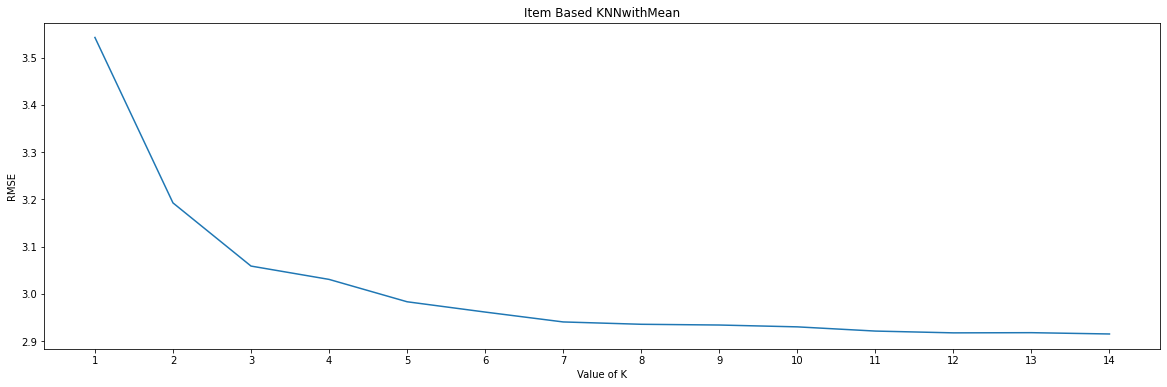

In [64]:
plt.figure(figsize=(20,6))
plt.plot(k_range, rmse)
plt.xticks(k_range);
plt.xlabel('Value of K')
plt.ylabel('RMSE')
plt.title('Item Based KNNwithMean')

In [65]:
### Looks like K=7 give low RMSE, After that there is linear line .
knn_item_based = KNNWithMeans(k=7, sim_options={'name': 'pearson_baseline', 'user_based': False})
knn_item_based.fit(trainset)
knn_item_based_prediction=knn_item_based.test(testset)
knn_item_based_rmse = accuracy.rmse(knn_item_based_prediction)
result['KNNWithMean Item Based'] = knn_item_based_rmse

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9404


### Displaying the prediction by KNNMean with Item based

In [66]:
prd =pd.DataFrame(knn_item_based_prediction,  columns=['Author', 'Product', 'Average Rating', 'Estimated', 'Details'])
prd.sort_values(['Estimated', 'Product'], ascending=[False,True])

,Author,Product,Average Rating,Estimated,Details
5161,Jim,"ASUS ZenFone 2 Deluxe Special Edition, Unlocke...",6.0,10.0,"{'actual_k': 1, 'was_impossible': False}"
452,Amazon Customer,"ASUS ZenFone 3 MAX ZC520TL Smartphone, 5.2-inc...",10.0,10.0,"{'actual_k': 7, 'was_impossible': False}"
6302,Amazon Customer,"Acer Liquid E2 Duo 11,4 cm (4,5 Zoll) Smartpho...",2.0,10.0,"{'actual_k': 1, 'was_impossible': False}"
8858,Amazon Customer,"Acer Liquid Z3 Dual SIM Smartphone (8,9 cm (3,...",10.0,10.0,"{'actual_k': 0, 'was_impossible': False}"
2674,Jose,Alcatel One Touch 997D - Smartphone libre (pan...,8.0,10.0,"{'actual_k': 2, 'was_impossible': False}"
...,...,...,...,...,...
3644,Charles,Samsung G130 Galaxy Young 2 SIM-Free Smartphon...,8.0,1.0,"{'actual_k': 2, 'was_impossible': False}"
3305,Pen Name,Samsung Galaxy S6 Edge G925a 64GB Unlocked GSM...,6.0,1.0,"{'actual_k': 1, 'was_impossible': False}"
812,Melanie,"Samsung Star 3 S5220 Smartphone (7,6 cm (3 Zol...",10.0,1.0,"{'actual_k': 1, 'was_impossible': False}"
3006,davide,"Sony C2105 Xperia L Smartphone, Fotocamera 8 M...",10.0,1.0,"{'actual_k': 1, 'was_impossible': False}"


### KNNWithMean User based

In [67]:
k_range = np.arange(1,10)
rmse = []
for i in k_range:
    algo_i = KNNWithMeans(k=i, sim_options={'name': 'pearson_baseline', 'user_based': True})
    algo_i.fit(trainset)
    test_pred=algo_i.test(testset)
    rmse.append(accuracy.rmse(test_pred))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.4861
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.1525
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.0197
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9966
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9494
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9259
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.9059
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Text(0.5, 1.0, 'User Based KNNwithMean')

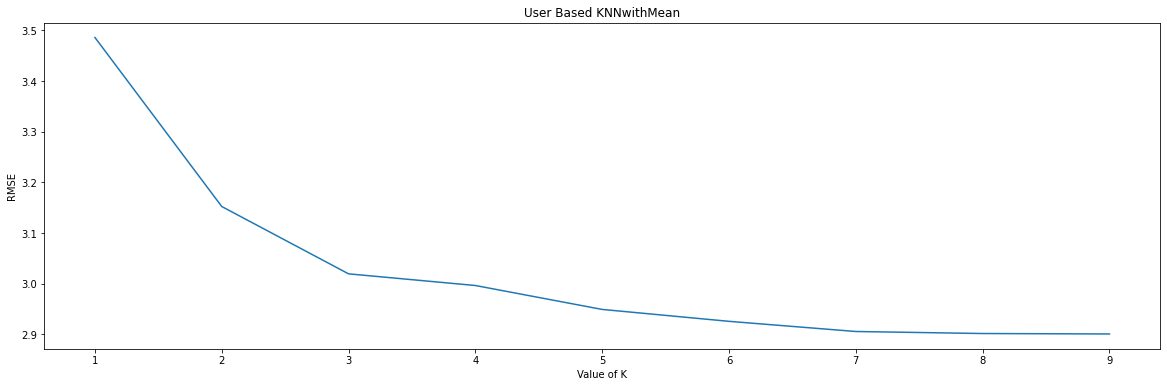

In [68]:
### Looks like K=7 give low RMSE, After that there is linear line .
plt.figure(figsize=(20,6))
plt.plot(k_range, rmse)
plt.xticks(k_range);
plt.xlabel('Value of K')
plt.ylabel('RMSE')
plt.title('User Based KNNwithMean')

In [69]:
knn_user_based = KNNWithMeans(k=7, sim_options={ 'user_based': True})
knn_user_based.fit(trainset)
knn_user_based_prediction=knn_user_based.test(testset)
knn_user_based_prediction_rmse = accuracy.rmse(knn_user_based_prediction)
result['KNNWithMean User Based'] =knn_user_based_prediction_rmse
prd =pd.DataFrame(knn_user_based_prediction,  columns=['Author', 'Product', 'Average Rating', 'Estimated', 'Details'])
prd.sort_values(['Estimated', 'Product'], ascending=[False,True])

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.9212


,Author,Product,Average Rating,Estimated,Details
1646,Anonymous,"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui...",8.0,10.0,"{'actual_k': 7, 'was_impossible': False}"
5161,Jim,"ASUS ZenFone 2 Deluxe Special Edition, Unlocke...",6.0,10.0,"{'actual_k': 1, 'was_impossible': False}"
452,Amazon Customer,"ASUS ZenFone 3 MAX ZC520TL Smartphone, 5.2-inc...",10.0,10.0,"{'actual_k': 4, 'was_impossible': False}"
7715,luigi,"Alcatel One Touch 997D Dual SIM, Display 4.3 P...",8.0,10.0,"{'actual_k': 2, 'was_impossible': False}"
7002,miguel,Alcatel OneTouch Idol 3 Global Unlocked 4G LTE...,10.0,10.0,"{'actual_k': 7, 'was_impossible': False}"
...,...,...,...,...,...
376,Joan,LG G3 D855 - Smartphone libre Android (pantall...,6.0,1.0,"{'actual_k': 1, 'was_impossible': False}"
2868,Ken,Nokia Asha 210 SIM-Free Mobile Phone - Black,10.0,1.0,"{'actual_k': 1, 'was_impossible': False}"
59,Amazon Customer,Samsung Galaxy Core Prime,10.0,1.0,"{'actual_k': 2, 'was_impossible': False}"
8710,Max,"Sony Ericsson W205 ambient Handy (MP3, 1.3 MP,...",8.0,1.0,"{'actual_k': 2, 'was_impossible': False}"


### 5. Evaluate the collaborative model. Print RMSE value. [2 Marks]

In [70]:
model_rmse_df = pd.DataFrame(result.values(), index=result.keys(), columns=['RMSE'])
model_rmse_df

,RMSE
SVD,2.657164
KNNWithMean Item Based,2.940381
KNNWithMean User Based,2.921239


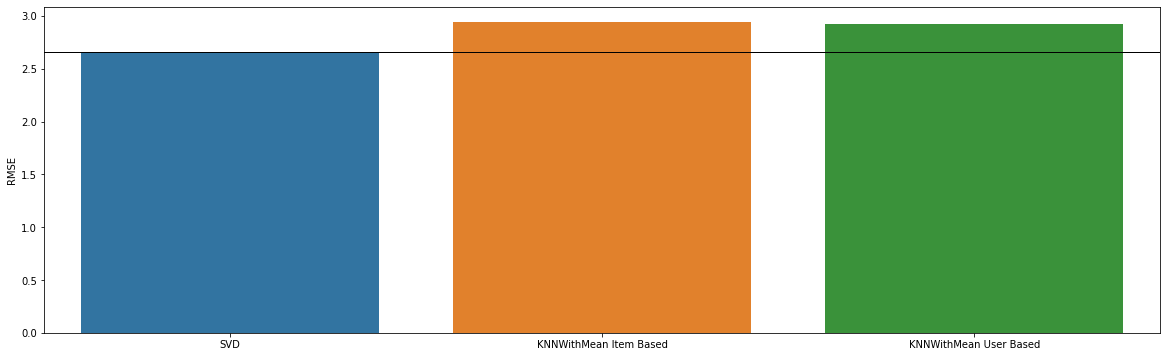

In [71]:
plt.figure(figsize=(20,6))
g = sns.barplot(x=model_rmse_df.index, y=model_rmse_df.RMSE)
plt.axhline(y=model_rmse_df.RMSE[0],linewidth=1, color='k')

### SVD is having smaller RMSE than KNNWithMean user and ITEM based

### 6. Predict score (average rating) for test users. [2 Marks]

In [72]:
svd_pred_df = pd.DataFrame(pred_svd, columns=['uid', 'iid', 'rui', 'est', 'detail'])
print('Average prediction for test user ', svd_pred_df['est'].mean())
print('Average rating for test user ', svd_pred_df['rui'].mean())
print('Average Error for test user ', (np.abs(svd_pred_df['rui'].mean() - svd_pred_df['est'].mean())).mean())

Average prediction for test user  7.828529546992938
Average rating for test user  7.813888888888889
Average Error for test user  0.014640658104048576


#### for KNNWithMean User Based

In [73]:
knn_user_based_df = pd.DataFrame(knn_user_based_prediction, columns=['uid', 'iid', 'rui', 'est', 'detail'])
print('Average prediction for test user ', knn_user_based_df['est'].mean())
print('Average rating for test user ', knn_user_based_df['rui'].mean())
print('Average Error for test user ', (np.abs(knn_user_based_df['rui'].mean() - knn_user_based_df['est'].mean())).mean())

Average prediction for test user  7.770638062498722
Average rating for test user  7.813888888888889
Average Error for test user  0.04325082639016742


#### for KNNWithMean Item Based

In [74]:
knn_item_based_df = pd.DataFrame(knn_item_based_prediction, columns=['uid', 'iid', 'rui', 'est', 'detail'])
print('Average prediction for test user ', knn_item_based_df['est'].mean())
print('Average rating for test user ', knn_item_based_df['rui'].mean())
print('Average Error for test user ', (np.abs(knn_item_based_df['rui'].mean() - knn_item_based_df['est'].mean())).mean())

Average prediction for test user  7.732003099661752
Average rating for test user  7.813888888888889
Average Error for test user  0.08188578922713674


### 7. Report your findings and inferences. [2 Marks]

##### SVD is having less Root mean square error(RMSE) than other two. So SVD is best predictor amongs them
##### Most of the Users are from amazon
##### Most selling phone is Lenovo Vibe K4 Note (White,16GB)
##### KNN with item or User based are giving almost the same RMSE.
##### Most of the user has given 8 or 10 rating to  products.
#### Error rate in SVD is  0.0044.
#### Error rate in KNN User Based is  0.043.
#### Error rate in KNN Item Based is  0.081.
### SVD is best amongs them

### 8. Try and recommend top 5 products for test users. [5 Marks]

In [75]:
# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    top_n_set = defaultdict(set)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        #print(user_ratings)
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        #top_n[uid] = user_ratings[:n]
        top_n_set[uid] = user_ratings[:n] ### Set is used so that unique result will be displayed to user.
    return top_n_set

In [76]:
top5Product_each_user = get_top_n(knn_item_based_prediction)

for author in top5Product_each_user:
    recommend5Product_User = []
    for a,b in top5Product_each_user[author]:
        recommend5Product_User.append((author,a,b))
    display(pd.DataFrame(recommend5Product_User, columns=['Author', 'Product', 'Rating']).head())

,Author,Product,Rating
0,Amazon Customer,"Sony Xperia Z Ultra (Black, 16GB)",10
1,Amazon Customer,Lumia Microsoft Nokia Lumia 640 RM-1073 Unlock...,10
2,Amazon Customer,"Motorola Droid RAZR HD XT926 Verizon Wireless,...",10
3,Amazon Customer,"ASUS ZenFone 3 MAX ZC520TL Smartphone, 5.2-inc...",10
4,Amazon Customer,Motorola Moto X 32GB Developer Editon - Verizo...,10


,Author,Product,Rating
0,Anonymous,Samsung Galaxy S4 16GB (T-Mobile),10
1,Anonymous,Samsung Galaxy S6 edge+ 32GB (T-Mobile),10
2,Anonymous,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",10
3,Anonymous,"Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5...",10
4,Anonymous,Samsung Galaxy S6 32GB (Verizon),10


,Author,Product,Rating
0,Francisco,Alcatel Onetouch 2004C - MÃ³vil libre (pantall...,10.000000
1,Francisco,JIAYU G4S - Smartphone libre Android (pantalla...,9.000000
2,Francisco,JIAYU G4S - Smartphone libre Android (pantalla...,9.000000
3,Francisco,Huawei P8 Champagne / 16 GB,8.363636
4,Francisco,Apple iPhone 5S - Smartphone libre iOS (pantal...,7.688889


,Author,Product,Rating
0,Ð ÑÑÐ»Ð°Ð½,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.989561
1,Ð ÑÑÐ»Ð°Ð½,LG X power (Ð·Ð¾Ð»Ð¾ÑÐ¸ÑÑÑÐ¹),9.634023
2,Ð ÑÑÐ»Ð°Ð½,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),9.579263
3,Ð ÑÑÐ»Ð°Ð½,LG K7 (ÑÐµÑÐ½ÑÐ¹),9.166667
4,Ð ÑÑÐ»Ð°Ð½,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.084326


,Author,Product,Rating
0,Daniele,"Huawei Ascend G7 Smartphone, 16 GB, Grigio",10.000000
1,Daniele,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero...",10.000000
2,Daniele,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.944450
3,Daniele,"Samsung Galaxy S3 mini I8190 Smartphone, Displ...",9.594457
4,Daniele,elephone P8000 Smartphone 4G FDD-LTE 64bit MTK...,9.565732


,Author,Product,Rating
0,Alex,"Huawei U8860 Smartphone (10,2 cm (4 Zoll) Disp...",10
1,Alex,Sim Free Apple iPhone SE 64GB Mobile Phone - S...,10
2,Alex,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),10
3,Alex,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),10
4,Alex,Motorola Moto G (3rd Generation) - Black - 8 G...,10


,Author,Product,Rating
0,Enrique,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,10.00
1,Enrique,"Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM...",10.00
2,Enrique,"Samsung Galaxy S4 mini GT-I9190 8GB, 3G, Unloc...",8.00
3,Enrique,Samsung Galaxy S III mini (I8190) - Smartphone...,6.25


,Author,Product,Rating
0,Anthony,"Samsung E1200 Telefono Cellulare, Nero [Italia]",8.800000
1,Anthony,Samsung Galaxy Ace 2,8.200000
2,Anthony,Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone ...,7.000000
3,Anthony,"Asus ZenFone 2 Unlocked Cellphone , 64GB, Silv...",5.428571
4,Anthony,Tracfone Motorola Moto E Android Prepaid Phone...,5.292985


,Author,Product,Rating
0,Jay,LG VX9200 enV3 for Verizon Wireless (Blue) - Q...,10.000000
1,Jay,"Microsoft Lumia 640 XL (Black, 8GB)",6.183613
2,Jay,"LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) ...",5.811758
3,Jay,Motorola Moto G 3rd Generation SIM-Free Smartp...,5.108053


,Author,Product,Rating
0,Cliente Amazon,Lenovo Motorola Moto X 2a Generazione Smartpho...,10
1,Cliente Amazon,"BlackBerry Curve 9320 Display 2.44 Pollici, Co...",10
2,Cliente Amazon,"Wiko Lenny 3 Smartphone, Dual-SIM, Memoria Int...",10
3,Cliente Amazon,"Samsung A520 Smartphone, Memoria Interna da 32...",10
4,Cliente Amazon,elephone P8000 4G Smartphone MTK6753 64bit Oct...,10


,Author,Product,Rating
0,Amazon Kunde,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",10
1,Amazon Kunde,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",10
2,Amazon Kunde,Microsoft Lumia 640 Dual-SIM LTE Smartphone (1...,10
3,Amazon Kunde,"Samsung S7582 Galaxy S DuoS 2 Smartphone (10,1...",10
4,Amazon Kunde,Microsoft Lumia 640 XL Single-SIM Smartphone (...,10


,Author,Product,Rating
0,ana,Huawei Ascend P6 - Smartphone libre Android (p...,9.0
1,ana,Huawei Ascend G510 - Smartphone libre Android ...,8.0


,Author,Product,Rating
0,Kindle Customer,"BLU Studio 6.0 Unlocked Cellphone, White",10.000000
1,Kindle Customer,"Nokia Lumia 530, UK SIM-Free Smartphone - Orange",9.943236
2,Kindle Customer,Samsung Factory Unlocked Samsung Galaxy Mega 6...,9.106579
3,Kindle Customer,MOTCB Moto G Black (Boost Mobile),9.000381
4,Kindle Customer,Sprint Prepaid HTC Desire 816 Android Prepaid ...,8.800381


,Author,Product,Rating
0,Client d'Amazon,Archos 50 Diamond Smartphone dÃ©bloquÃ© 4G (Ec...,10.000000
1,Client d'Amazon,Huawei - P8 - Smartphone DÃ©bloquÃ© - 4G (Ecra...,9.752629
2,Client d'Amazon,Flycool Coque Asus ZenFone 2 5.5 pouces (ZE551...,9.730711
3,Client d'Amazon,Microsoft Lumia 640 Smartphone dÃ©bloquÃ© 4G (...,9.730711
4,Client d'Amazon,Cubot Note S 5.5'' Ecran HD IPS 3G Smartphone ...,9.329273


,Author,Product,Rating
0,bedduamiz,Samsung U900 1GB Cep Telefonu,9.019936
1,bedduamiz,Nokia N76 Cep Telefonu,9.011173


,Author,Product,Rating
0,Un anonyme,Nokia Lumia 1320,10.00000
1,Un anonyme,Motorola RAZR V3,7.83081
2,Un anonyme,Sony Xperia Z3 Compact,6.00000
3,Un anonyme,HTC Windows Phone 8X,5.00000


,Author,Product,Rating
0,Roberto,"Samsung Galaxy Note 4 - Smartphone de 5.7"" (25...",10.000000
1,Roberto,"Nokia Lumia 1320 Smartphone, 8 GB, Nero [Italia]",10.000000
2,Roberto,"Sony Xperia Z3 Compact Smartphone, 16 GB, Nero...",9.896519
3,Roberto,"Apple iPhone 4S Smartphone, Bianco [Italia]",9.357274
4,Roberto,"Huawei Y6 (2GB) Smartphone Dual SIM, Display 5...",9.099086


,Author,Product,Rating
0,Alessio,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10.000000
1,Alessio,"Samsung Galaxy S3 mini I8190 Smartphone, Displ...",10.000000
2,Alessio,"Huawei P9 Lite Smartphone, LTE, Display 5,2â...",9.054269
3,Alessio,Palm Treo 650,9.000000
4,Alessio,Lenovo Motorola Moto E 2a Generazione Smartpho...,8.900472


,Author,Product,Rating
0,Ð Ð¾Ð¼Ð°Ð½,Nokia Lumia 620,10.000000
1,Ð Ð¾Ð¼Ð°Ð½,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.860282
2,Ð Ð¾Ð¼Ð°Ð½,Samsung Galaxy S5 SM-G900F 16GB (ÑÐ¸Ð½Ð¸Ð¹),9.132573
3,Ð Ð¾Ð¼Ð°Ð½,Sony Xperia C (ÑÐµÑÐ½ÑÐ¹),9.024617
4,Ð Ð¾Ð¼Ð°Ð½,Sony Xperia C (ÑÐµÑÐ½ÑÐ¹),9.024617


,Author,Product,Rating
0,Giuseppe,"Samsung Galaxy S II Bianco - GT-I9100, garanzi...",10.000000
1,Giuseppe,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.938534
2,Giuseppe,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",9.883137
3,Giuseppe,"Lenovo Motorola Moto E Smartphone, Display 4.3...",9.651367
4,Giuseppe,"Lenovo Motorola Moto E Smartphone, Display 4.3...",9.651367


,Author,Product,Rating
0,Tom,"Honor 6 Smartphone (5 Zoll (12,7 cm) Touch-Dis...",10.000000
1,Tom,Nokia Lumia 520 (AT&T Go Phone) No Annual Cont...,10.000000
2,Tom,HTC One S Grey,9.750000
3,Tom,"Microsoft Nokia Lumia 920 Smartphone (11,4 cm ...",9.333333
4,Tom,Nokia Lumia 635 (AT&T Go Phone) No Annual Cont...,9.021232


,Author,Product,Rating
0,robert,Sim Free Samsung Galaxy A3 2016 Mobile Phone -...,9.000000
1,robert,Casio G'zOne Commando C771 Verizon MIL-SPEC Ru...,5.500000
2,robert,Lenovo Motorola Moto X 2. Generation Smartphon...,4.833333
3,robert,Microsoft Lumia 640 UK SIM-free 5 inch Windows...,4.750000
4,robert,Motorola XT390,4.000000


,Author,Product,Rating
0,Luca,"Alcatel One Touch Idol Mini Smartphone, Dual S...",9.960099
1,Luca,"LG D855 G3 Smartphone, 16 GB, Nero Metallico [...",9.794094
2,Luca,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.655497
3,Luca,"Samsung GT-I9195ZWAITV Galaxy S4 Mini, Bianco",9.547391
4,Luca,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Oro ...",9.411530


,Author,Product,Rating
0,ÐÐ¾ÑÑÑ,Nokia C5-03,10
1,ÐÐ¾ÑÑÑ,Nokia X3,10
2,ÐÐ¾ÑÑÑ,Motorola Defy,10
3,ÐÐ¾ÑÑÑ,Apple iPhone 4 16Gb,10
4,ÐÐ¾ÑÑÑ,Nokia 5800,10


,Author,Product,Rating
0,Mark,"Samsung Star S5230 Smartphone (Touchscreen, 3M...",10.000000
1,Mark,Wileyfox Swift 4G Dual SIM-Free Smartphone - W...,10.000000
2,Mark,"Samsung Galaxy Xcover 3 Handy (4,5 Zoll (11,4 ...",10.000000
3,Mark,Sony Xperia Z5 goud / 32 GB,9.761905
4,Mark,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,9.100296


,Author,Product,Rating
0,Ð®ÑÐ¸Ð¹,Sony Xperia Z1 Compact (ÑÐ¾Ð·Ð¾Ð²ÑÐ¹),9.630269
1,Ð®ÑÐ¸Ð¹,Sony Xperia Z (Ð±ÐµÐ»ÑÐ¹),9.523878
2,Ð®ÑÐ¸Ð¹,Samsung Galaxy J5 (2016),9.368431
3,Ð®ÑÐ¸Ð¹,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),9.275606
4,Ð®ÑÐ¸Ð¹,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),8.987676


,Author,Product,Rating
0,maurizio,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.831946
1,maurizio,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",8.075758
2,maurizio,"Huawei Ascend Y530 Smartphone, 4 GB, Bianco",7.714286


,Author,Product,Rating
0,sara,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.000000
1,sara,HTC ChaCha,10.000000
2,sara,"Lenovo Motorola Moto G LTE Smartphone, Display...",9.074190
3,sara,Desconocido Xiaomi Redmi 2 - Smartphone libre ...,7.030303
4,sara,"WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco",5.102941


,Author,Product,Rating
0,ÐÐ¸ÑÐ°Ð»Ð¸Ð¹,Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»ÑÐ¹),9.471016
1,ÐÐ¸ÑÐ°Ð»Ð¸Ð¹,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.053091
2,ÐÐ¸ÑÐ°Ð»Ð¸Ð¹,Samsung Galaxy S5 SM-G900F 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...,8.970503
3,ÐÐ¸ÑÐ°Ð»Ð¸Ð¹,Sony Xperia Z (Ð±ÐµÐ»ÑÐ¹),8.891058
4,ÐÐ¸ÑÐ°Ð»Ð¸Ð¹,Samsung Galaxy J3 (2016),8.470847


,Author,Product,Rating
0,Carmen,Sony Xperia Z - Smartphone libre Android (pant...,10.0
1,Carmen,Pantech P8000 Crossover Adventure Phone (Ident...,9.6
2,Carmen,"Microsoft Nokia 1616 Handy (UKW-Radio, Farbdis...",2.0


,Author,Product,Rating
0,e-bit,Smartphone Apple iPhone 6 16GB,10
1,e-bit,Smartphone LG L90 D410,10
2,e-bit,Smartphone LG L90 D410,10
3,e-bit,Smartphone Motorola Moto Maxx XT1225,10
4,e-bit,Apple iPhone 6 16GB,10


,Author,Product,Rating
0,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»ÑÐ¹),9.935377
1,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.914619
2,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,Sony Xperia Z1 Compact (ÑÐ¾Ð·Ð¾Ð²ÑÐ¹),9.512971
3,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,Sony Xperia L (ÐºÑÐ°ÑÐ½ÑÐ¹),9.315008
4,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.132671


,Author,Product,Rating
0,Andrew,"Apple iPhone 6, Silver, 128 GB (Verizon)",10.000000
1,Andrew,HTC One X White,9.400000
2,Andrew,HTC Desire 620G Dual SIM (ÑÐµÑÑÐ¹),8.888889
3,Andrew,HTC One Max 16GB LTE 4G Unlocked GSM Android P...,7.718717
4,Andrew,ZeroLemon [180 days warranty] ZeroLemon Samsun...,7.655195


,Author,Product,Rating
0,Vincenzo,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...,10.000000
1,Vincenzo,"Lenovo Motorola Moto E Smartphone, Display 4.3...",9.675273
2,Vincenzo,"Nokia Lumia 620 Smartphone, Bianco [Italia]",9.530612
3,Vincenzo,"LG Optimus L5 II E460 Smartphone, Nero [Italia]",9.419501
4,Vincenzo,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.279059


,Author,Product,Rating
0,Erik,Huawei P8 grijs / 16 GB,9.189418
1,Erik,Samsung Transform Ultra (Boost Mobile),8.000000
2,Erik,Huawei P9 Smartphone [Deutsche Version] (DT-Br...,7.000000


,Author,Product,Rating
0,Raj,"OnePlus 3 (Graphite, 64 GB)",9.987473
1,Raj,Motorola Moto G (3rd Generation) - White- 8 GB...,8.380057
2,Raj,HTC DROID INCREDIBLE ADR 6300 3G Android Phone...,7.955124
3,Raj,"Sony Xperia T2 Ultra Dual (Purple, 8GB)",7.830810
4,Raj,Samsung Galaxy J3 (8GB),7.250000


,Author,Product,Rating
0,Christian,Motorola Moto G 4G 5-Inch 2nd Generation UK SI...,10.000000
1,Christian,"LG Electronics G4 Smartphone (5,5 Zoll (14 cm)...",9.890991
2,Christian,"Lenovo Motorola Moto E Smartphone (10,9 cm (4,...",9.046546
3,Christian,"Sony Ericsson Naite Handy (TFT-Farbdisplay, 2 ...",9.000000
4,Christian,"Honor 8 Smartphone (13,2 cm (5,2 Zoll) Touchsc...",8.826283


,Author,Product,Rating
0,cristina,"Samsung J320 Galaxy J3 (2016) Dual SIM 5"", Qua...",10.000000
1,cristina,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.170732
2,cristina,"Apple iPhone 4S Smartphone, Bianco [Italia]",9.000000
3,cristina,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",8.800000
4,cristina,Sony Ericsson W380,7.830810


,Author,Product,Rating
0,Claudia,"Samsung Galaxy Gio (S5660) Smartphone (8,13 cm...",10.000000
1,Claudia,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",9.629268
2,Claudia,Huawei P8lite zwart / 16 GB,8.514286
3,Claudia,Huawei P8lite zwart / 16 GB,8.514286
4,Claudia,Lenovo Motorola Moto G 8 GB - Smartphone libre...,8.416667


,Author,Product,Rating
0,ÐÐ³Ð¾ÑÑ,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),10.000000
1,ÐÐ³Ð¾ÑÑ,Samsung Galaxy Note 2,10.000000
2,ÐÐ³Ð¾ÑÑ,Samsung Galaxy S7,10.000000
3,ÐÐ³Ð¾ÑÑ,Samsung Galaxy S7,10.000000
4,ÐÐ³Ð¾ÑÑ,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.472683


,Author,Product,Rating
0,Frank,"LG Optimus L5 II E460 Smartphone, Nero [Italia]",10.0
1,Frank,Lenovo Motorola Moto G 2. Generation Smartphon...,10.0
2,Frank,"Huawei Ascend G510 Smartphone Touch, Fotocamer...",10.0
3,Frank,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",10.0
4,Frank,"Samsung Galaxy Xcover S5690 Smartphone (9,3 cm...",8.0


,Author,Product,Rating
0,francesco,"Lenovo Motorola Moto G Smartphone, Display HD ...",10.000000
1,francesco,"Honor 3C Smartphone, Dual SIM, Display 5 Polli...",10.000000
2,francesco,Lenovo Motorola Moto G 4G 3 Generazione Smartp...,9.915233
3,francesco,"Samsung I9060 Galaxy Grand Neo Smartphone, 16 ...",9.774151
4,francesco,"Huawei Ascend Mate 7 Smartphone, Display IPS 6...",9.749117


,Author,Product,Rating
0,Elena,"Samsung I9301 Galaxy S III Neo Smartphone, 16 ...",10.000000
1,Elena,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",9.649474
2,Elena,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),9.600000
3,Elena,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",9.138463
4,Elena,Sony Xperia Z1 Compact (ÑÐ¾Ð·Ð¾Ð²ÑÐ¹),8.307692


,Author,Product,Rating
0,Rick,Apple iPhone 4s 8GB Unlocked GSM Smartphone w/...,10.000000
1,Rick,Lumia Nokia Lumia 625 SIM-Free Smartphone - Black,10.000000
2,Rick,"Huawei Honor 5X Unlocked Smartphone, 16GB Dark...",9.841724
3,Rick,Samsung Galaxy S4 SGH-I337 Unlocked GSM Smartp...,8.333333
4,Rick,Huawei P8lite zwart / 16 GB,8.302979


,Author,Product,Rating
0,???????????? ????????,Apple iPhone 4S 16Gb,10.0
1,???????????? ????????,Nokia Asha 302,6.0
2,???????????? ????????,LG Optimus L5 E612,6.0
3,???????????? ????????,Samsung Galaxy S Duos GT-S7562,2.0
4,???????????? ????????,Samsung Galaxy S Duos GT-S7562,2.0


,Author,Product,Rating
0,anonymous,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,9.333333
1,anonymous,Nokia 230 Dual Sim (Dark Silver),7.285714
2,anonymous,Nokia Lumia 1020 32GB Unlocked GSM Phone w/ 41...,3.713031
3,anonymous,Nokia N95 Unlocked Cell Phone with 5 MP Camera...,1.631148


,Author,Product,Rating
0,Sam,Sim Free Samsung Galaxy S7 Mobile Phone - Black,10.000000
1,Sam,LG G4 H815 32GB Unlocked GSM 4G LTE Hexa-Core ...,9.651139
2,Sam,Samsung Galaxy S4 SGH-I337 Unlocked GSM Smartp...,9.636710
3,Sam,Nokia 5130 XpressMusic,9.500000
4,Sam,LG Electronics D605 Optimus L9II Smartphone (1...,9.000000


,Author,Product,Rating
0,Dan,Samsung Galaxy J5 - Smartphone libre Android (...,9.400000
1,Dan,elephone P8000 Smartphone 4G FDD-LTE 64bit MTK...,9.250000
2,Dan,LG Dare,9.125000
3,Dan,"Samsung Galaxy S4, Brown 16GB (Verizon Wireless)",6.696057


,Author,Product,Rating
0,ahmet,Samsung (936) Galaxy S Duos S7562,9.000000
1,ahmet,Samsung (936) Galaxy S Duos S7562,9.000000
2,ahmet,Nokia (438) C5-06,9.000000
3,ahmet,"HTC 10 Smartphone (13,2 cm (5,2 Zoll) Super LC...",8.666667


,Author,Product,Rating
0,ÐÐ»Ð°Ð´Ð¸ÑÐ»Ð°Ð²,Samsung N7100 Galaxy Note II 16GB (Ð±ÐµÐ»ÑÐ¹),9.947774
1,ÐÐ»Ð°Ð´Ð¸ÑÐ»Ð°Ð²,LG K10 (ÑÐµÐ¼Ð½Ð¾-ÑÐ¸Ð½Ð¸Ð¹),9.755310
2,ÐÐ»Ð°Ð´Ð¸ÑÐ»Ð°Ð²,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),9.686236
3,ÐÐ»Ð°Ð´Ð¸ÑÐ»Ð°Ð²,LG X power (Ð¸Ð½Ð´Ð¸Ð³Ð¾),9.426447


,Author,Product,Rating
0,Johannes,"Wileyfox Swift 4G Dual-SIM Smartphone (5,0 Zol...",10.00
1,Johannes,Samsung Galaxy S7 zwart / 32 GB,8.75
2,Johannes,"Huawei Ascend G510 Smartphone (11,4 cm (4,5 Zo...",8.00
3,Johannes,"Sony Xperia tipo Smartphone (8,1 cm (3,2 Zoll)...",6.00


,Author,Product,Rating
0,Fernando,"Honor 3C - Smartphone libre Android Dual SIM ,...",10.000000
1,Fernando,Huawei G7 - Smartphone libre Android 4.4+ Emot...,9.957324
2,Fernando,"Alcatel Onetouch 2004G - MÃ³vil libre de 2.4"" ...",9.382585
3,Fernando,LG G2 - Smartphone libre Android (pantalla 5.2...,8.285714
4,Fernando,Meizu M3S 16GB Gris libre,8.250000


,Author,Product,Rating
0,Client Amazon,Samsung Galaxy A3 2016 Smartphone dÃ©bloquÃ© 4...,8.600561
1,Client Amazon,Samsung Galaxy Trend Lite Smartphone dÃ©bloquÃ...,3.333333


,Author,Product,Rating
0,Antonio,"Huawei Ascend Y5 Smartphone, Memoria RAM da 1 ...",9.793325
1,Antonio,"Lenovo Motorola Moto G LTE Smartphone, Display...",9.448160
2,Antonio,"Huawei Ascend Mate 7 Smartphone, Memoria 32GB,...",9.292491
3,Antonio,Samsung Galaxy S7 Edge - Smartphone libre Andr...,8.858712
4,Antonio,"BlackBerry Z30 Smartphone (12,7 cm (5 pollici)...",8.804009


,Author,Product,Rating
0,Patrick,Huawei P8lite zwart / 16 GB,8.500045
1,Patrick,"Lenovo Motorola Defy+ Smartphone (9,3 cm (3,7 ...",7.467335
2,Patrick,ZTE Z 432 (AT&T Go Phone) No Annual Contract,2.000000


,Author,Product,Rating
0,ÐÐ¸Ñ Ð°Ð¸Ð»,HTC Desire S,10.000000
1,ÐÐ¸Ñ Ð°Ð¸Ð»,Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»ÑÐ¹),9.980275
2,ÐÐ¸Ñ Ð°Ð¸Ð»,Sony Xperia Z1 Compact (ÑÐµÑÐ½ÑÐ¹),9.958235
3,ÐÐ¸Ñ Ð°Ð¸Ð»,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.826664
4,ÐÐ¸Ñ Ð°Ð¸Ð»,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.291392


,Author,Product,Rating
0,Danny,LG Dare,10.000000
1,Danny,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...,9.714286
2,Danny,Sony Xperia XZ zwart / 32 GB,9.314605
3,Danny,Huawei P9 Lite (3GB) zwart / 16 GB,9.026322
4,Danny,Huawei P8 grijs / 16 GB,9.012381


,Author,Product,Rating
0,alessandro,"LG Optimus L5 II E460 Smartphone, Nero [Italia]",10.000000
1,alessandro,"Lenovo Motorola Moto G Smartphone, Display HD ...",9.916711
2,alessandro,"Samsung A520 Smartphone, Memoria Interna da 32...",9.822781
3,alessandro,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",9.812895
4,alessandro,Smartphone Motorola Moto X 2Âª GeraÃ§Ã£o XT109...,9.076923


,Author,Product,Rating
0,ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,Apple iPhone SE 16GB (ÑÐ¾Ð·Ð¾Ð²Ð¾Ðµ Ð·Ð¾Ð»Ð¾Ñ...,10.000000
1,ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,Sony Xperia Z1 (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),9.985592
2,ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,Sony Xperia Z1 Compact (ÑÐµÑÐ½ÑÐ¹),9.917960
3,ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),9.882630
4,ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),9.882630


,Author,Product,Rating
0,Mary,Huawei Smartphone Honor 7 16 Go Double SIM Gri...,10.00000
1,Mary,"Nokia Lumia 520, 8Gb, Sim Free Windows Smartph...",7.93749
2,Mary,Apple iPhone 5C 16GB - sbloccato - blu / ciano,7.00000
3,Mary,"Doogee DG310 Smartphone 3G 5,0 Pouces Ecran IP...",4.00000


,Author,Product,Rating
0,JP,Sim Free Apple iPhone 5S 16GB Mobile Phone - S...,10.000000
1,JP,"ZTE Axon 7 Smartphone (13,9 cm (5,5 Zoll) Disp...",4.666667
2,JP,LG 800G Prepaid Phone With Triple Minutes (Tra...,2.000000


,Author,Product,Rating
0,????????????,Sony Xperia V (???????????),9.954922
1,????????????,HTC One X,9.428571
2,????????????,Sony Xperia S LT26i,8.850913
3,????????????,Samsung C3322 (???????????),8.389095
4,????????????,Sony Xperia E (???????????),8.011138


,Author,Product,Rating
0,Mario,"Huawei Ascend G510 Smartphone Touch, Fotocamer...",10.000000
1,Mario,"Samsung J100 Galaxy J1 Smartphone, 4GB, Bianco...",8.818836
2,Mario,Apple iPhone 6 16GB Factory Unlocked GSM 4G LT...,8.183015
3,Mario,BLU Vivo Air LTE Smartphone - GSM Unlocked - B...,8.131982
4,Mario,"Microsoft Nokia C2-02 Smartphone (6,6 cm (2,6 ...",8.000000


,Author,Product,Rating
0,Fabio,"Samsung i9505 Galaxy S4 Smartphone, 16 GB, Ner...",10.000000
1,Fabio,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.781030
2,Fabio,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",9.769736
3,Fabio,"Alcatel Onetouch Pop C7 Smartphone, 4 GB, Dual...",9.633196
4,Fabio,"Lenovo Motorola Moto E Smartphone, Display 4.3...",8.762747


,Author,Product,Rating
0,Vincent,Samsung Galaxy A5 2016 Smartphone dÃ©bloquÃ© 4...,9.0
1,Vincent,Motorola Moto G 4G (2Ã¨me gÃ©nÃ©ration) Smartp...,9.0


,Author,Product,Rating
0,ÐÑÐ¸Ð½Ð°,Sony Xperia Z3,10.000000
1,ÐÑÐ¸Ð½Ð°,Samsung Galaxy A3,9.837288
2,ÐÑÐ¸Ð½Ð°,LG K10 (ÑÐµÐ¼Ð½Ð¾-ÑÐ¸Ð½Ð¸Ð¹),9.364240
3,ÐÑÐ¸Ð½Ð°,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÑÐ¹),9.194286
4,ÐÑÐ¸Ð½Ð°,Sony Xperia Z (ÑÐµÑÐ½ÑÐ¹),9.048375


,Author,Product,Rating
0,Jan,Samsung Galaxy S7 Edge zwart / 32 GB,8.185714
1,Jan,Samsung Galaxy S7 zwart / 32 GB,8.162015
2,Jan,HTC Wildfire S Silver White,8.000000
3,Jan,Samsung Galaxy Gio S5660 Dark Silver,7.352381
4,Jan,"Sony Xperia Z3 Compact Smartphone (11,7 cm (4,...",4.941972


,Author,Product,Rating
0,Yvonne,Doro PhoneEasy 612 GSM Sim Free Mobile Phone -...,10.0
1,Yvonne,"Samsung Galaxy Alpha G850a Unlocked Cellphone,...",10.0
2,Yvonne,Huawei P8lite zwart / 16 GB,8.0
3,Yvonne,"LG Optimus L9 P769, 4G (T-Mobile)",7.5


,Author,Product,Rating
0,Ravi,"Motorola Moto G Turbo (White, 16GB)",9.983823
1,Ravi,"Lenovo A6000 (Black, 8GB)",6.252068
2,Ravi,"Lenovo Zuk Z1 (White, Cyanogen OS)",3.211371


,Author,Product,Rating
0,sergio,Samsung Galaxy S II,9.0
1,sergio,Samsung Galaxy S3 Mini GT-i8190 GSM Unlocked I...,6.0


,Author,Product,Rating
0,Ben,BLU Vivo XL Smartphone-5.5-Inch 4G LTE-GSM Unl...,9.242642
1,Ben,LG Electronics D605 Optimus L9II Smartphone (1...,9.000000
2,Ben,Huawei P8lite zwart / 16 GB,8.895238
3,Ben,Huawei P8lite zwart / 16 GB,8.895238
4,Ben,"LG - G3 - Smartphone DÃ©bloquÃ© 4G (Ecran 5,5 ...",7.830810


,Author,Product,Rating
0,david,Huawei P8 Lite - Smartphone libre Android (pan...,10.000000
1,david,Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartph...,7.950057
2,david,Samsung T959 Galaxy S Vibrant 4G GSM Unlocked ...,4.000000


,Author,Product,Rating
0,Pedro,"LG NEXUS 5X H791 4G - Smartphone (5.2"", Qualco...",10.000000
1,Pedro,HTC Explorer,7.830810
2,Pedro,Samsung Galaxy Young (S6310) - Smartphone libr...,5.333333


,Author,Product,Rating
0,ÐÐ½Ð°ÑÑÐ°ÑÐ¸Ñ,Apple iPhone SE 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),10.000000
1,ÐÐ½Ð°ÑÑÐ°ÑÐ¸Ñ,Sony Xperia Z (Ð±ÐµÐ»ÑÐ¹),9.851474
2,ÐÐ½Ð°ÑÑÐ°ÑÐ¸Ñ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.450237
3,ÐÐ½Ð°ÑÑÐ°ÑÐ¸Ñ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.450237
4,ÐÐ½Ð°ÑÑÐ°ÑÐ¸Ñ,Samsung I9082 Galaxy Grand Duos (ÑÐ¸Ð½Ð¸Ð¹),9.319939


,Author,Product,Rating
0,ÐÑÐµÐ½Ð¸Ñ,Samsung I8190 Galaxy S III mini 8GB (ÐºÑÐ°ÑÐ...,10.000000
1,ÐÑÐµÐ½Ð¸Ñ,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),10.000000
2,ÐÑÐµÐ½Ð¸Ñ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.997379
3,ÐÑÐµÐ½Ð¸Ñ,Samsung Galaxy S3 mini,8.000000
4,ÐÑÐµÐ½Ð¸Ñ,Samsung Galaxy A7,7.418520


,Author,Product,Rating
0,Misafir,Vodafone (69) 945,9.0
1,Misafir,Samsung (936) Galaxy S Duos S7562,9.0
2,Misafir,Samsung (936) Galaxy Ace S5830I,9.0
3,Misafir,Huawei (178) U8850 Vision,9.0
4,Misafir,Sony (83) Xperia go,9.0


,Author,Product,Rating
0,Davide,Lenovo Motorola Moto G 4G 3 Generazione Smartp...,9.987038
1,Davide,"Samsung B2710 Telefono Cellulare, Display 2,0 ...",9.863946
2,Davide,"BlackBerry Z30 Smartphone (12,7 cm (5 pollici)...",9.763451
3,Davide,"Lenovo Motorola Moto X Play Smartphone, 5.5"", ...",9.664556
4,Davide,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",9.225835


,Author,Product,Rating
0,Denise,Motorola Moto G LTE- Factory Unlocked US Warra...,10.0
1,Denise,LG OPTIMUS L7 II DUAL P715 Factory Unlocked In...,8.0
2,Denise,Huawei P8 grijs / 16 GB,7.0
3,Denise,"Samsung Galaxy Ace Plus S7500 Smartphone (9,3 ...",6.0


,Author,Product,Rating
0,Tina,Microsoft Nokia 2760 velvet red (VGA-Digitalka...,10.000000
1,Tina,"LG Electronics G2 Smartphone ( 13,2 cm (5,2 Zo...",9.504129
2,Tina,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,9.379310
3,Tina,"Samsung Galaxy Xcover S5690 Smartphone (9,3 cm...",8.000000
4,Tina,Microsoft Nokia C7-00 Smartphone (8.89cm (3.5 ...,8.000000


,Author,Product,Rating
0,Mike,LG VX9700 Dare Verizon,10.00
1,Mike,MOTOROLA Moto G XT 1032 8 GB Black (Charger so...,10.00
2,Mike,Sim Free iPhone 7 32GB Mobile Phone - Black,10.00
3,Mike,Sim Free Motorola Moto E 3rd Generation Mobile...,10.00
4,Mike,HTC One S Grey,9.75


,Author,Product,Rating
0,dilekh,Nokia 6288 Cep Telefonu,9.0
1,dilekh,Samsung M620 Cep Telefonu,9.0


,Author,Product,Rating
0,Jason,Apple iPhone 5s 16GB (Space Gray) - Verizon Wi...,8.207479
1,Jason,LG Voyager,8.166667
2,Jason,Motorola Moto G (1st Generation) - Black - 8 G...,7.830810
3,Jason,"Apple iPhone 5C Factory Unlocked Cellphone, 8G...",5.867656


,Author,Product,Rating
0,stefano,"Huawei Ascend G620s Smartphone, 8 GB, Nero",9.680831
1,stefano,Nokia Cellulare Nokia 105 Dual Sim Cyan Blu,9.357537
2,stefano,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",9.291440
3,stefano,"Samsung G800 Galaxy S5 Mini Smartphone, 16 GB,...",9.291440
4,stefano,Nokia 6300,8.555556


,Author,Product,Rating
0,monica,"Samsung Galaxy S3 mini I8190 Smartphone, Displ...",9.333333
1,monica,Huawei G7 - Smartphone libre Android 4.4+ Emot...,9.111111
2,monica,Samsung E1190 Telefono Cellulare [Germania],8.857143
3,monica,"Samsung Galaxy Note, i717 16GB Unlocked GSM 4G...",8.333333


,Author,Product,Rating
0,John,Samsung Galaxy S II White,10
1,John,Apple iPhone 4S 32GB (Black) - AT&T,10
2,John,Nokia Lumia 928 Verizon GSM 4G LTE Windows 8 S...,10
3,John,Huawei - P8 - Smartphone DÃ©bloquÃ© - 4G (Ecra...,10
4,John,"Samsung Star S5230 Smartphone (Touchscreen, 3M...",10


,Author,Product,Rating
0,Luigi,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,9.621888
1,Luigi,"Samsung Galaxy Ace S5830i Smartphone (8,9 cm (...",8.500000


,Author,Product,Rating
0,Nicola,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",10.000000
1,Nicola,"Nokia Lumia 520 Smartphone, Black [Italia]",10.000000
2,Nicola,"Asus ZenFone 3 Smartphone, Display da 5.2"", Me...",10.000000
3,Nicola,"Samsung J710 Galaxy J7 Smartphone da 16 GB, Ne...",8.682367
4,Nicola,"WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco",7.188452


,Author,Product,Rating
0,Stephan,Microsoft Nokia Lumia 630 Dual-SIM Smartphone ...,10.000000
1,Stephan,"Sony Ericsson Xperia mini Smartphone (7,6 cm (...",10.000000
2,Stephan,"Samsung E1080w Handy (Ohne Branding, 3,6 cm (1...",9.000000
3,Stephan,HTC One V Grey,8.000000
4,Stephan,"Samsung GT-B2710KRADBT B2710 Smartphone (5,1 c...",5.428571


,Author,Product,Rating
0,ÐÐ»Ð¸Ð½Ð°,Nokia C5-03,10.000000
1,ÐÐ»Ð¸Ð½Ð°,Nokia C6-01,9.960460
2,ÐÐ»Ð¸Ð½Ð°,Sony Xperia J (ÑÐµÑÐ½ÑÐ¹),9.885185
3,ÐÐ»Ð¸Ð½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.342446
4,ÐÐ»Ð¸Ð½Ð°,Sony Xperia L (ÐºÑÐ°ÑÐ½ÑÐ¹),9.118961


,Author,Product,Rating
0,Francesco,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.000000
1,Francesco,"LG Nexus 4 Smartphone, Nero [Italia]",10.000000
2,Francesco,"LG D855 G3 Smartphone, 32 GB, Nero Metallico [...",10.000000
3,Francesco,"Nokia Lumia 920 Smartphone, Nero [Italia]",10.000000
4,Francesco,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.988499


,Author,Product,Rating
0,Francesca,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.948432
1,Francesca,"Huawei 771657 P8 Lite Smart Smartphone 16GB, M...",8.493058
2,Francesca,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",8.102175
3,Francesca,"Huawei P8 Lite Smart Smartphone, 16GB, Argento",7.985662
4,Francesca,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",7.519981


,Author,Product,Rating
0,ÐÐ»ÑÑ,Apple iPhone SE 16GB (ÑÐ¾Ð·Ð¾Ð²Ð¾Ðµ Ð·Ð¾Ð»Ð¾Ñ...,10.000000
1,ÐÐ»ÑÑ,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.545000
2,ÐÐ»ÑÑ,HTC Desire 620G Dual SIM (ÑÐµÑÑÐ¹),9.169193
3,ÐÐ»ÑÑ,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),9.012512
4,ÐÐ»ÑÑ,Samsung I8190 Galaxy S III mini 8GB (Ð±ÐµÐ»ÑÐ¹),8.280761


,Author,Product,Rating
0,Emanuele,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
1,Emanuele,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.757956
2,Emanuele,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,6.883051
3,Emanuele,"Microsoft Lumia 640 Smartphone, Dual-SIM, Disp...",6.591687
4,Emanuele,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",6.481111


,Author,Product,Rating
0,Silvia,"LG Nexus 5 Smartphone, Display Full HD IPS 4,9...",10.000000
1,Silvia,"Lenovo Motorola Defy mini Smartphone (8,1 cm (...",10.000000
2,Silvia,"BlackBerry Curve 9320 Display 2.44 Pollici, Co...",10.000000
3,Silvia,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,8.884541
4,Silvia,"Samsung G800 Galaxy S5 Mini Smartphone, 16 GB,...",8.753477


,Author,Product,Rating
0,Stephen,TP-Link AC1300 Wireless Dual Band PCI-Express ...,9.582614
1,Stephen,"Samsung Galaxy Note, i717 16GB Unlocked GSM 4G...",6.975225
2,Stephen,"LG G4 H811 4G LTE Smartphone, 16MP Camera, 32G...",6.000000
3,Stephen,Vodafone Smart First 6 Pay As You Go Handset S...,4.997022


,Author,Product,Rating
0,lahr2006,Samsung Galaxy Express I8730,9.142857
1,lahr2006,Samsung Galaxy Express I8730,9.142857
2,lahr2006,Samsung Galaxy Express I8730,9.142857
3,lahr2006,Samsung Galaxy Express I8730,9.142857
4,lahr2006,Samsung Galaxy Express I8730,9.142857


,Author,Product,Rating
0,andrea,"Honor 3C Smartphone, Dual SIM, Display 5 Polli...",10.000000
1,andrea,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10.000000
2,andrea,"Asus ZenFone 3 Max Smartphone, Memoria Interna...",10.000000
3,andrea,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,9.510603
4,andrea,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.505696


,Author,Product,Rating
0,mike,Sim Free Sony E5 Mobile Phone,10.00000
1,mike,LG Dare,9.22500
2,mike,Microsoft Nokia 2710 Navigation Edition Handy ...,7.83081
3,mike,Apple iPhone 4s 8GB Unlocked GSM Smartphone w/...,6.00000
4,mike,Kyocera Hydro Vibe Black (Virgin Mobile),6.00000


,Author,Product,Rating
0,ÐÐ°Ð»ÐµÑÐ¸Ð¹,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.798626
1,ÐÐ°Ð»ÐµÑÐ¸Ð¹,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),9.310227
2,ÐÐ°Ð»ÐµÑÐ¸Ð¹,Samsung Galaxy J3 (2016),9.236364
3,ÐÐ°Ð»ÐµÑÐ¸Ð¹,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÐµÐ±ÑÐ...,7.728426
4,ÐÐ°Ð»ÐµÑÐ¸Ð¹,HTC Desire,7.644025


,Author,Product,Rating
0,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),10
1,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),10
2,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,Samsung Galaxy A5 (2016),10
3,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,Apple iPhone SE 64GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),10
4,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),10


,Author,Product,Rating
0,luigi,"Nokia Microsoft Lumia 550 Smartphone LTE, Disp...",10
1,luigi,"LG Nexus 5X Smartphone, Display Touch da 5,2"" ...",10
2,luigi,"Huawei Ascend G620s Smartphone, 8 GB, Nero",10
3,luigi,"Microsoft Lumia 640 Smartphone, Dual-SIM, Disp...",10
4,luigi,"Alcatel One Touch 997D Dual SIM, Display 4.3 P...",10


,Author,Product,Rating
0,Christopher,"ZTE Axon 7 64GB Smartphone (Unlocked, Quartz G...",8.666667
1,Christopher,Samsung Galaxy SIII Mini UK SIM-Free Smartphon...,8.100000
2,Christopher,BLU Studio 5.0 C HD Quad Core - Unlocked Cell ...,7.830810
3,Christopher,"Microsoft Lumia 650 Smartphone da 16GB, Nero [...",7.000000


,Author,Product,Rating
0,Thomas,"Sony Xperia S Smartphone (10,9 cm (4,3 Zoll) T...",10.00000
1,Thomas,"Microsoft Telefonia Lumia 950 XL Smartphone, 3...",10.00000
2,Thomas,"LG Electronics L70 Smartphone (11,4 cm (4,5 Zo...",10.00000
3,Thomas,Samsung Galaxy Xcover,7.83081
4,Thomas,Sony Ericsson P800,7.83081


,Author,Product,Rating
0,Ali,Samsung Galaxy S7 Edge zwart / 32 GB,8.500000
1,Ali,"Apple iPhone 6 Plus, Gold, 16GB (Unlocked)",7.830810
2,Ali,"BLU Studio 5.0 II Unlocked Cellphone, White",2.366667


,Author,Product,Rating
0,Andrea,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
1,Andrea,"LG Electronics G4 Smartphone (5,5 Zoll (14 cm)...",10.000000
2,Andrea,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",10.000000
3,Andrea,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.977470
4,Andrea,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.969365


,Author,Product,Rating
0,Simone,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero...",10
1,Simone,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10
2,Simone,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10
3,Simone,"Samsung I9082 Galaxy Grand Smartphone, 8 GB, D...",10
4,Simone,"Microsoft Telefonia Lumia 950 XL Smartphone, 3...",10


,Author,Product,Rating
0,zehrabalta,Nokia N95 Cep Telefonu,9.0
1,zehrabalta,Nokia 5800 XpressMusic Cep Telefonu,9.0
2,zehrabalta,Nokia N73 Cep Telefonu,9.0
3,zehrabalta,Samsung G810 Cep Telefonu,9.0
4,zehrabalta,Samsung S5233W STAR Wi - Fi CEP TELEFONU,9.0


,Author,Product,Rating
0,Max,Motorola Moto G (2Ã¨me GÃ©nÃ©ration) Smartphon...,10.000000
1,Max,Motorola Defy+,10.000000
2,Max,"BLU Advance 4.0 Unlocked Dual SIM Cellphone, 4...",10.000000
3,Max,"Samsung Galaxy S4 Smartphone (12,7 cm (4,9 Zol...",9.533333
4,Max,"Asus ZenFone 2 Laser Smartphone da 32 GB, Dual...",7.870755


,Author,Product,Rating
0,Lorenzo,"Samsung Galaxy S3 mini I8190 Smartphone, Displ...",10.000000
1,Lorenzo,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.931568
2,Lorenzo,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.931568
3,Lorenzo,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.906488
4,Lorenzo,BlackBerry Curve 8900,9.530612


,Author,Product,Rating
0,deliyaz,Nokia E65 Cep Telefonu,9.0
1,deliyaz,Nokia 5800 XpressMusic Cep Telefonu,9.0
2,deliyaz,Nokia 2630 Cep Telefonu,9.0
3,deliyaz,Nokia N72 Cep Telefonu,9.0
4,deliyaz,Nokia 5610 Cep Telefonu,9.0


,Author,Product,Rating
0,Juan Carlos,Apple iPhone 6 Plus 16GB,10.000000
1,Juan Carlos,"Huawei P8 Lite - Smartphone de 5"" (cÃ¡mara 13 ...",9.883333
2,Juan Carlos,Samsung Galaxy S7 Edge,7.830810
3,Juan Carlos,Samsung Galaxy Y S5360 - Smartphone libre Andr...,4.000000
4,Juan Carlos,BlackBerry Tour 9630 Unlocked GSM CDMA Cell Ph...,2.000000


,Author,Product,Rating
0,ÐÐºÑÐ°Ð½Ð°,Sony Xperia Z3,10.000000
1,ÐÐºÑÐ°Ð½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.395604
2,ÐÐºÑÐ°Ð½Ð°,Samsung Galaxy S7,7.750000
3,ÐÐºÑÐ°Ð½Ð°,Sony Xperia Z (Ð±ÐµÐ»ÑÐ¹),6.336957


,Author,Product,Rating
0,ÐÐ½Ð´ÑÐµÐ¹,Apple iPhone 4 16Gb,10.000000
1,ÐÐ½Ð´ÑÐµÐ¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),10.000000
2,ÐÐ½Ð´ÑÐµÐ¹,Samsung Galaxy S7 edge,9.918688
3,ÐÐ½Ð´ÑÐµÐ¹,Samsung Galaxy S7 edge,9.918688
4,ÐÐ½Ð´ÑÐµÐ¹,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.575311


,Author,Product,Rating
0,Mauro,"Asus ZenFone 2 Smartphone, Schermo da 5.5"" Ful...",9.865159
1,Mauro,Samsung E1190 Telefono Cellulare [Germania],9.251899
2,Mauro,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",7.976609
3,Mauro,"Huawei Nexus 6P Smartphone, Display 5.7 Pollic...",7.962630
4,Mauro,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,7.134810


,Author,Product,Rating
0,anonym,Nokia 6021,10.000000
1,anonym,Nokia 6110,9.044372
2,anonym,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",9.000000
3,anonym,Nokia 7110,8.054027
4,anonym,Motorola SLVR L6,8.000000


,Author,Product,Rating
0,Gustavo,Smartphone LG L90 Dual D410 Branco com Tela de...,8.000000
1,Gustavo,Motorola Moto X Pure Edition Unlocked Smartpho...,7.785714
2,Gustavo,"SONY XPERIA Z3 D6603 LTE 16GB 5.2"" GSM Unlocke...",7.333333


,Author,Product,Rating
0,Steve,"Honor 6 4G UK Smartphone (5 inch, Touchscreen,...",10.000000
1,Steve,LG G2 T-Mobile D801,10.000000
2,Steve,Apple iPhone 3G,9.500000
3,Steve,Nokia 108 UK Sim Free Mobile Phone - Black,7.830810
4,Steve,"Asus ZenFone 2 Unlocked Cellphone, 64GB, Red (...",7.186783


,Author,Product,Rating
0,ÐÐ³Ð¾Ñ,Samsung I8190 Galaxy S III mini 8GB (ÐºÑÐ°ÑÐ...,7.809023
1,ÐÐ³Ð¾Ñ,Sony Xperia Z (ÑÐµÑÐ½ÑÐ¹),7.768121
2,ÐÐ³Ð¾Ñ,Sony Xperia Z1 (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),7.182498
3,ÐÐ³Ð¾Ñ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),6.885110
4,ÐÐ³Ð¾Ñ,Nokia Lumia 920 White,6.800000


,Author,Product,Rating
0,Ron,Samsung Galaxy S7 zwart / 32 GB,10.0
1,Ron,LG 500G Prepaid Phone (Tracfone),6.0


,Author,Product,Rating
0,Ale,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",8.215726
1,Ale,Apple iPhone 5C 16GB - sbloccato - blu / ciano,4.151068


,Author,Product,Rating
0,Kevin,LG Dare,10.000000
1,Kevin,LG Electronics HB 620 T UMTS Handy mit DVB-T (...,7.830810
2,Kevin,Motorola Moto X Pure Edition Unlocked Smartpho...,4.879565
3,Kevin,Casio G'zOne Ravine 2 C781 Verizon Black,4.642710
4,Kevin,"Apple iPhone 5s (Silver, 16GB)",3.959709


,Author,Product,Rating
0,ÐÐ°Ð²ÐµÐ»,HTC Gratia,9.935533
1,ÐÐ°Ð²ÐµÐ»,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.752492
2,ÐÐ°Ð²ÐµÐ»,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.752492
3,ÐÐ°Ð²ÐµÐ»,HTC Desire,9.631865
4,ÐÐ°Ð²ÐµÐ»,Sony Xperia C (ÑÐµÑÐ½ÑÐ¹),9.542544


,Author,Product,Rating
0,black,Apple iphone 3G 16GB Cep Telefonu,9.0
1,black,Nokia N73 Cep Telefonu,9.0
2,black,Nokia N70 Cep Telefonu SILVER BLACK,9.0
3,black,Nokia 2630 Cep Telefonu,9.0
4,black,Samsung M620 Cep Telefonu,9.0


,Author,Product,Rating
0,ÐÐ»ÐµÐ½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.669993
1,ÐÐ»ÐµÐ½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.669993
2,ÐÐ»ÐµÐ½Ð°,Samsung I8190 Galaxy S III mini 8GB (ÐºÑÐ°ÑÐ...,9.609621
3,ÐÐ»ÐµÐ½Ð°,LG K7 (ÑÐµÑÐ½ÑÐ¹),9.486816
4,ÐÐ»ÐµÐ½Ð°,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),9.354613


,Author,Product,Rating
0,Matthias,LG Electronics WineSmart klappbares Smartphone...,7.626847
1,Matthias,Samsung Star,7.200000
2,Matthias,Microsoft Nokia C5 Smartphone [neue Version] (...,5.500000
3,Matthias,"Blackberry Q10 Smartphone (7,9 cm (3,1 Zoll) A...",3.500000
4,Matthias,"Sony Xperia miro Smartphone (8,9 cm (3,5 Zoll)...",2.000000


,Author,Product,Rating
0,Rob,Nokia Lumia 900 Black Factory Unlocked,10.000000
1,Rob,Huawei P8lite zwart / 16 GB,8.993405
2,Rob,HTC One X White,8.696296
3,Rob,"Huawei P8 Lite goud, wit / 16 GB",8.028098
4,Rob,"LG Electronics G3 Smartphone (5,5 Zoll (14 cm)...",6.853823


,Author,Product,Rating
0,Peter,"Samsung Galaxy S III i9300 Smartphone (4,8 Zol...",10.000000
1,Peter,"HTC Desire 500 Smartphone (8 Megapixelkamera, ...",9.833333
2,Peter,"Samsung A500 Galaxy A5 Smartphone, 16 GB, Nero...",8.500000
3,Peter,"Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 1...",8.185405
4,Peter,Sim Free Apple iPhone 6s 64GB Mobile Phone - S...,8.000000


,Author,Product,Rating
0,Oks,Nokia 8800 Carbon Arte,10.0
1,Oks,Nokia X6,8.0


,Author,Product,Rating
0,barbiella,Samsung U900 1GB Cep Telefonu,9.008026
1,barbiella,Nokia N73 Cep Telefonu,9.006189
2,barbiella,Nokia 6303 Classic Cep Telefonu,9.000000
3,barbiella,Nokia 6131 Cep Telefonu,8.998209
4,barbiella,Nokia 6600i Slide Cep Telefonu,8.995936


,Author,Product,Rating
0,Joan,LG G3 D855 - Smartphone libre Android (pantall...,7.333333
1,Joan,"LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) ...",6.897589


,Author,Product,Rating
0,vincent,Doogee VOYAGER DG300 Grand Ã©cran Smartphone d...,7.83081


,Author,Product,Rating
0,Victor,Huawei Ascend Mate 7 Smartphone DÃ©bloquÃ© 4G ...,9.333333
1,Victor,MoKo ZenFone 2 Coque - [RÃ©sistant aux rayures...,9.000000
2,Victor,ZTE Zinger Black - No Contract (T-Mobile),8.000000
3,Victor,"Microsoft Nokia C2-00 Handy (Dual-Sim Handy, 4...",7.830810
4,Victor,BQ Aquaris E4.5 - Smartphone libre Android (pa...,7.830810


,Author,Product,Rating
0,sam,"Samsung Galaxy E7 (White, 16GB)",8.905214
1,sam,Nexus LG Nexus 5 UK Smartphone - White (16GB),7.830810
2,sam,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",7.255319
3,sam,Samsung Galaxy Note 4 N910V 32GB Unlocked GSM ...,6.500000


,Author,Product,Rating
0,AndrÃ©,Smartphone LG L90 Dual D410 Preto com Tela de ...,10.000000
1,AndrÃ©,Nokia 6131,7.830810
2,AndrÃ©,"Sony Xperia Z1 Compact Smartphone (4,3 Zoll (1...",4.888889


,Author,Product,Rating
0,Chris,Sim Free Motorola Moto E 3rd Generation Mobile...,10.0
1,Chris,"Samsung Star S5230 Smartphone (Touchscreen, 3M...",10.0
2,Chris,"Huawei Ascend P6 Smartphone (11,9 cm (4,7 Zoll...",10.0
3,Chris,Apple iPhone 4 A1332 32GB White (GSM Unlocked),10.0
4,Chris,"Lenovo Motorola Moto G Smartphone (11,4 cm (4,...",9.0


,Author,Product,Rating
0,ÐÐ½ÑÐ¾Ð½,Samsung S7270 Galaxy Ace 3 (Ð±ÐµÐ»ÑÐ¹),9.961246
1,ÐÐ½ÑÐ¾Ð½,LG X power (Ð·Ð¾Ð»Ð¾ÑÐ¸ÑÑÑÐ¹),9.515453
2,ÐÐ½ÑÐ¾Ð½,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.027492
3,ÐÐ½ÑÐ¾Ð½,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.027492
4,ÐÐ½ÑÐ¾Ð½,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),8.961027


,Author,Product,Rating
0,Anna,Cubot Note S Smartphone ohne Vertrag (5.5 Zoll...,9.622952
1,Anna,Lenovo Motorola Moto E 2a Generazione Smartpho...,9.500000
2,Anna,Sim Free Motorola Moto G4 Play- Black,9.285714
3,Anna,Nokia 5310 XpressMusic,6.000000
4,Anna,"LG P700 L7 Smartphone, Nero [Italia]",5.364070


,Author,Product,Rating
0,dilemma21,Nokia N95 8 GB Cep Telefonu,9.0
1,dilemma21,Samsung M620 Cep Telefonu,9.0
2,dilemma21,Samsung M620 Cep Telefonu,9.0
3,dilemma21,Nokia 8800 Arte Cep Telefonu,9.0
4,dilemma21,Nokia E65 Cep Telefonu,9.0


,Author,Product,Rating
0,xawi,Nokia 6230i Cep Telefonu (GRÄ°),9.0
1,xawi,Samsung innov8 (i8510) Cep Telefonu,9.0
2,xawi,Nokia 3110 Cep Telefonu,9.0


,Author,Product,Rating
0,Scott,LG Dare,9.125
1,Scott,Samsung T959 Galaxy S Vibrant 4G GSM Unlocked ...,4.000


,Author,Product,Rating
0,Anonyme,HTC Wildfire,9.00000
1,Anonyme,Apple iPhone 4 32Go Noir,9.00000
2,Anonyme,LG Viewty Smile,9.00000
3,Anonyme,SAMSUNG Player Star 2,9.00000
4,Anonyme,SAMSUNG Galaxy Teos,7.83081


,Author,Product,Rating
0,Luis,Samsung Galaxy S6,10.000000
1,Luis,Alcatel Onetouch 2004C - MÃ³vil libre (pantall...,10.000000
2,Luis,Verizon Lg Vx8575 Chocolate Touch Phone!,10.000000
3,Luis,Apple iPhone 5 A1428 Factory Unlocked Cellphon...,9.117733
4,Luis,Huawei Ascend P6 - Smartphone libre Android (p...,9.000000


,Author,Product,Rating
0,ÐÐ¸ÐºÑÐ¾ÑÐ¸Ñ,Samsung Galaxy J7,10.000000
1,ÐÐ¸ÐºÑÐ¾ÑÐ¸Ñ,LG X power (Ð¸Ð½Ð´Ð¸Ð³Ð¾),9.088453
2,ÐÐ¸ÐºÑÐ¾ÑÐ¸Ñ,LG K7 (Ð±ÐµÐ»ÑÐ¹),8.629362
3,ÐÐ¸ÐºÑÐ¾ÑÐ¸Ñ,HTC Desire 620G Dual SIM (Ð±ÐµÐ»Ð¾-Ð³Ð¾Ð»ÑÐ±Ð...,7.213821
4,ÐÐ¸ÐºÑÐ¾ÑÐ¸Ñ,Sony Ericsson Vivaz U5i,5.617197


,Author,Product,Rating
0,Anonym,"Samsung Galaxy Xcover 3 Handy (4,5 Zoll (11,4 ...",9.350664
1,Anonym,"Wileyfox Swift 4G Dual-SIM Smartphone (5,0 Zol...",9.062262
2,Anonym,Sony Ericsson W910i,8.000000
3,Anonym,Samsung Galaxy Mini,7.830810
4,Anonym,"Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 c...",5.978292


,Author,Product,Rating
0,Michele,"Samsung 903 Galaxy S5 Neo Smartphone, 16 GB, M...",10.000000
1,Michele,"Wiko Lenny 3 Smartphone, Dual-SIM, Memoria Int...",9.802193
2,Michele,"Sony Xperia Z3 Compact Smartphone, 16 GB, Nero...",9.738627
3,Michele,"Samsung Galaxy J5 Smartphone, Oro [Italia]",9.090446
4,Michele,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",8.788985


,Author,Product,Rating
0,S,Sim Free Sony E5 Mobile Phone,10.000000
1,S,"HTC One X+ Smartphone (11,9 cm (4,7 Zoll) Touc...",10.000000
2,S,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,8.260846
3,S,"Meizu M2 Note Smartphone, Dual SIM, 16GB, Grig...",7.428571
4,S,apple Iphone 4 Back glass cover (Black),5.000000


,Author,Product,Rating
0,Alessandro,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.000000
1,Alessandro,"Lenovo Motorola Moto G Smartphone, Display HD ...",10.000000
2,Alessandro,LG G3 8806084954985 4G 16GB Black smartphone -...,10.000000
3,Alessandro,LG Electronics Nexus 5X 32 GB UK SIM-Free Andr...,10.000000
4,Alessandro,"Nokia 105 Telefono Cellulare, Nero [Italia]",9.933243


,Author,Product,Rating
0,Sven,"LG Electronics G5 Smartphone (5,3 Zoll (13,5 c...",10.000000
1,Sven,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
2,Sven,"Microsoft Nokia X6 16GB Smartphone (GPS, WLAN,...",7.830810
3,Sven,"Samsung Galaxy A3 Smartphone (4,5 Zoll (11,4 c...",6.912298
4,Sven,"Microsoft Lumia 930 Smartphone (5 Zoll (12,7 c...",6.000000


,Author,Product,Rating
0,Gianluca,"Huawei Ascend G620s Smartphone, 8 GB, Nero",10.000000
1,Gianluca,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.942717
2,Gianluca,"Nokia Lumia 720 Smartphone, Dual Core, Windows...",9.659531
3,Gianluca,"HTC One Smartphone, Display 4.7 Pollici, Fotoc...",9.268915
4,Gianluca,Lenovo Motorola Moto G 4G 3 Generazione Smartp...,9.250394


,Author,Product,Rating
0,Jesus,HTC Desire S,10.000000
1,Jesus,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,8.884615
2,Jesus,"Honor 7 - Smartphone libre de 5.2"" (4G, WiFi, ...",8.542106
3,Jesus,Motorola Moto E - Smartphone libre Android (4....,8.000000
4,Jesus,Samsung Galaxy Note 3 LTE N9005 - Smartphone l...,7.830810


,Author,Product,Rating
0,Ashley,"Samsung Galaxy Mega I9152 5.8"" Android Smart P...",9.238257
1,Ashley,Samsung Galaxy S5 Active G870a 16GB Unlocked G...,8.000000
2,Ashley,Apple iPhone 5c 16GB (White) - Sprint,7.830810
3,Ashley,"Samsung Galaxy S6, Black Sapphire 32GB (Verizo...",7.799607
4,Ashley,"LG G3 D855 Unlocked Cellphone, International V...",7.238257


,Author,Product,Rating
0,Barbara,"Asus ZenFone 3 Max Smartphone, Memoria Interna...",10.000000
1,Barbara,"Alcatel Onetouch Pop C7 Smartphone, 4 GB, Dual...",9.885603
2,Barbara,"Lenovo Motorola Moto G LTE Smartphone, Display...",8.414264
3,Barbara,Huawei P8lite zwart / 16 GB,8.000000
4,Barbara,"Samsung Convoy 3, Gray (Verizon Wireless)",4.700000


,Author,Product,Rating
0,Dave,Sim Free Motorola Moto G 4th Generation Mobile...,9.800000
1,Dave,"Asus ZenFone 2 Laser Smartphone da 32 GB, Dual...",9.333333
2,Dave,Motorola Moto G 3rd Generation LTE UK SIM-Free...,8.038350
3,Dave,Huawei P8lite zwart / 16 GB,7.855033
4,Dave,BlackBerry Torch 9800 Sim Free Smartphone,7.830810


,Author,Product,Rating
0,Markus,Samsung Galaxy S3 mini (GT-I8200) Smartphone (...,9.906115
1,Markus,"Microsoft Lumia 640 Smartphone (5 Zoll (12,7 c...",9.069279
2,Markus,"Samsung Galaxy S6 Edge Smartphone (5,1 Zoll (1...",7.830810
3,Markus,"Samsung Galaxy S4 Smartphone (12,7 cm (4,9 Zol...",4.119734


,Author,Product,Rating
0,Daniel,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",10
1,Daniel,Samsung Galaxy Y DUOS,10
2,Daniel,"Lenovo Motorola Defy Smartphone (9,4 cm (3,7 Z...",10
3,Daniel,"Samsung Galaxy S4 Active Smartphone (12,7 cm (...",10
4,Daniel,"LG Electronics G5 Smartphone (5,3 Zoll (13,5 c...",10


,Author,Product,Rating
0,fabio,"Lenovo Motorola Moto G LTE Smartphone, Display...",10.000000
1,fabio,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10.000000
2,fabio,"Huawei Ascend G700 Smartphone Dual SIM, Nero",10.000000
3,fabio,"Asus ZenFone 2 Laser Smartphone da 32 GB, Dual...",9.874473
4,fabio,"Nokia Lumia 520 Smartphone, Black [Italia]",9.798204


,Author,Product,Rating
0,Carlos,Lenovo Motorola Moto G 8 GB - Smartphone libre...,9.779591
1,Carlos,Tech Armor Samsung Galaxy S3 S III Premium Hig...,9.500000
2,Carlos,"Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM...",8.916580
3,Carlos,LG Electronics G2D802 UK SIM-Free Smartphone -...,8.520708
4,Carlos,Samsung Galaxy S3 Neo - Smartphone libre Andro...,8.000000


,Author,Product,Rating
0,M,Sim Free Samsung Galaxy A3 2016 Mobile Phone -...,9.00000
1,M,Samsung Galaxy S7 Edge zwart / 32 GB,8.50000
2,M,"Apple Computer iPhone 3G Smartphone (8,9 cm (3...",7.83081
3,M,Samsung Evergreen A667 Unlocked GSM 3G Phone w...,7.00000
4,M,"Samsung Galaxy C9 Pro (Gold, 6GB RAM)",4.00000


,Author,Product,Rating
0,Manuel,"Sony Xperia Z1 Compact Smartphone (4,3 Zoll (1...",9.953818
1,Manuel,Microsoft Lumia 640 - Smartphone libre Windows...,9.522727
2,Manuel,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",9.333333
3,Manuel,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",8.857143
4,Manuel,Samsung ATIV S (i8750) - Smartphone libre Wind...,8.666667


,Author,Product,Rating
0,Sunny,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ...",7.83081
1,Sunny,XOLO Q1000 Opus (Black),6.00000


,Author,Product,Rating
0,jose,Lenovo Motorola Moto G (3a GeneraciÃ³n) - Smar...,10.000000
1,jose,Sony Xperia Z - Smartphone libre Android (pant...,10.000000
2,jose,BlackBerry Z10 4G LTE - MÃ³vil libre Blackberr...,9.333333
3,jose,Meizu M2 Note - Smartphone libre Flyme (pantal...,8.348911
4,jose,Motorola Moto G XT1072 (2Âª GeneraciÃ³n) 4G - ...,8.250000


,Author,Product,Rating
0,????????,Samsung i8160 Galaxy Ace 2,9.962091
1,????????,HTC Desire C White 4710937380293,8.933004
2,????????,HTC Desire C White 4710937380293,8.933004
3,????????,HTC Desire C White 4710937380293,8.933004
4,????????,Sony Xperia S LT26i,8.452261


,Author,Product,Rating
0,ÐÐ»ÐµÐºÑÐµÐ¹,Samsung Galaxy S7,10.000000
1,ÐÐ»ÐµÐºÑÐµÐ¹,Samsung Galaxy S7,10.000000
2,ÐÐ»ÐµÐºÑÐµÐ¹,LG X power (Ð¸Ð½Ð´Ð¸Ð³Ð¾),9.881957
3,ÐÐ»ÐµÐºÑÐµÐ¹,HTC Desire HD,9.609976
4,ÐÐ»ÐµÐºÑÐµÐ¹,Samsung S7270 Galaxy Ace 3 (ÐºÑÐ°ÑÐ½ÑÐ¹),9.607362


,Author,Product,Rating
0,???????????????? ??????????????,Apple iPhone 4S,8.5
1,???????????????? ??????????????,Nokia 112,8.0
2,???????????????? ??????????????,Sony Xperia P,8.0
3,???????????????? ??????????????,Samsung Galaxy S Duos GT-S7562,2.0


,Author,Product,Rating
0,chris,Motorola Moto G 4G SIM-Free Smartphone - Black...,10.00000
1,chris,"Microsoft Nokia C2-05 Slider-Handy (5,1 cm (2 ...",10.00000
2,chris,Motorola Moto G (3rd Generation) - White- 8 GB...,9.59935
3,chris,Samsung Galaxy S III mini (I8190) - Smartphone...,9.50000
4,chris,Samsung Galaxy Avant - No Contract - (T-Mobile),7.20000


,Author,Product,Rating
0,Enrico,"Meizu M2 Note Smartphone, 5.5"" Full HD, 4G, 13...",9.224357
1,Enrico,"Asus ZenFone 2 Laser 5.5"" Smartphone, 16 GB, D...",9.040107


,Author,Product,Rating
0,Cristina,"WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco",10.000000
1,Cristina,"Lenovo Motorola Moto X Play Smartphone, 5.5"", ...",10.000000
2,Cristina,"Huawei P9 Lite Smartphone, LTE, Display 5,2â...",10.000000
3,Cristina,"Microsoft Lumia 950 Smartphone, 32 GB, Bianco ...",9.829478
4,Cristina,"Samsung GT-E1190 - MÃ³vil libre, pantalla de 1...",8.000000


,Author,Product,Rating
0,Diego,Cubot X9 - Smartphone libre Android (pantalla ...,10.000000
1,Diego,"Alcatel Onetouch Pop C7 Smartphone, 4 GB, Dual...",9.664325
2,Diego,"LG E440 L4II Smartphone, Bianco [Italia]",9.333333
3,Diego,Samsung Galaxy S II,9.000000
4,Diego,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",8.942021


,Author,Product,Rating
0,Rafael,"Honor 8 Smartphone (13,2 cm (5,2 Zoll) Touchsc...",10.00000
1,Rafael,Smartphone Samsung Galaxy Win Duos Grafite com...,10.00000
2,Rafael,Sony Xperia S White,8.00000
3,Rafael,Samsung Replenish Prepaid Android Phone (Boost...,7.83081
4,Rafael,Sony Xperia Z1 Compact - Smartphone libre Andr...,7.83081


,Author,Product,Rating
0,Angel,MOTCB Moto G Black (Boost Mobile),10.000000
1,Angel,"LG D802 G2 Smartphone, 32 GB, Black Exclusive ...",10.000000
2,Angel,"Samsung Galaxy S Plus I9001 Smartphone (10,16 ...",8.261219
3,Angel,"Microsoft Nokia 3600 slide Handy (EDGE, QVGA-D...",7.830810
4,Angel,Apple iPhone 5c 16GB (White) - Sprint,7.830810


,Author,Product,Rating
0,francisco,Smartphone LG G4 H818P,8.545455
1,francisco,Sony Ericsson W380,7.830810
2,francisco,Apple iPhone 5 A1428 Factory Unlocked Cellphon...,6.560000


,Author,Product,Rating
0,kyef,Nokia E51 Cep Telefonu,9.0
1,kyef,Samsung U900 1GB Cep Telefonu,9.0
2,kyef,Nokia N76 Cep Telefonu,9.0


,Author,Product,Rating
0,Jaime,"Samsung E 1270 - MÃ³vil libre (pantalla 1.77"",...",10.000000
1,Jaime,Apple iPhone 4S 16GB Unlocked GSM World Smartp...,8.679312
2,Jaime,Sony Xperia Z5 zwart / 32 GB - Overzicht,8.333333


,Author,Product,Rating
0,Diana,LG Optimus F3 Black (Virgin Mobile),10.00000
1,Diana,"ZTE Z431 Unlocked GSM Phone with 2.4"" Display,...",8.00000
2,Diana,Dell Venue Pro Phone 8 GB with Windows 7 Opera...,7.83081
3,Diana,"Apple iPhone 6 Plus, Space Gray, 128 GB (AT&T)",7.83081
4,Diana,"Samsung Star S5230 Smartphone (Touchscreen, 3M...",7.83081


,Author,Product,Rating
0,Filippo,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.081430
1,Filippo,Apple iPhone 5 16 GB - nero,7.349804


,Author,Product,Rating
0,Michelle,"LG Optimus L90 D415 4G GSM Android Smartphone,...",8.884153
1,Michelle,"Huawei P8 Lite goud, wit / 16 GB",8.230769
2,Michelle,"BLU Life Play 2, 1.3GHz Quad Core, Android 4.4...",7.830810
3,Michelle,"Apple iPhone 6s (Space Grey, 64GB)",7.600000
4,Michelle,Nokia Microsoft Nokia Lumia 640 LTE RM-1072 8G...,5.023849


,Author,Product,Rating
0,Fabrizio,"Huawei Y6 Smartphone, Display 5.0"" HD, IPS, 2 ...",10.000000
1,Fabrizio,Lenovo Motorola Moto E 2a Generazione Smartpho...,9.568790
2,Fabrizio,"Huawei Nexus 6P Smartphone, Display 5.7 Pollic...",9.167402
3,Fabrizio,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,5.116183


,Author,Product,Rating
0,ÐÐ°ÐºÑÐ¸Ð¼,Nokia Lumia 920 White,9.189750
1,ÐÐ°ÐºÑÐ¸Ð¼,Sony Xperia Z1 (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),9.022387
2,ÐÐ°ÐºÑÐ¸Ð¼,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),9.000060
3,ÐÐ°ÐºÑÐ¸Ð¼,Sony Xperia Z1 (ÑÐµÑÐ½ÑÐ¹),8.821834
4,ÐÐ°ÐºÑÐ¸Ð¼,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),8.340775


,Author,Product,Rating
0,salame,Nokia E90 Cep Telefonu,8.995731
1,salame,Nokia N82 Cep Telefonu,8.993029
2,salame,Nokia N95 8 GB Cep Telefonu,8.990840
3,salame,Nokia 2630 Cep Telefonu,8.988837


,Author,Product,Rating
0,ÐÑÑÐµÐ¼,HTC Evo 3D,10.000000
1,ÐÑÑÐµÐ¼,Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»ÑÐ¹),9.551721
2,ÐÑÑÐµÐ¼,Samsung S7270 Galaxy Ace 3 (Ð±ÐµÐ»ÑÐ¹),9.295982
3,ÐÑÑÐµÐ¼,Sony Xperia SP (Ð±ÐµÐ»ÑÐ¹),8.420515
4,ÐÑÑÐµÐ¼,Nokia 101 Premium Black,8.000606


,Author,Product,Rating
0,Giorgio,"Samsung Galaxy S7 Smartphone, 32 GB, Nero",10
1,Giorgio,Samsung Galaxy A3 (2016) 16GB White,10
2,Giorgio,"Lenovo Motorola Moto G Smartphone, Display HD ...",10
3,Giorgio,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P...",10


,Author,Product,Rating
0,Ana,Samsung Galaxy Ace 2 (i8160) - Smartphone libr...,9.000000
1,Ana,Motorola Moto G XT1072 (2Âª GeneraciÃ³n) 4G - ...,8.805785
2,Ana,BQ Aquaris E5 HD - Smartphone libre Android (p...,8.607876
3,Ana,Huawei P8 Champagne / 16 GB,8.363636
4,Ana,Samsung Galaxy Trend Plus S7580 - Smartphone l...,8.000000


,Author,Product,Rating
0,paul,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...,10.000000
1,paul,Apple iPhone 4 8GB for Straight Talk - BLACK,8.666667
2,paul,HTC One 2014 (M8) Smartphone dÃ©bloquÃ© 4G (Ec...,7.830810
3,paul,Nokia C1-01 Sim Free Mobile Phone - Dark Grey,6.000000
4,paul,BlackBerry Passport 4.5-Inch SIM-Free Smartpho...,4.023367


,Author,Product,Rating
0,JB,"Microsoft Lumia 532 Smartphone Dual-SIM (10,16...",10.000000
1,JB,"Lenovo Vibe X3 (White, 32GB)",9.808219
2,JB,"Samsung Galaxy Note 4, Charcoal Black 32GB (Ve...",9.727273
3,JB,HTC Desire Sim Free Mobile Phone - Mocha,9.195850
4,JB,"Samsung Galaxy S7 goud, roze / 32 GB",8.619048


,Author,Product,Rating
0,peter,"Samsung Galaxy S III i9300 Smartphone (4,8 Zol...",10.000000
1,peter,Samsung Galaxy S7 Edge goud / 32 GB,8.909091
2,peter,Huawei P8 grijs / 16 GB,8.189418
3,peter,Samsung Galaxy Star Pro GT-S7262 (Midnight Bla...,8.000000
4,peter,"Sony Ericsson W890i UMTS Handy (Quadband, EDGE...",7.830810


,Author,Product,Rating
0,Rajesh,Samsung Galaxy Star Pro GT-S7262 (White),7.830810
1,Rajesh,Samsung Galaxy J3 (8GB),7.250000
2,Rajesh,"Motorola Moto G 3rd Generation (Black, 8GB)",4.717313
3,Rajesh,"Motorola Moto G Turbo (White, 16GB)",4.410758
4,Rajesh,"Micromax YU YU Yureka Plus,(Moondust Grey)",4.027756


,Author,Product,Rating
0,ÐÐµÐ½Ð¸Ñ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.962956
1,ÐÐµÐ½Ð¸Ñ,LG P500 Optimus One,9.432478
2,ÐÐµÐ½Ð¸Ñ,Samsung S5620 Monte,9.291583
3,ÐÐµÐ½Ð¸Ñ,Samsung Galaxy S7 edge,9.279305
4,ÐÐµÐ½Ð¸Ñ,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.088221


,Author,Product,Rating
0,ÐÐ¸ÐºÐ¸ÑÐ°,Samsung I8190 Galaxy S III mini 8GB (ÑÐµÑÑÐ¹),9.747362
1,ÐÐ¸ÐºÐ¸ÑÐ°,Sony Xperia M (Ð±ÐµÐ»ÑÐ¹),9.590481
2,ÐÐ¸ÐºÐ¸ÑÐ°,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),9.296506
3,ÐÐ¸ÐºÐ¸ÑÐ°,Sony Xperia C (Ð±ÐµÐ»ÑÐ¹),9.219747
4,ÐÐ¸ÐºÐ¸ÑÐ°,Samsung Galaxy S4 GT-I9500 16GB (ÑÐµÑÐ½ÑÐ¹),9.107596


,Author,Product,Rating
0,claudio,"Lenovo Motorola Moto G Smartphone, Display HD ...",9.587277
1,claudio,"Huawei P9 lite Vodafone, Nero [Italia]",9.400047
2,claudio,"Samsung GT-I8260CWAITV Galaxy Core Smartphone,...",9.000000
3,claudio,"Nokia Lumia 630 Dual-SIM Smartphone, Display 4...",8.000000
4,claudio,"Samsung GT-S6310ZWNITV Galaxy Young, Bianco [I...",7.000000


,Author,Product,Rating
0,Susan,Sim Free Apple iPhone 6 64GB Mobile Phone - Sp...,10.00000
1,Susan,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ...",8.50000
2,Susan,Nokia 7373,8.00000
3,Susan,SONY XPERIA Z3 COMPACT D5803 16GB (FACTORY UNL...,7.96767
4,Susan,Nokia C2-03 golden white dual sim,7.83081


,Author,Product,Rating
0,Tuvok,Samsung Galaxy Express I8730,8.857143
1,Tuvok,Samsung Galaxy Express I8730,8.857143
2,Tuvok,Samsung Galaxy Express I8730,8.857143
3,Tuvok,Samsung Galaxy Express I8730,8.857143


,Author,Product,Rating
0,alex,HTC Desire 610 8GB Unlocked GSM 4G LTE Quad-Co...,10.0
1,alex,Samsung S5360 Galaxy Y Sim Free Mobile Phone -...,10.0
2,alex,Doro PhoneEasy 615gsm Mobiltelefon (3G GSM) mi...,10.0
3,alex,Sony Mobile Xperia M2 Smartphone dÃ©bloquÃ© 4G...,8.0
4,alex,Samsung Galaxy S3 i9300 16GB Factory Unlocked ...,8.0


,Author,Product,Rating
0,Chiara,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",8.754333
1,Chiara,"Asus ZenFone 3 Max Smartphone, Memoria Interna...",3.659091


,Author,Product,Rating
0,miatamania,Samsung P520 Armani Cep Telefonu,9.00711
1,miatamania,Nokia N97 mini Cep Telefonu,9.00000
2,miatamania,Samsung Omnia (i900) Cep Telefonu,9.00000
3,miatamania,Nokia N97 mini Cep Telefonu,9.00000
4,miatamania,Samsung E250 Cep Telefonu - Pembe,9.00000


,Author,Product,Rating
0,Maria,BlackBerry Bold 9000 Unlocked Phone with 2 MP ...,10.000000
1,Maria,Smartphone Samsung Galaxy Core Plus Preto com ...,10.000000
2,Maria,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,9.869525
3,Maria,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,8.330703
4,Maria,Sony Xperia C (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),7.316667


,Author,Product,Rating
0,ÐÐ²Ð³ÐµÐ½Ð¸Ñ,Apple iPhone 5s (16GB),10.000000
1,ÐÐ²Ð³ÐµÐ½Ð¸Ñ,Samsung Galaxy A5 (2016),10.000000
2,ÐÐ²Ð³ÐµÐ½Ð¸Ñ,Samsung N7100 Galaxy Note II 16GB (Ð±ÐµÐ»ÑÐ¹),9.929291
3,ÐÐ²Ð³ÐµÐ½Ð¸Ñ,Sony Xperia Z1 (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),9.922161
4,ÐÐ²Ð³ÐµÐ½Ð¸Ñ,Sony Xperia Z1 (ÑÐµÑÐ½ÑÐ¹),9.919880


,Author,Product,Rating
0,George,Motorola Droid X2 No Contract Verizon Cell Phone,10.000000
1,George,"HTC One M7 Factory Unlocked Cellphone, 32GB, S...",8.888889
2,George,Nokia 230 Dual Sim (Dark Silver),8.535714
3,George,Apple iPhone 5c 32GB (Green) - Verizon Wireless,7.557692


,Author,Product,Rating
0,Robin,"Microsoft Lumia 950 Dual-SIM Smartphone (5,2 Z...",10.00000
1,Robin,Sony Xperia XZ zwart / 32 GB,8.90000
2,Robin,Motorola ROKR EM30,7.83081
3,Robin,Casio G'zOne Commando 4G LTE C811 Verizon Andr...,6.80000


,Author,Product,Rating
0,Tony,Nokia 100 RH-130CV UK Festival Sim Free Mobile...,10.000000
1,Tony,Doro Liberto 820 SIM-Free Smartphone - Pale Rose,10.000000
2,Tony,HTC One S Grey,9.750000
3,Tony,"LG Nexus 5X Smartphone, Display Touch da 5,2"" ...",8.666667
4,Tony,Samsung Galaxy A3 2016 Smartphone dÃ©bloquÃ© 4...,8.500000


,Author,Product,Rating
0,Ashish,Lenovo Vibe K5 (Grey),9.812082
1,Ashish,Nokia E63,8.000000
2,Ashish,YU Yuphoria YU5010A (Black+Silver),6.918046


,Author,Product,Rating
0,Matteo,"Samsung I9192 Galaxy S4 Mini Duos Smartphone, ...",10.000000
1,Matteo,"Lenovo Motorola Moto X Play Smartphone, 5.5"", ...",10.000000
2,Matteo,"Microsoft Lumia 640 Smartphone, Dual-SIM, Disp...",10.000000
3,Matteo,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
4,Matteo,"LG Nexus 5X Smartphone, Display Touch da 5,2"" ...",9.864266


,Author,Product,Rating
0,Laura,Sim Free Samsung Galaxy S6 Edge Mobile Phone -...,10.000000
1,Laura,"Sony Xperia J Smartphone, 4 Pollici, Nero [Ita...",8.666667
2,Laura,"Apple iPhone 4S Smartphone, Bianco [Italia]",8.484743
3,Laura,"Lenovo K6 Note Smartphone Dual SIM, Display 5....",8.365141
4,Laura,"Nokia C2-00 Telefono Cellulare, Dual SIM, Dual...",7.830810


,Author,Product,Rating
0,Valerio,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",5.389468
1,Valerio,Samsung Galaxy A3 (2016) 16GB White,4.893797


,Author,Product,Rating
0,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),9.906222
1,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung S7270 Galaxy Ace 3 (ÑÐµÑÐ½ÑÐ¹),9.892765
2,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S7,9.762659
3,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung N7100 Galaxy Note II 16GB (Ð±ÐµÐ»ÑÐ¹),9.469941
4,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Huawei Ascend G600 (U8950),9.101695


,Author,Product,Rating
0,Philipp,Apple iPhone 4 32GB schwarz ohne Simlock,10.000000
1,Philipp,"Samsung GT-B2710KRADBT B2710 Smartphone (5,1 c...",7.428571
2,Philipp,Apple iPhone 5S Gold 64GB SIM-Free Smartphone ...,7.060886
3,Philipp,"Microsoft Lumia 550 Smartphone (4,7 Zoll (11,9...",6.333333


,Author,Product,Rating
0,ÐÐ²Ð°Ð½,Sony Xperia L (Ð±ÐµÐ»ÑÐ¹),10.000000
1,ÐÐ²Ð°Ð½,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.531068
2,ÐÐ²Ð°Ð½,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.055385
3,ÐÐ²Ð°Ð½,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),8.758055
4,ÐÐ²Ð°Ð½,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),8.266935


,Author,Product,Rating
0,JesÃºs,BQ Aquaris 5 - Smartphone libre Android (panta...,10.000000
1,JesÃºs,Samsung Galaxy J5 - Smartphone libre Android (...,9.866667
2,JesÃºs,Motorola Moto E (2nd Gen.) - Smartphone libre ...,9.310686


,Author,Product,Rating
0,Pen Name,Microsoft Nokia Lumia 635 4G UK SIM-Free Smart...,8.10519
1,Pen Name,Huawei - P8 Lite - Smartphone DÃ©bloquÃ© - 4G ...,6.00000
2,Pen Name,Sony Xperia Z3 UK SIM-Free Smartphone - Copper,6.00000
3,Pen Name,Samsung T959 Galaxy S Vibrant 4G GSM Unlocked ...,4.00000
4,Pen Name,Sony Xperia P LT22i-BK Unlocked Phone with 8 M...,2.00000


,Author,Product,Rating
0,ozlemce108,Nokia 6300 Cep Telefonu,9.0
1,ozlemce108,Nokia 5800 XpressMusic Cep Telefonu,9.0
2,ozlemce108,LG KP500 COOKIE Cep Telefonu,9.0
3,ozlemce108,Nokia 5800 XpressMusic Cep Telefonu,9.0
4,ozlemce108,Nokia N70 Cep Telefonu SILVER BLACK,9.0


,Author,Product,Rating
0,Javier,"Sony Xperia Z3 Compact - Smartphone (11,68 cm ...",10.000000
1,Javier,"Honor 3C - Smartphone libre Android Dual SIM ,...",10.000000
2,Javier,Huawei Ascend Y330 - Smartphone libre Android ...,9.000000
3,Javier,Huawei P8 Lite-AM08 - Pack Smartphone Huawei P...,8.462936
4,Javier,Elephone P8000 - Smartphone libre Android (pan...,8.439994


,Author,Product,Rating
0,Flipkart Customer,Huawei Ascend P7,10.000000
1,Flipkart Customer,"SAMSUNG Galaxy S5 (Copper Gold, 16 GB)",10.000000
2,Flipkart Customer,SAMSUNG Galaxy J5 - 6 (New 2016 Edition) (Gold...,9.920499
3,Flipkart Customer,"Asus Zenfone 2 Laser ZE550KL (Black, 16 GB)",9.321998
4,Flipkart Customer,"Lenovo VIBE P1m (White, 16 GB)",9.312994


,Author,Product,Rating
0,Adam,Alcatel OneTouch Idol 3 Global Unlocked 4G LTE...,9.773611
1,Adam,"Asus ZenFone 2 Unlocked Cellphone , 64GB, Silv...",6.901632
2,Adam,LG Neon GT365 Prepaid GoPhone (AT&T),5.333333


,Author,Product,Rating
0,davide,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
1,davide,Nokia X2-02,8.000000
2,davide,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",6.490630
3,davide,"Alcatel OT 991D Smartphone, Nero [Italia]",4.666667
4,davide,"Samsung Galaxy S4 Smartphone, LTE, Schermo Ful...",3.333333


,Author,Product,Rating
0,Michael,"Lenovo Moto G4 Plus Smartphone (14 cm (5,5 Zol...",10.000000
1,Michael,Microsoft Nokia Lumia 530 Smartphone inkl. HÃ¼...,10.000000
2,Michael,Sony Xperia Z C6603 Black Factory Unlocked LTE...,9.613690
3,Michael,"Microsoft Nokia Lumia 920 Smartphone (11,4 cm ...",9.333333
4,Michael,"Samsung Galaxy S4 Smartphone (12,7 cm (4,9 Zol...",8.699381


,Author,Product,Rating
0,User,Nokia C5-03,10.000000
1,User,"Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 c...",9.357574
2,User,"Motorola Moto G Turbo (White, 16GB)",8.406872
3,User,LG 840G Prepaid Phone With Triple Minutes (Tra...,8.000000
4,User,"Lenovo Vibe K4 Note (White,16GB)",7.050926


,Author,Product,Rating
0,rpv,Nokia Lumia 920 32GB Unlocked 4G LTE Windows S...,9.333333
1,rpv,Samsung Galaxy Note 4 SM-N910H Factory Unlocke...,8.000000


,Author,Product,Rating
0,lethe,Samsung Omnia (i900) Cep Telefonu,9.0
1,lethe,Nokia N73 Cep Telefonu,9.0
2,lethe,Samsung innov8 (i8510) Cep Telefonu,9.0
3,lethe,Nokia 5310 Cep Telefonu,9.0
4,lethe,Sony Ericsson K850i Cep Telefonu,9.0


,Author,Product,Rating
0,Jessica,Samsung I9105P Galaxy S II Plus DualCore Smart...,10.000000
1,Jessica,Oukitel K6000 Pro 4G LTE Octa-core Smartphone ...,10.000000
2,Jessica,Huawei P8 Lite wit / 16 GB,6.904762
3,Jessica,"Samsung Galaxy S III Neo Smartphone (4,8 Zoll ...",5.635143


,Author,Product,Rating
0,Daniela,"Huawei Ascend Y635 Smartphone 4G LTE, Dual SIM...",10.000000
1,Daniela,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",10.000000
2,Daniela,"Smartphone Nokia Lumia 630 Preto Dual Sim, Tv ...",7.818182
3,Daniela,DOOGEE X5 MAX Pro Smartphone 4G FDD-LTE Androi...,7.666667
4,Daniela,"Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 c...",7.500000


,Author,Product,Rating
0,Ð¢Ð°ÑÑÑÐ½Ð°,LG K7 (Ð·Ð¾Ð»Ð¾ÑÐ¸ÑÑÑÐ¹),10.000000
1,Ð¢Ð°ÑÑÑÐ½Ð°,LG K7 (ÑÐµÑÐ½ÑÐ¹),9.978302
2,Ð¢Ð°ÑÑÑÐ½Ð°,Samsung Galaxy A3,9.798220
3,Ð¢Ð°ÑÑÑÐ½Ð°,Sony Xperia C (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),8.693629
4,Ð¢Ð°ÑÑÑÐ½Ð°,Sony Xperia J (ÑÐµÑÐ½ÑÐ¹),8.605974


,Author,Product,Rating
0,Juan,Desconocido Xiaomi MI 3 - Smartphone libre And...,10.000000
1,Juan,LG Optimus L7 P705 Factory Unlocked Internatio...,9.904762
2,Juan,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,9.454499
3,Juan,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",9.388889
4,Juan,Motorola Moto E (2nd Gen.) - Smartphone libre ...,8.962723


,Author,Product,Rating
0,ÐÐ°ÑÐ°Ð»ÑÑ,Samsung Galaxy Note5,9.805121
1,ÐÐ°ÑÐ°Ð»ÑÑ,Samsung Galaxy J1 (2016),9.353530
2,ÐÐ°ÑÐ°Ð»ÑÑ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.299444
3,ÐÐ°ÑÐ°Ð»ÑÑ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.299444
4,ÐÐ°ÑÐ°Ð»ÑÑ,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÑÐ¹),9.229482


,Author,Product,Rating
0,Hugo,"Smartphone Motorola RAZR D1 Preto com TV, Dual...",8.285714
1,Hugo,"Smartphone Motorola RAZR D1 Preto com TV, Dual...",8.285714
2,Hugo,Samsung Galaxy W,4.000000


,Author,Product,Rating
0,ÐÐ½Ð½Ð°,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),9.046390
1,ÐÐ½Ð½Ð°,Sony Xperia L (Ð±ÐµÐ»ÑÐ¹),9.030350
2,ÐÐ½Ð½Ð°,HTC Desire 620G Dual SIM (Ð±ÐµÐ»Ð¾-Ð³Ð¾Ð»ÑÐ±Ð...,8.730817
3,ÐÐ½Ð½Ð°,Sony Xperia SP (ÐºÑÐ°ÑÐ½ÑÐ¹),8.619046
4,ÐÐ½Ð½Ð°,"Samsung S6102 Galaxy Y Duos (Ð±ÐµÐ»ÑÐ¹, ""Ð¡Ð²...",8.609829


,Author,Product,Rating
0,Aaron,HTC One M8 UK SIM-Free Smartphone - Gunmetal Grey,4.666667
1,Aaron,HTC 1 X Unlocked GSM Android Smartphone with B...,2.000000


,Author,Product,Rating
0,luca,"LG G5 Smartphone da 32 GB, 5.3"" QHD, 4G LTE, F...",10.000000
1,luca,"Huawei Ascend Y635 Smartphone 4G LTE, Dual SIM...",10.000000
2,luca,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",10.000000
3,luca,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,9.932107
4,luca,"Alcatel One Touch Idol Mini Smartphone, Dual S...",8.666667


,Author,Product,Rating
0,Paul,Sim Free Apple iPhone SE 16GB Mobile Phone - R...,10.000000
1,Paul,Huawei P8 grijs / 16 GB,8.803704
2,Paul,Motorola Verizon Wireless Motorola RAZR V3m - ...,8.627098
3,Paul,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",8.015479
4,Paul,Samsung Galaxy S III S3 SGH-T999 T-Mobile 4G L...,7.830810


,Author,Product,Rating
0,AnÃ³nimo,LG G3 D855,10


,Author,Product,Rating
0,Alberto,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.962611
1,Alberto,"Samsung C3520I Telefono Cellulare, Argento [It...",9.491327
2,Alberto,Nokia 101,9.000000
3,Alberto,"HTC One Smartphone, Display 4.7 Pollici, Fotoc...",8.816327
4,Alberto,Nokia X3-02 Factory Unlocked Touch and Type GS...,7.454545


,Author,Product,Rating
0,Andy,Motorola Moto G 4th Gen,10.000000
1,Andy,Samsung Galaxy Nexus 16GB Sim Free Smartphone,9.000000
2,Andy,Cubot NOTE S 5.5''IPS Unlocked 3G Smartphone A...,9.000000
3,Andy,"LG Electronics G4 Smartphone (5,5 Zoll (14 cm)...",8.799178
4,Andy,Samsung Galaxy Mega GT-i9205 Smartphone (16 cm...,7.830810


,Author,Product,Rating
0,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹,Sony Xperia L,10.000000
1,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.976522
2,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.976522
3,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.606204
4,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),9.382284


,Author,Product,Rating
0,Isabel,HTC One S Grey,9.750000
1,Isabel,LG Optimus L9 (P760) - Smartphone libre Androi...,8.000000
2,Isabel,LG G4 - Smartphone libre Android (pantalla 5.5...,8.000000
3,Isabel,"HTC Evo 3D Smartphone (10,9 cm (4,3 Zoll) Disp...",7.830810
4,Isabel,"Sony Xperia Z3 Compact Smartphone (11,7 cm (4,...",5.176471


,Author,Product,Rating
0,giuseppe,"Microsoft Lumia 950 XL Smartphone, 5.7"", camer...",10.000000
1,giuseppe,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
2,giuseppe,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.991981
3,giuseppe,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ...",8.500000
4,giuseppe,"LG P700 L7 Smartphone, Nero [Italia]",6.984373


,Author,Product,Rating
0,Ken,Sony Xperia M2 4G UK Sim Free Smartphone - Black,8.000000
1,Ken,Vodafone Smart Ultra 6 Pay As You Go Android S...,7.604105
2,Ken,"Tech Armor Galaxy Note 4 Screen Protector, Tec...",5.000000
3,Ken,Nokia Asha 210 SIM-Free Mobile Phone - Black,2.000000


,Author,Product,Rating
0,Amy,"Smartphone Nokia Lumia 630 Preto Dual Sim, Tv ...",7.818182
1,Amy,"Apple iPhone 4S AT&T Cellphone, 16GB, Black",7.500000


,Author,Product,Rating
0,juan,"Wiko Fever Smartphone dÃ©bloquÃ© 4G (Ecran: 5,...",9.333333
1,juan,Samsung Ch@t 335,8.000000
2,juan,LG Nexus 5 - Smartphone libre Android (pantall...,7.830277
3,juan,Samsung Galaxy S3 I9300 Blanco Libre,7.000000
4,juan,Samsung Galaxy S3 Neo - Smartphone libre Andro...,5.335022


,Author,Product,Rating
0,James,Nokia Lumia 930 International Version No Warra...,10.000000
1,James,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",9.970565
2,James,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",9.798151
3,James,Samsung Galaxy Note 3 N900A Unlocked Cellphone...,9.143581
4,James,Pantech P8000 Crossover Adventure Phone (Ident...,8.627015


,Author,Product,Rating
0,?????????????,HTC Desire SV T326e Black 4710937389005 UACRF,8.153703
1,?????????????,Sony Xperia E (???????????),6.336578
2,?????????????,Nokia Asha 302,6.000000


,Author,Product,Rating
0,Sergio,"Nokia Lumia 520 Smartphone, Black [Italia]",9.791846
1,Sergio,Nokia C6 Unlocked GSM Phone with Easy E-mail S...,9.677263
2,Sergio,HTC Desire 610 8GB Unlocked GSM 4G LTE Quad-Co...,9.045615
3,Sergio,"Huawei Ascend G7 Smartphone, 16 GB, Argento",8.800000
4,Sergio,Samsung Galaxy S6 32GB SM-G920i - Unlocked Whi...,7.478384


,Author,Product,Rating
0,Monica,Samsung Galaxy S4 4G,10.000000
1,Monica,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,8.500000
2,Monica,"Sony E2115IT/W Xperia E4 Dual Smartphone, Dual...",8.000000
3,Monica,BQ Aquaris E4.5 - Smartphone libre Android (pa...,8.000000
4,Monica,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",7.108108


,Author,Product,Rating
0,Alexis,"LG T385 TÃ©lÃ©phone portable Ecran 3,2 pouces ...",7.83081
1,Alexis,Samsung Magnet SGH-A177,7.83081
2,Alexis,Sony Ericsson W810i,7.83081
3,Alexis,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,6.00000


,Author,Product,Rating
0,Lucas,Sony Xperia Z5 zwart / 32 GB,9.000000
1,Lucas,"TUDIA ZenFone 3 ZE552KL Case, TUDIA Ultra Slim...",8.285714
2,Lucas,Samsung Galaxy Grand Prime Dual Sim Factory Un...,7.566667
3,Lucas,"Samsung Galaxy S4 Active Smartphone (12,7 cm (...",7.500000
4,Lucas,Samsung Galaxy Y,6.000000


,Author,Product,Rating
0,Melanie,Samsung Glyde U940 No Contract 3G Camera QWERT...,4.0
1,Melanie,"Samsung Star 3 S5220 Smartphone (7,6 cm (3 Zol...",1.0


,Author,Product,Rating
0,Sophie,Huawei P8lite zwart / 16 GB,9.00631
1,Sophie,Huawei P8lite zwart / 16 GB,9.00631


,Author,Product,Rating
0,thomas,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
1,thomas,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
2,thomas,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,8.604651
3,thomas,Samsung Galaxy S3 mini (GT-I8200) Smartphone (...,8.571429
4,thomas,"Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 c...",7.875000


,Author,Product,Rating
0,Martina,"BlackBerry Curve 9320 Display 2.44 Pollici, Co...",10.000000
1,Martina,"Samsung Star S5230 Smartphone (Touchscreen, 3M...",10.000000
2,Martina,Doro PhoneEasy 612 GSM-Mobiltelefon Klapphandy...,8.000000
3,Martina,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,7.125955
4,Martina,"Huawei Ascend Y530 Smartphone, 4 GB, Bianco",6.306878


,Author,Product,Rating
0,Patricia,"LG D855 G3 Smartphone, 16 GB, Nero Metallico [...",9.115385
1,Patricia,Ringke ASUS ZenFone 2 (5.5 Inch) Coque - Ringk...,9.000000
2,Patricia,Huawei Ascend Y330 - Smartphone libre Android ...,9.000000
3,Patricia,Samsung Galaxy S7 Edge zwart / 32 GB,8.500000
4,Patricia,Doogee X5 - Smartphone libre Android (pantalla...,7.115385


,Author,Product,Rating
0,Joseph,"Samsung Galaxy Note 4, Frosted White 32GB (Spr...",8.804452
1,Joseph,Lenovo Motorola Moto G (2nda GeneraciÃ³n) - Sm...,8.000000
2,Joseph,LG 840G Prepaid Phone (Net10),7.830810


,Author,Product,Rating
0,Matt,"Sony Xperia Z2 Smartphone (5,2 Zoll (13,2 cm) ...",9.839286
1,Matt,"Samsung Galaxy J7 No Contract Phone, 16GB ROM ...",8.474426
2,Matt,"LG Lucid 4G VS840 Verizon CDMA Cellphone, 8GB,...",7.108457


,Author,Product,Rating
0,Florian,"Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Disp...",9.875000
1,Florian,"Lenovo Motorola Moto G Smartphone (11,4 cm (4,...",9.000000
2,Florian,"LG Electronics Nexus 5X Google Smartphone (13,...",7.085267


,Author,Product,Rating
0,ozer,Nokia N97 mini Cep Telefonu,9.0
1,ozer,Samsung S5233W STAR Wi - Fi CEP TELEFONU,9.0
2,ozer,Nokia 6300 Cep Telefonu,9.0
3,ozer,Nokia 6230i Cep Telefonu (GRÄ°),9.0
4,ozer,Samsung P520 Armani Cep Telefonu,9.0


,Author,Product,Rating
0,daniel,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,10.000000
1,daniel,Samsung Galaxy S III mini (I8190) - Smartphone...,9.600000
2,daniel,Apple iPhone 3G,9.500000
3,daniel,Smartphone LG Leon H326TV,9.428571
4,daniel,"Cubot X9 Smartphone, 3G WCDMA con Dual SIM y G...",6.000000


,Author,Product,Rating
0,ÐÐ°ÐºÑ,Sony Xperia L (Ð±ÐµÐ»ÑÐ¹),10.0
1,ÐÐ°ÐºÑ,Sony Xperia SP (Ð±ÐµÐ»ÑÐ¹),10.0
2,ÐÐ°ÐºÑ,Nokia C7,9.0


,Author,Product,Rating
0,kuzeykizi,Samsung U800 Cep Telefonu,9.0
1,kuzeykizi,Samsung M620 Cep Telefonu,9.0
2,kuzeykizi,Samsung M620 Cep Telefonu,9.0
3,kuzeykizi,Samsung P520 Armani Cep Telefonu,9.0
4,kuzeykizi,Nokia N72 Cep Telefonu,9.0


,Author,Product,Rating
0,okuyan,Nokia E52,9.055556
1,okuyan,Samsung M150 Cep Telefonu,9.011204
2,okuyan,Nokia N82 Cep Telefonu,9.007901
3,okuyan,LG KP500 COOKIE Cep Telefonu,9.000000
4,okuyan,Nokia 6288 Cep Telefonu,9.000000


,Author,Product,Rating
0,mario,Apple iPhone 5 A1428 Factory Unlocked Cellphon...,10.000000
1,mario,"Apple iPhone 5s T-Mobile Cellphone, 16GB, Spac...",9.943320
2,mario,"WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Ner...",9.066696
3,mario,Motorola Defy +,9.000000
4,mario,"Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero...",8.142857


,Author,Product,Rating
0,Giovanni,"Huawei P8 Lite 2017 Smartphone, 16 GB, Nero",10.000000
1,Giovanni,"Nokia Lumia 830 Smartphone, 16 GB, Fotocamera ...",10.000000
2,Giovanni,"Samsung G355 Galaxy Core 2 Smartphone, 4 GB, B...",9.530612
3,Giovanni,"Huawei P9 Lite Smartphone, LTE, Display 5,2â...",9.325697
4,Giovanni,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero...",9.131128


,Author,Product,Rating
0,Martin,Microsoft Lumia 535 5 inch UK SIM-Free Smartph...,10.000000
1,Martin,"Honor 7 Smartphone 4G, Display Full HD 5.2 Pol...",10.000000
2,Martin,Huawei P8lite zwart / 16 GB,9.570131
3,Martin,"Samsung Galaxy S4 Active Smartphone (12,7 cm (...",9.274032
4,Martin,"Lenovo Motorola Moto G Smartphone (11,4 cm (4,...",9.000000


,Author,Product,Rating
0,Riccardo,"Lenovo Motorola Moto G Smartphone, Display HD ...",9.936392
1,Riccardo,"Samsung J710 Galaxy J7 Smartphone da 16 GB, Ne...",9.887971
2,Riccardo,"Samsung I9301 Galaxy S III Neo Smartphone, 16 ...",9.780555
3,Riccardo,"Alcatel One Touch Pop 3 (5) Smartphone, Dual S...",9.613728
4,Riccardo,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,9.605387


,Author,Product,Rating
0,ÐÐ»ÑÐ³Ð°,Samsung N7100 Galaxy Note II 16GB (Ð±ÐµÐ»ÑÐ¹),9.948458
1,ÐÐ»ÑÐ³Ð°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.757321
2,ÐÐ»ÑÐ³Ð°,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.757321
3,ÐÐ»ÑÐ³Ð°,Samsung Galaxy S7,9.607747
4,ÐÐ»ÑÐ³Ð°,Nokia 6700 classic,8.829514


,Author,Product,Rating
0,diego,Smartphone LG L70 Dual D325 Preto com Tela de ...,10.000000
1,diego,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.000000
2,diego,"Nokia Lumia 520 Smartphone, Black [Italia]",10.000000
3,diego,Smartphone Motorola Moto X 2Âª GeraÃ§Ã£o XT109...,9.076923
4,diego,Sony Xperia S titanio,7.830810


,Author,Product,Rating
0,dal07,Samsung U900 1GB Cep Telefonu,9.0
1,dal07,Nokia 6230i Cep Telefonu (GRÄ°),9.0
2,dal07,Nokia 5310 Cep Telefonu,9.0
3,dal07,Samsung I560 Cep Telefonu,9.0
4,dal07,Nokia E90 Cep Telefonu,9.0


,Author,Product,Rating
0,#,Nokia 5228,9.990868
1,#,Nokia 5130 XpressMusic,9.500000
2,#,Nokia C5,8.933333
3,#,Samsung GT-S5230 Star,8.545983
4,#,Nokia 6300,7.988831


,Author,Product,Rating
0,Gabriele,"Sony Xperia Z3 Smartphone, 16 GB, Bianco [Italia]",10.000000
1,Gabriele,"Huawei Ascend G7 Smartphone, 16 GB, Grigio",10.000000
2,Gabriele,"Huawei Y6 Smartphone, Display 5.0"" HD, IPS, 2 ...",8.212767
3,Gabriele,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",8.094297
4,Gabriele,"Acer Liquid E2 Duo Smartphone, Bianco [Francia]",7.830810


,Author,Product,Rating
0,Ram,"Motorola Moto G Turbo (White, 16GB)",9.709797
1,Ram,HTC Desire 620G (Santroni White),9.358193
2,Ram,"Motorola Moto G 3rd Generation (Black, 16GB)",9.106775


,Author,Product,Rating
0,Rahul,"Lenovo Vibe K4 Note (White,16GB)",9.998655
1,Rahul,"Apple iPhone 5c (White, 8GB)",9.000000
2,Rahul,"Honor 6X (Silver, 32GB)",8.518767
3,Rahul,"OnePlus X (Champagne, 16GB)",8.140601
4,Rahul,Samsung Galaxy J3 (8GB),8.003603


,Author,Product,Rating
0,Linda,HTC Desire Z Smartphone (9.4 cm (3.7 Zoll) Tou...,10.000000
1,Linda,"Samsung C3050 Handy (VGA-Kamera, MP3-Player, W...",6.500000
2,Linda,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",5.663136


,Author,Product,Rating
0,michele,"Nokia Lumia 520 Smartphone, Black [Italia]",9.881604
1,michele,"Nokia Lumia 620 Smartphone, Bianco [Italia]",9.470588
2,michele,"Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero",9.016520
3,michele,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,8.661911
4,michele,"Nokia Lumia 720 Smartphone, Dual Core, Windows...",8.549116


,Author,Product,Rating
0,Sara,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",8.853894
1,Sara,"Honor 6 Smartphone (5 pollici, Touchscreen, Oc...",8.853894
2,Sara,LG G3 - Titane - 16 Go - 4G - Smartphone,7.830810
3,Sara,LG enV2,7.000000
4,Sara,Vodafone Smart 4 Mini Pay as you go Handset - ...,6.333333


,Author,Product,Rating
0,Henk,Huawei P8lite zwart / 16 GB,8.319396
1,Henk,Samsung Galaxy S7 zwart / 32 GB,8.050909
2,Henk,Huawei P8 grijs / 16 GB,7.820794
3,Henk,Huawei P8 Lite wit / 16 GB,6.988815


,Author,Product,Rating
0,mauro,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P...",9.944488
1,mauro,"Ulefone Paris 4G MTK6753 smartphone Android 5,...",7.983322


,Author,Product,Rating
0,Carlo,"Samsung Galaxy S3 mini I8190 Smartphone, Displ...",10.000000
1,Carlo,"Huawei Y6 Smartphone, Display 5.0"" HD, IPS, 2 ...",9.311441
2,Carlo,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",9.075692
3,Carlo,"Samsung G3500 Galaxy Core Plus Smartphone, 4 G...",8.487805


,Author,Product,Rating
0,Jerry,Samsung Galaxy Mega 6.3 I9200 8GB Unlocked GSM...,10.000000
1,Jerry,Cubot X12 5.0'' IPS Android 5.1 Unlocked LTE 4...,9.500000
2,Jerry,Tracfone Motorola Moto E Android Prepaid Phone...,7.833333
3,Jerry,Samsung Galaxy A5 (2016) zwart / 16 GB,6.333333
4,Jerry,Apple iPhone 5S 16GB Verizon 4G LTE Smartphone...,5.168974


,Author,Product,Rating
0,Harry,"Wileyfox Swift 4G Dual-SIM Smartphone (5,0 Zol...",10.000000
1,Harry,Huawei P8 Champagne / 16 GB,8.363636
2,Harry,"Microsoft Lumia 550 Smartphone (4,7 Zoll (11,9...",6.515152


,Author,Product,Rating
0,Marie,Nokia Asha 300,8.500000
1,Marie,Samsung Galaxy Grand Prime G531H/DS Internatio...,7.544286
2,Marie,Nokia C3,6.604396
3,Marie,"Sony Xperia E Smartphone (8,9 cm (3,5 Zoll) To...",6.500000
4,Marie,"Sony Xperia Z3 Compact Smartphone (11,7 cm (4,...",5.176471


,Author,Product,Rating
0,Raffaele,"Samsung i9505 Galaxy S4 Smartphone, 16 GB, Ner...",10.000000
1,Raffaele,"Huawei P9 lite Vodafone, Nero [Italia]",10.000000
2,Raffaele,"Lenovo Motorola Moto G Smartphone, Display HD ...",10.000000
3,Raffaele,Cubot X15 5.5 Pollici Smartphone IPS FHD 4G FD...,9.133333
4,Raffaele,"Asus ZenFone 3 Smartphone, Memoria Interna da ...",8.521739


,Author,Product,Rating
0,Alice,Sony Xperia U,9.0
1,Alice,Motorola W490,6.4


,Author,Product,Rating
0,Claudio,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",9.666741


,Author,Product,Rating
0,Anne,"Samsung Galaxy S7 goud, roze / 32 GB",8.104762
1,Anne,Samsung Galaxy Y Blanc,8.085714
2,Anne,Samsung Galaxy Ace Plus,7.830810
3,Anne,Nokia X3-02,7.830810
4,Anne,Samsung Galaxy S7 Edge zwart / 32 GB,7.487218


,Author,Product,Rating
0,vijay,Samsung Galaxy J7,10.00000
1,vijay,Samsung Galaxy S Duos 2 GT-S7582 (Black),7.83081
2,vijay,Samsung Galaxy J3 (8GB),7.25000


,Author,Product,Rating
0,Emma,Samsung Galaxy S3,7.83081
1,Emma,Samsung Rant,2.00000


,Author,Product,Rating
0,?????????????? ??????????????,Apple iPhone 4S 8Gb,10.00000
1,?????????????? ??????????????,Philips Xenium W732,8.00000
2,?????????????? ??????????????,Sony Ericsson Xperia arc S,7.83081
3,?????????????? ??????????????,HTC Sensation XL,6.00000


,Author,Product,Rating
0,AnÃ´nimo,Samsung Smartphone Samsung Galaxy Gran Duos De...,9.0
1,AnÃ´nimo,Samsung Smartphone Samsung Galaxy Gran Duos De...,9.0
2,AnÃ´nimo,Samsung Smartphone Samsung Galaxy Gran Duos De...,9.0
3,AnÃ´nimo,Samsung Smartphone Samsung Galaxy Gran Duos De...,9.0
4,AnÃ´nimo,Samsung Smartphone Samsung Galaxy Gran Duos De...,9.0


,Author,Product,Rating
0,Dario,"Samsung Galaxy Star Smartphone, Nero [Italia]",9.00000
1,Dario,Samsung I9060i Galaxy Grand Neo Plus Smartphon...,7.27356


,Author,Product,Rating
0,ÐÐ¸ÑÐ¸Ð»Ð»,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),9.906502
1,ÐÐ¸ÑÐ¸Ð»Ð»,Samsung I8190 Galaxy S III mini 8GB (ÑÐ¸Ð½Ð¸Ð¹),8.615875
2,ÐÐ¸ÑÐ¸Ð»Ð»,Sony Xperia ZR (Ð±ÐµÐ»ÑÐ¹),8.497154
3,ÐÐ¸ÑÐ¸Ð»Ð»,Nokia X2-00,7.690888
4,ÐÐ¸ÑÐ¸Ð»Ð»,Sony Ericsson Spiro,6.000000


,Author,Product,Rating
0,Sean,"Huawei Nexus 6P unlocked smartphone, 32GB Silv...",9.039216
1,Sean,BLU PURE XR Smartphone - 4G LTE GSM Unlocked -...,6.705882


,Author,Product,Rating
0,adrian,Huawei Ascend P1 - Smartphone libre Android (p...,10.00000
1,adrian,Nokia C2-03,7.83081


,Author,Product,Rating
0,ÐÐ°ÑÐ¸Ð½Ð°,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),9.698173
1,ÐÐ°ÑÐ¸Ð½Ð°,"Samsung S6102 Galaxy Y Duos (Ð±ÐµÐ»ÑÐ¹, ""Ð¡Ð²...",8.711663


,Author,Product,Rating
0,Dirk,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
1,Dirk,HTC Desire X Smartphone (1 GHz Dual-Core Proze...,9.000000
2,Dirk,"Sony Xperia S Smartphone (10,9 cm (4,3 Zoll) T...",8.333333
3,Dirk,"Samsung Galaxy Trend Lite Smartphone (10,2 cm ...",7.333333


,Author,Product,Rating
0,D,BlackBerry Passport Factory Unlocked Cellphone...,7.254668
1,D,"Tech Armor Galaxy Note 4 Screen Protector, Tec...",5.000000


,Author,Product,Rating
0,Alain,Doogee DG310 - Smartphone libre Android (panta...,5.6
1,Alain,"Apple iPhone 5 Unlocked Cellphone, 32GB, Black",5.4
2,Alain,"LG - G3 - Smartphone DÃ©bloquÃ© 4G (Ecran 5,5 ...",4.0


,Author,Product,Rating
0,Denis,Samsung Galaxy J5 Smartphone dÃ©bloquÃ© 4G (Ec...,8.4
1,Denis,"Microsoft Nokia 101 Dual-SIM Handy (4,6 cm (1,...",8.0
2,Denis,"Sony Xperia Z Ultra Smartphone (6,4 Zoll (16,3...",6.8


,Author,Product,Rating
0,Marco,"Huawei Ascend G525 Smartphone, 4 GB, Dual SIM,...",10.000000
1,Marco,"Sony Xperia Z3 Compact Smartphone, 16 GB, Nero...",10.000000
2,Marco,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,9.922554
3,Marco,"Samsung C3520I Telefono Cellulare, Argento [It...",9.911895
4,Marco,"Honor 7 Smartphone 4G, Display Full HD 5.2 Pol...",9.511828


,Author,Product,Rating
0,Ian,"LG Nexus 5X Unlocked Smart Phone, 5.2"" Ice Blu...",6.829338
1,Ian,LG Banter,4.000000


,Author,Product,Rating
0,ÐÐ»ÐµÐ³,Nokia Lumia 920 White,10.000000
1,ÐÐ»ÐµÐ³,Samsung N7100 Galaxy Note II 16GB (Ð±ÐµÐ»ÑÐ¹),9.998578
2,ÐÐ»ÐµÐ³,Samsung Galaxy S5 SM-G900F 16GB (ÑÐ¸Ð½Ð¸Ð¹),9.992880
3,ÐÐ»ÐµÐ³,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.984211
4,ÐÐ»ÐµÐ³,Huawei Ascend Mate,9.804488


,Author,Product,Rating
0,vincenzo,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",6.577255


,Author,Product,Rating
0,Bezlikiy_Djo,Nokia E52,8.655556
1,Bezlikiy_Djo,Motorola ROKR E1,7.830810


,Author,Product,Rating
0,Adrian,Sony Xperia Z3 UK SIM-Free Smartphone - Copper,10.000000
1,Adrian,Desconocido Xiaomi MI 3 - Smartphone libre And...,10.000000
2,Adrian,Sim Free Samsung Galaxy S6 Edge Mobile Phone -...,10.000000
3,Adrian,Samsung Galaxy Nexus 16GB Sim Free Smartphone,9.000000
4,Adrian,Samsung Galaxy S6 64 GB UK SIM-Free Smartphone...,8.036123


,Author,Product,Rating
0,Alan,Nokia 3310 - SIM Free (various colours),10.000000
1,Alan,Samsung Galaxy Appeal I827 AT&T GSM Android Sm...,10.000000
2,Alan,"Samsung Convoy 3, Gray (Verizon Wireless)",9.952611
3,Alan,Huawei P8lite zwart / 16 GB,8.514286
4,Alan,"LG G Flex L23 Unlocked Cellphone, Internationa...",7.830810


,Author,Product,Rating
0,Pseudonym,"Huawei Ascend Y550 Smartphone (11,4 cm (4,5 Zo...",8.000000
1,Pseudonym,"Huawei P9 lite Smartphone (13,2 cm (5,2 Zoll) ...",5.607777


,Author,Product,Rating
0,Flo,"Samsung Galaxy S Plus I9001 Smartphone (10,16 ...",9.211843
1,Flo,"Microsoft Nokia 6700 slide Handy (UMTS, GPRS, ...",7.830810


,Author,Product,Rating
0,ÐÐ¸ÐºÐ¾Ð»Ð°Ð¹,Samsung Galaxy S5 SM-G900F 16GB (Ð±ÐµÐ»ÑÐ¹),9.742728
1,ÐÐ¸ÐºÐ¾Ð»Ð°Ð¹,LG Optimus L7 P705 Black,9.235556
2,ÐÐ¸ÐºÐ¾Ð»Ð°Ð¹,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.154287
3,ÐÐ¸ÐºÐ¾Ð»Ð°Ð¹,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),7.759692
4,ÐÐ¸ÐºÐ¾Ð»Ð°Ð¹,Sony Xperia L (ÐºÑÐ°ÑÐ½ÑÐ¹),7.092418


,Author,Product,Rating
0,karol07,Samsung U800 Cep Telefonu,9.0
1,karol07,Samsung G810 Cep Telefonu,9.0


,Author,Product,Rating
0,Amanda,Samsung Galaxy Reverb (Virgin Mobile),10.000000
1,Amanda,LG Optimus Exceed 2 (Verizon Prepaid) (Discont...,9.913934
2,Amanda,Sony Ericsson W580i,7.830810
3,Amanda,"BLU Studio 6.0 HD - Factory Unlocked (""Black"")",6.363636
4,Amanda,HTC Wildfire S Prepaid Android Phone (Virgin M...,2.000000


,Author,Product,Rating
0,Jo,Huawei P8lite zwart / 16 GB,8.000000
1,Jo,Microsoft Nokia N97 Smartphone (QWERTZ-Tastatu...,7.845692
2,Jo,"Huawei P8 Lite goud, wit / 16 GB",7.716484
3,Jo,"HP Slate 6 Voice Tab (6inch,16GB,Wi-Fi+3G+Voic...",7.264460


,Author,Product,Rating
0,Jeff,"Huawei Nexus 6P unlocked smartphone, 32GB Gold...",9.933322
1,Jeff,DOOGEE X5 Max Pro 5.0'' IPS 4G Smartphone Andr...,9.790467
2,Jeff,Motorola Moto E (2nd Generation) Locked Cellph...,8.666408
3,Jeff,Motorola Moto X Pure Edition Unlocked Smartpho...,8.561762
4,Jeff,Nokia Microsoft Nokia Lumia 640 LTE RM-1072 8G...,8.223868


,Author,Product,Rating
0,Jordi,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",9.115385
1,Jordi,Huawei P8 grijs / 16 GB,8.189418


,Author,Product,Rating
0,Ð®Ð»Ð¸Ñ,Samsung Galaxy Alpha,10.000000
1,Ð®Ð»Ð¸Ñ,Samsung S7270 Galaxy Ace 3 (Ð±ÐµÐ»ÑÐ¹),9.263026
2,Ð®Ð»Ð¸Ñ,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.245243
3,Ð®Ð»Ð¸Ñ,Samsung Galaxy S4 mini GT-I9190 (ÑÐ¸Ð½Ð¸Ð¹),9.150269
4,Ð®Ð»Ð¸Ñ,Samsung Galaxy S4 mini GT-I9190 (ÑÐ¸Ð½Ð¸Ð¹),9.150269


,Author,Product,Rating
0,Nina,Samsung Galaxy S III 4G LTE Prepaid Android Ph...,10.000000
1,Nina,Huawei P8 Lite wit / 16 GB,8.523810
2,Nina,Samsung Galaxy A3 2016 Smartphone dÃ©bloquÃ© 4...,8.500000
3,Nina,"Sony Ericsson Txt pro Smartphone (7,6 cm (3,0 ...",7.830810
4,Nina,"Sony Xperia Z2 Smartphone (5,2 Zoll (13,2 cm) ...",7.714286


,Author,Product,Rating
0,ÐÐ°ÑÐ¸Ð»Ð¸Ð¹,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),7.926887
1,ÐÐ°ÑÐ¸Ð»Ð¸Ð¹,LG A290,7.830810
2,ÐÐ°ÑÐ¸Ð»Ð¸Ð¹,HTC Desire,6.387494
3,ÐÐ°ÑÐ¸Ð»Ð¸Ð¹,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÑÐ¹),5.078550


,Author,Product,Rating
0,AJ,LG Electronics P710 Optimus L7 II Smartphone (...,10.000000
1,AJ,"Samsung Galaxy J7 SM-J700F (Black, 16GB)",9.582353
2,AJ,"OnePlus 3 (Graphite, 64 GB)",8.018992
3,AJ,Tracfone Motorola Moto E Android Prepaid Phone...,7.940107
4,AJ,"Samsung Galaxy J2 4G DUOS (Gold, 8GB)",7.854697


,Author,Product,Rating
0,ÐÐ¾Ð½ÑÑÐ°Ð½ÑÐ¸Ð½,Sony Xperia C (ÑÐµÑÐ½ÑÐ¹),8.889166
1,ÐÐ¾Ð½ÑÑÐ°Ð½ÑÐ¸Ð½,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),8.560531


,Author,Product,Rating
0,Amazon-Kunde,"Microsoft Nokia Lumia 920 Smartphone (11,4 cm ...",10.000000
1,Amazon-Kunde,"Microsoft Lumia 950 XL Smartphone (5,7 Zoll (1...",9.330273
2,Amazon-Kunde,"Microsoft Lumia 950 Smartphone (5,2 Zoll (13,2...",9.330273
3,Amazon-Kunde,"BlackBerry Passport Smartphone (11,4 cm (4,5 Z...",9.315104
4,Amazon-Kunde,"LG Electronics G5 Smartphone (5,3 Zoll (13,5 c...",9.061032


,Author,Product,Rating
0,Lukas,Samsung S5620 Monte,9.000000
1,Lukas,"Samsung Galaxy S7 goud, roze / 32 GB",8.619048
2,Lukas,"Samsung S8000 Jet Smartphone (Touchscreen, 5MP...",8.500000
3,Lukas,"Sony Xperia Z5 Smartphone (5,2 Zoll (13,2 cm) ...",7.700000
4,Lukas,"Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 c...",7.500000


,Author,Product,Rating
0,Guest,Samsung Galaxy J3 (8GB),6.0
1,Guest,Samsung Galaxy J3 (8GB),6.0


,Author,Product,Rating
0,Vanessa,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
1,Vanessa,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",8.504065
2,Vanessa,"Microsoft Nokia 6303i Handy (Kamera mit 3,2 MP...",8.400000
3,Vanessa,LG Nexus 5 Smartphone dÃ©bloquÃ© 4G (Ecran: 5 ...,6.000000
4,Vanessa,Samsung E1270 UK SIM-Free Mobile Phone - Black,6.000000


,Author,Product,Rating
0,Jake,"Apple Iphone 4 - 8gb Sprint (CDMA) White, Smar...",10.0
1,Jake,Honor Huawei Honor 6X Dual Camera Unlocked Sma...,10.0
2,Jake,Samsung Galaxy J3 2016 Sim Free Mobile Phone -...,9.5
3,Jake,Palm Pre,7.0


,Author,Product,Rating
0,Phil,Wileyfox Swift 4G Dual SIM-Free Smartphone - W...,10.000000
1,Phil,Sim Free Motorola Moto G 4th Generation Mobile...,9.800000
2,Phil,Sony Xperia Z3 UK SIM-Free Smartphone - Copper,7.666667


,Author,Product,Rating
0,Nico,Huawei P8 Champagne / 16 GB - Overzicht,10.000000
1,Nico,Huawei P8lite zwart / 16 GB,9.110185
2,Nico,"Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll ...",9.000000
3,Nico,"Honor 8 Smartphone dÃ©bloquÃ© 4G (Ecran: 5,2 p...",8.095238
4,Nico,BlackBerry Bold 9900 White,7.830810


,Author,Product,Rating
0,?????????????? ??????????,Samsung Galaxy S III GT-I9300 16Gb,8.0
1,?????????????? ??????????,Nokia Asha 302,6.0


,Author,Product,Rating
0,streghe_1965,Samsung B5722,7.83081


,Author,Product,Rating
0,Bart,Samsung Galaxy S II White,10.000000
1,Bart,MOTCB Moto G Black (Boost Mobile),9.200000
2,Bart,Huawei P8 grijs / 16 GB,8.703704
3,Bart,Nokia Lumia 1020,7.830810


,Author,Product,Rating
0,xceday,Nokia 6300 Cep Telefonu,8.993462
1,xceday,Nokia N97 mini Cep Telefonu,8.993392
2,xceday,Nokia 6288 Cep Telefonu,8.990833
3,xceday,Nokia 6500 Slide Cep Telefonu,8.987040


,Author,Product,Rating
0,Manu,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
1,Manu,"Sony Xperia S Smartphone (10,9 cm (4,3 Zoll) T...",10.000000
2,Manu,"Samsung Galaxy Pocket S5300 Smartphone (7,1 cm...",10.000000
3,Manu,"Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)",8.903941


,Author,Product,Rating
0,luis,"Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Disp...",10.000000
1,luis,"Nokia Lumia 520 GSM Unlock 3G Phone, 4-Inch To...",7.466667


,Author,Product,Rating
0,bumudur,Nokia 6230i Cep Telefonu (GRÄ°),9.000000
1,bumudur,Nokia 5310 Cep Telefonu,8.993473
2,bumudur,Nokia N72 Cep Telefonu,8.986920
3,bumudur,Nokia N76 Cep Telefonu,8.977750
4,bumudur,Nokia N96 Cep telefonu,8.976026


,Author,Product,Rating
0,iboibo,Nokia 6288 Cep Telefonu,9.0
1,iboibo,Nokia 6500c Cep Telefonu,9.0
2,iboibo,Nokia N95 Cep Telefonu,9.0
3,iboibo,Samsung Omnia (i900) Cep Telefonu,9.0
4,iboibo,Nokia E65 Cep Telefonu,9.0


,Author,Product,Rating
0,Jose,Alcatel One Touch 997D - Smartphone libre (pan...,10.000000
1,Jose,Samsung Galaxy Note 3 - Smartphone libre Andro...,10.000000
2,Jose,BlackBerry Z10 4G LTE - MÃ³vil libre Blackberr...,9.333333
3,Jose,Lenovo Moto G4 - Smartphone libre Android (5.5...,9.120606
4,Jose,"Apple iPhone 4S AT&T Cellphone, 16GB, Black",8.792376


,Author,Product,Rating
0,Sebastian,"Samsung E1200 Handy (3,9 cm (1,52 Zoll) Displa...",10.000000
1,Sebastian,"Sony Xperia Z1 Compact Smartphone (4,3 Zoll (1...",8.699092
2,Sebastian,Samsung âSamsung Galaxy A3 Smartphone (12 cm...,8.553639
3,Sebastian,"Samsung Galaxy S4 mini Smartphone (10,9 cm (4,...",7.965162
4,Sebastian,"Sony Ericsson Xperia mini pro Smartphone (7,6 ...",7.333333


,Author,Product,Rating
0,Dennis,"Samsung C3780 Handy (6,1 cm (2,4 Zoll) Display...",10.000000
1,Dennis,Samsung Galaxy S7 Edge wit / 32 GB,8.909091
2,Dennis,"HTC HD7 Smartphone (10,9 cm (4,3 Zoll) Touchsc...",8.000000
3,Dennis,Lenovo Motorola Moto E 2. Generation Smartphon...,6.888889


,Author,Product,Rating
0,mehmet,Vodafone (69) 858 Smart,9.000000
1,mehmet,Samsung Galaxy S7 Edge goud / 32 GB,8.909091


,Author,Product,Rating
0,?????????????? ????????????,Sony Ericsson Xperia ray,10.00000
1,?????????????? ????????????,Sony Xperia V (?????????????),9.00000
2,?????????????? ????????????,LG Optimus Sol E730,7.83081
3,?????????????? ????????????,Samsung C3322,4.00000
4,?????????????? ????????????,Lenovo K900 16Gb,4.00000


,Author,Product,Rating
0,victor,Samsung Galaxy S4 Mini - Smartphone libre Andr...,10.000000
1,victor,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,9.697811
2,victor,LG Nexus 5X Unlocked Smartphone with 5.2-Inch ...,9.483777
3,victor,×××¤×× ×¡××××¨× LG G4 H815,2.000000


,Author,Product,Rating
0,ÐÐ¸ÐºÑÐ¾Ñ,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),8.743042
1,ÐÐ¸ÐºÑÐ¾Ñ,"Samsung S6102 Galaxy Y Duos (Ð±ÐµÐ»ÑÐ¹, ""Ð¡Ð²...",8.477857
2,ÐÐ¸ÐºÑÐ¾Ñ,Philips W626,7.830810
3,ÐÐ¸ÐºÑÐ¾Ñ,Nokia 101 Premium Black,7.741667
4,ÐÐ¸ÐºÑÐ¾Ñ,Sony Xperia Z (Ð±ÐµÐ»ÑÐ¹),7.052103


,Author,Product,Rating
0,Henry,HTC Incredible S Smartphone (10.2cm (4 Zoll) D...,10.000000
1,Henry,Doro PhoneEasy 612 Mobiltelefon Klapphandy (2 ...,9.000000
2,Henry,Huawei P8 Champagne / 16 GB,8.363636
3,Henry,"HTC Desire S Smartphone (9,4 cm (3,7 Zoll) Dis...",8.000000
4,Henry,Samsung Rugby 3 A997 GSM Unlocked Rugged Flip ...,5.868425


,Author,Product,Rating
0,giovanni,"Sony Xperia J Smartphone, 4 Pollici, Nero [Ita...",8.666667
1,giovanni,"Nokia Lumia 630 Dual-SIM Smartphone, Display 4...",8.000000
2,giovanni,DOOGEE 5.0''DOOGEE X5 MAX PRO IPS 4G Smartphon...,8.000000


,Author,Product,Rating
0,JJ,Tech Armor Samsung Galaxy S3 S III Premium Hig...,8.025851
1,JJ,Motorola Defy with Motoblur Sim Free Android S...,5.333333


,Author,Product,Rating
0,Paolo,"Samsung i9505 Galaxy S4 Smartphone, 16 GB, Ner...",10.000000
1,Paolo,"Samsung I9192 Galaxy S4 Mini Duos Smartphone, ...",10.000000
2,Paolo,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.000000
3,Paolo,"Lenovo Motorola Moto G LTE Smartphone, Display...",9.947174
4,Paolo,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,9.898257


,Author,Product,Rating
0,Alexander,"Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchsc...",10.000000
1,Alexander,HTC Wildfire S Black,9.333333
2,Alexander,Nokia Lumia 920,8.714286
3,Alexander,"Motorola Nexus 6 Unlocked Cellphone, 32GB, Clo...",7.830810
4,Alexander,Nokia Lumia 521 RM-917 T-Mobile Windows 8 4G S...,7.830810


,Author,Product,Rating
0,joe,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",3.249794


,Author,Product,Rating
0,Michel,Sony Xperia X wit / 32 GB,9.5


,Author,Product,Rating
0,ÐÑÐ¸ÑÑÐ¸Ð½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.372838
1,ÐÑÐ¸ÑÑÐ¸Ð½Ð°,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.372838
2,ÐÑÐ¸ÑÑÐ¸Ð½Ð°,Sony Xperia Z1 Compact (ÑÐµÑÐ½ÑÐ¹),8.831369
3,ÐÑÐ¸ÑÑÐ¸Ð½Ð°,Sony Xperia Z1 Compact (ÑÐµÑÐ½ÑÐ¹),8.831369
4,ÐÑÐ¸ÑÑÐ¸Ð½Ð°,Samsung S7270 Galaxy Ace 3 (ÑÐµÑÐ½ÑÐ¹),8.610500


,Author,Product,Rating
0,Liz,LG Nexus 5 D820 16GB Unlocked GSM 4G LTE Quad-...,10.000000
1,Liz,Motorola Moto X Pure Edition Unlocked Smartpho...,9.702866
2,Liz,Samsung Galaxy S6 32GB SM-G920i - Unlocked Whi...,6.800000


,Author,Product,Rating
0,Gabriel,"Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 c...",10.00000
1,Gabriel,LG G2 D800 GSM 4G LTE Unlocked Smartphone with...,9.20000
2,Gabriel,Nokia 500,8.40000
3,Gabriel,"Gionee M2 (White, 8GB)",7.83081


,Author,Product,Rating
0,JC,Motorola Droid 4 XT894 4G LTE Black - Verizon ...,8.400000
1,JC,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U...",7.123946
2,JC,BlackBerry Curve 9360 Unlocked Quad-Band 3G GS...,2.000000


,Author,Product,Rating
0,Nicole,"Microsoft Nokia C2-05 Slider-Handy (5,1 cm (2 ...",10.0
1,Nicole,LG T375 Cookie Smart,7.2
2,Nicole,"Samsung Wave 533 S5330 Smartphone (8,1 cm (3,2...",4.0


,Author,Product,Rating
0,ciklet,Nokia 2630 Cep Telefonu,9.0
1,ciklet,Nokia E51 Cep Telefonu,9.0
2,ciklet,Nokia N76 Cep Telefonu,9.0
3,ciklet,Nokia N73 Cep Telefonu,9.0
4,ciklet,Nokia N70 Cep Telefonu SILVER BLACK,9.0


,Author,Product,Rating
0,ÐÑÑÑÑ,Sony Xperia Z1 Compact (ÑÐ¾Ð·Ð¾Ð²ÑÐ¹),9.987761
1,ÐÑÑÑÑ,Nokia Lumia 920,8.440694
2,ÐÑÑÑÑ,Samsung Galaxy A3 (2016),7.848287
3,ÐÑÑÑÑ,Sony Xperia M (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),7.040748
4,ÐÑÑÑÑ,Lenovo A1000 (Ð±ÐµÐ»ÑÐ¹),6.387715


,Author,Product,Rating
0,Cliente de Amazon,LG Nexus 5 - Smartphone libre Android (pantall...,9.500000
1,Cliente de Amazon,Huawei P8 Lite-AM08 - Pack Smartphone Huawei P...,9.440000
2,Cliente de Amazon,Samsung Galaxy S4 (I9505) - Smartphone libre A...,8.000000
3,Cliente de Amazon,Samsung Galaxy S3 Neo - Smartphone libre Andro...,7.500000
4,Cliente de Amazon,"BLU Studio 6.0 HD - Factory Unlocked (""Black"")",5.467807


,Author,Product,Rating
0,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Samsung Galaxy J7 (2016),9.530324
1,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z (ÑÐµÑÐ½ÑÐ¹),8.981210
2,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼),8.957012
3,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia M (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),8.954088
4,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia M (Ð±ÐµÐ»ÑÐ¹),8.926042


,Author,Product,Rating
0,huliye,Nokia N95 Cep Telefonu,9.007062
1,huliye,Apple iphone 3G 16GB Cep Telefonu,9.002631
2,huliye,Nokia E65 Cep Telefonu,8.990944
3,huliye,Nokia N72 Cep Telefonu,8.987718
4,huliye,Nokia N96 Cep telefonu,8.963623


,Author,Product,Rating
0,angarali,Nokia E52,9.055556
1,angarali,Nokia N97 mini Cep Telefonu,9.000000


,Author,Product,Rating
0,kevin,"Samsung Galaxy S3, Red (AT&T)",10.00000
1,kevin,Cubot X12 5.0'' IPS Android 5.1 Unlocked LTE 4...,10.00000
2,kevin,Nokia Lumia 925 Smartphone dÃ©bloquÃ© 4G (Ecra...,7.83081
3,kevin,Sidekick AT&T QuickFire,2.00000


,Author,Product,Rating
0,Fran,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,10.000000
1,Fran,"Apple iPhone 5C Factory Unlocked Cellphone, 8G...",7.917949
2,Fran,Samsung Galaxy Centura Android Prepaid Phone (...,6.210526


,Author,Product,Rating
0,mircan,Nokia 5800 XpressMusic Cep Telefonu,9.0
1,mircan,Nokia E51 Cep Telefonu,9.0
2,mircan,Nokia N70 Cep Telefonu SILVER BLACK,9.0
3,mircan,Samsung I560 Cep Telefonu,9.0


,Author,Product,Rating
0,Bert,Samsung Galaxy S7 goud / 32 GB,9.500000
1,Bert,Huawei P8lite zwart / 16 GB,9.337537
2,Bert,"Samsung Galaxy S7 goud, roze / 32 GB",9.264762
3,Bert,"Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Disp...",8.500000
4,Bert,Samsung B2710 Solid Immerse Sim Free Mobile Ph...,7.830810


,Author,Product,Rating
0,Alejandro,Huawei P8 Lite-AM08 - Pack Smartphone Huawei P...,9.963636
1,Alejandro,Lenovo Motorola Moto E - Smartphone libre Andr...,9.363636
2,Alejandro,Samsung Galaxy S4 (I9505) - Smartphone libre A...,8.000000
3,Alejandro,Samsung Galaxy S7 Edge,7.830810
4,Alejandro,"LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) ...",7.096172


,Author,Product,Rating
0,Elisa,"Lenovo Motorola Moto G LTE Smartphone, Display...",10.000000
1,Elisa,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",10.000000
2,Elisa,"Samsung Galaxy S5 Smartphone, Display 5.1 Poll...",9.787975
3,Elisa,Nokia C6,8.000000


,Author,Product,Rating
0,???????????,Samsung C3322 (???????????),8.64963
1,???????????,Sony Xperia E (??????????),7.80000
2,???????????,Nokia 603,7.00000


,Author,Product,Rating
0,Cristian,"Asus ZenFone Max Smartphone, Schermo da 5.5"" H...",10.000000
1,Cristian,LG G2 D800 GSM 4G LTE Unlocked Smartphone with...,8.640000
2,Cristian,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",7.632994


,Author,Product,Rating
0,Andre,Microsoft Nokia Lumia 630 Dual-SIM Smartphone ...,10.000000
1,Andre,"Motorola Moto G 3. Generation Smartphone (12,7...",7.846154
2,Andre,Nokia E90,6.000000


,Author,Product,Rating
0,Samuel,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,10.000000
1,Samuel,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.620928
2,Samuel,"Acer Liquid E2 Duo Smartphone, Nero [Francia]",8.888889
3,Samuel,"Microsoft Nokia X3-02 Handy (Ohne Branding, 6,...",7.750000
4,Samuel,"Mi Xiaomi Mi Max Prime (Gold, 128GB)",1.907826


,Author,Product,Rating
0,Cindy,"Samsung Galaxy S6, Black Sapphire 32GB (Verizo...",7.454545
1,Cindy,Motorola Droid RAZR MAXX 4G LTE Android Smartp...,5.454545
2,Cindy,BlackBerry Torch 9800 Unlocked Phone with 5 MP...,5.000000


,Author,Product,Rating
0,ozerbjk,Nokia 5610 Cep Telefonu,9.0
1,ozerbjk,Samsung M620 Cep Telefonu,9.0
2,ozerbjk,Nokia E51 Cep Telefonu,9.0
3,ozerbjk,Apple iphone 3G 16GB Cep Telefonu,9.0


,Author,Product,Rating
0,cikolata,Nokia 5610 Cep Telefonu,9.0
1,cikolata,Samsung I560 Cep Telefonu,9.0
2,cikolata,Samsung I560 Cep Telefonu,9.0
3,cikolata,Samsung I560 Cep Telefonu,9.0
4,cikolata,Nokia N96 Cep telefonu,9.0


,Author,Product,Rating
0,Tim,"Huawei Ascend G7 Smartphone (13,97 cm (5,5 Zol...",10.000000
1,Tim,"Microsoft Lumia 950 XL Smartphone 14,5 cm(5,7 ...",9.400000
2,Tim,Sony Xperia Z5 zwart / 32 GB,9.000000
3,Tim,Sony Xperia Z5 goud / 32 GB,8.828571
4,Tim,Motorola Moto E (1st Generation) - White - 4 G...,8.655491


,Author,Product,Rating
0,ÐÐ¸Ð¼Ð°,Samsung Galaxy S5 SM-G900F 16GB (Ð±ÐµÐ»ÑÐ¹),9.890267
1,ÐÐ¸Ð¼Ð°,Samsung I8190 Galaxy S III mini 8GB (ÑÐµÑÐ½Ñ...,8.912089
2,ÐÐ¸Ð¼Ð°,Samsung Galaxy S4 GT-I9500 16GB (ÑÐµÑÐ½ÑÐ¹),8.455608
3,ÐÐ¸Ð¼Ð°,Samsung Galaxy Note 4,4.548393


,Author,Product,Rating
0,ceren2006,Samsung G810 Cep Telefonu,9.0


,Author,Product,Rating
0,Guido,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",9.000000
1,Guido,"Oukitel U7 Plus - 5,5 pollici HD Android 6.0 4...",8.470588


,Author,Product,Rating
0,Greg,Sim Free Alcatel PIXI 4 4G Mobile Phone - Black,10.000000
1,Greg,LG Optimus F3 Black (Virgin Mobile),10.000000
2,Greg,Samsung Galaxy S III,7.830810
3,Greg,Samsung Galaxy S4 Smartphone dÃ©bloquÃ© 4G (Ec...,4.800000
4,Greg,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",2.044793


,Author,Product,Rating
0,antonio,"Huawei Ascend G510 Smartphone Touch, Fotocamer...",10.000000
1,antonio,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10.000000
2,antonio,"Samsung Galaxy J5 Smartphone, Bianco [Italia]",9.763266
3,antonio,"Huawei Mate 8 Smartphone Dual SIM, Display da ...",8.539496
4,antonio,Samsung S7582 GALAXY S DUOS 2 EUROPA BLACK DUA...,7.137163


,Author,Product,Rating
0,Jon,"Samsung Galaxy S3, Black 16GB (Verizon Wireless)",10.000000
1,Jon,Samsung J1 (Verizon LTE Prepaid),9.047619


,Author,Product,Rating
0,Ed,Sim Free Apple iPhone 5S 16GB Mobile Phone - S...,8.500000
1,Ed,"LG G4 US991 32GB Smartphone (Unlocked, Black L...",7.666667
2,Ed,Huawei P8 grijs / 16 GB,7.189418
3,Ed,Samsung Galaxy S7 Edge zwart / 32 GB,6.985714
4,Ed,"Tracfone LG TracFone 306G No Contract, 2.0 meg...",6.095238


,Author,Product,Rating
0,ÐÐ°Ð´Ð¸Ð¼,Samsung N7100 Galaxy Note II 16GB (Ð±ÐµÐ»ÑÐ¹),9.337957
1,ÐÐ°Ð´Ð¸Ð¼,Sony Xperia J (ÑÐµÑÐ½ÑÐ¹),8.614150


,Author,Product,Rating
0,ÐÐ°ÑÑÑ,Apple iPhone SE 64GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),10.000000
1,ÐÐ°ÑÑÑ,Samsung Galaxy J7 (2016),10.000000
2,ÐÐ°ÑÑÑ,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.995312
3,ÐÐ°ÑÑÑ,HTC Desire 620G Dual SIM (Ð±ÐµÐ»Ð¾-Ð³Ð¾Ð»ÑÐ±Ð...,9.786981
4,ÐÐ°ÑÑÑ,Samsung Galaxy S4 GT-I9500 16GB (Ð±ÐµÐ»ÑÐ¹),9.616538


,Author,Product,Rating
0,??????????,Sony Xperia S LT26i,10.000000
1,??????????,HTC Desire C White 4710937380293,9.655058
2,??????????,HTC Desire C White 4710937380293,9.655058
3,??????????,Sony Xperia V (???????????),9.652756
4,??????????,Apple iPhone 5 (16Gb),9.597206


,Author,Product,Rating
0,Sabrina,ZTE Awe N800 Black (Virgin Mobile),10.000000
1,Sabrina,LG Electronics D605 Optimus L9II Smartphone (1...,9.000000
2,Sabrina,"HTC One M8 Smartphone (5 Zoll (12,7 cm) Touch-...",7.333333
3,Sabrina,"Microsoft Lumia 930 Smartphone (5 Zoll (12,7 c...",6.000000
4,Sabrina,"BLU Studio 5.0 LTE, 8MP, ( 4GB+1GB RAM)- Facto...",5.476190


,Author,Product,Rating
0,sedat01,Nokia N81 Cep Telefonu,7.83081


,Author,Product,Rating
0,Stephanie,Samsung Brightside (Verizon Wireless),8.000000
1,Stephanie,Sony Xperia Z C6603 Black Factory Unlocked LTE...,7.000000
2,Stephanie,Pantech Breakout 8995 Verizon CDMA 4G LTE Andr...,6.843724


,Author,Product,Rating
0,Ð¡Ð°ÑÐ°,Samsung I9082 Galaxy Grand Duos (Ð±ÐµÐ»ÑÐ¹),8.703961
1,Ð¡Ð°ÑÐ°,Samsung S5660 Galaxy Gio,8.000000


,Author,Product,Rating
0,salvatore,"LG H410 Wine Smartphone Flip, 4 GB, Android 5....",10.000000
1,salvatore,"Samsung J100 Galaxy J1 Smartphone, 4GB, Bianco...",4.742284


,Author,Product,Rating
0,christian,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.0
1,christian,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero...",9.6
2,christian,BlackBerry ACC57199001 Leather Swivel Holster ...,8.0


,Author,Product,Rating
0,Stefan,"Samsung GT-I8750ALADBT ATIV S Smartphone (12,2...",10.000000
1,Stefan,"Sony Xperia XCompact Smartphone (11,7 cm (4,6 ...",10.000000
2,Stefan,Sony Xperia Z5 goud / 32 GB,8.761905
3,Stefan,"Motorola Moto G 3. Generation Smartphone (12,7...",8.072831
4,Stefan,"Sony Xperia V Smartphone (10,9 cm (4,3 Zoll) T...",8.000000


,Author,Product,Rating
0,rick2809,Smartphone Motorola Moto G 4 XT1626,9.852414
1,rick2809,Smartphone Asus ZenFone 2 Laser ZE550KL 16GB,9.370899


,Author,Product,Rating
0,Qantas,Samsung Galaxy Express I8730,9.019485
1,Qantas,Samsung Galaxy Express I8730,9.019485
2,Qantas,HTC One S,9.000000
3,Qantas,Nokia 5228,9.000000
4,Qantas,Sony Xperia U,9.000000


,Author,Product,Rating
0,Jonathan,Motorola Moto G (2nd generation) Unlocked Cell...,10.000000
1,Jonathan,Sony Xperia Z3 UK SIM-Free Smartphone - Copper,10.000000
2,Jonathan,Samsung Galaxy S7 Edge zwart / 32 GB,10.000000
3,Jonathan,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U...",10.000000
4,Jonathan,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",9.081417


,Author,Product,Rating
0,Felix,Motorola Moto G (2nd generation) Unlocked Cell...,9.252563
1,Felix,"Apple iPhone 4S Smartphone, Bianco [Italia]",9.000000
2,Felix,Alcatel OneTouch Idol 3 Global Unlocked 4G LTE...,8.160784
3,Felix,Microsoft Nokia Lumia 635 Smartphone Mikro SIM...,7.830810
4,Felix,"Samsung Galaxy S4 Smartphone (12,7 cm (4,9 Zol...",6.466667


,Author,Product,Rating
0,??????????????,ZTE Blade,9.937822
1,??????????????,Sony Xperia V (?????????????),9.898258
2,??????????????,HTC Desire SV T326e Black 4710937389005 UACRF,8.670384
3,??????????????,HTC Desire C White 4710937380293,7.964395
4,??????????????,HTC Desire C White 4710937380293,7.964395


,Author,Product,Rating
0,Massimo,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",9.437895
1,Massimo,"Lenovo Motorola Moto X Play Smartphone, 5.5"", ...",9.261113
2,Massimo,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.245787
3,Massimo,"Huawei Ascend P6 Smartphone, 8 GB, Fotocamera ...",8.486223


,Author,Product,Rating
0,Jenny,Samsung Entro Mobile Phone Black | Virgin Mobile,9.333333
1,Jenny,Huawei P8lite zwart / 16 GB,9.042463
2,Jenny,Samsung Galaxy S III i9300 Smartphone 16 GB (1...,8.266667
3,Jenny,Cubot X9 Unlocked Cell Phone 5.0 inch Octa Cor...,8.000000
4,Jenny,Motorola Moto E (2nd Generation) Locked Cellph...,7.750000


,Author,Product,Rating
0,.,"Samsung Galaxy S7 goud, roze / 32 GB",8.619048
1,.,"Samsung Galaxy Ace S5830 Smartphone (8,9 cm (3...",8.000000
2,.,Samsung Wave 3 S8600 Smartphone (10.2 cm (4 Zo...,8.000000
3,.,Elephone P8000 4G FDD-LTE Android 5.1 Smartpho...,7.830810
4,.,Samsung Galaxy J3 (8GB),7.250000


,Author,Product,Rating
0,oscar,"Samsung Galaxy Note 4 - Smartphone de 5.7"" (25...",10.00000
1,oscar,Lenovo P780,10.00000
2,oscar,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",8.62069


,Author,Product,Rating
0,patrick,"Samsung Galaxy S7 goud, roze / 32 GB",8.982046
1,patrick,Huawei P8lite zwart / 16 GB,8.017954
2,patrick,Samsung Galaxy S7 Edge zwart / 32 GB,7.985714
3,patrick,Samsung Galaxy Centura Android Prepaid Phone (...,6.210526


,Author,Product,Rating
0,retkit,Samsung F250 Cep Telefonu,9.0
1,retkit,Nokia 6111 Cep Telefonu,9.0


,Author,Product,Rating
0,Kim,"Motorola Pro+ Smartphone (7,9 cm (3,1 Zoll) To...",7.83081


,Author,Product,Rating
0,nicola,"Nokia C2-01, Nero [Italia]",10.000000
1,nicola,"Lenovo Motorola Moto G Smartphone, Display HD ...",9.993266


,Author,Product,Rating
0,Christina,BLU Dash Music 4.0 D272a Unlocked Dual SIM Pho...,8.0
1,Christina,"Cubot NOTE S Quad Core 5,5"" Zoll 3G-Smartphone...",6.5


,Author,Product,Rating
0,mark,Samsung Galaxy S7 Edge zwart / 32 GB,8.985714
1,mark,Microsoft Nokia Lumia 630 Single-SIM Smartphon...,8.818248


,Author,Product,Rating
0,Erkek,Nokia Lumia 1320,10.00000
1,Erkek,Sony Xperia Z1 Compact,7.83081
2,Erkek,LG G2 D802 32GB,7.83081
3,Erkek,Sony Xperia Z2,6.00000


,Author,Product,Rating
0,Julien,HTC Desire,10
1,Julien,HTC Desire,10
2,Julien,Sony Mobile Station d'accueil DK48 - s'adapte ...,10


,Author,Product,Rating
0,Tobias,Lenovo Motorola Moto X 2. Generation Smartphon...,7.280495
1,Tobias,"Samsung Galaxy S III Neo Smartphone (4,8 Zoll ...",7.146008
2,Tobias,"Sony Xperia Z Ultra Smartphone (6,4 Zoll (16,3...",4.603992
3,Tobias,"Microsoft Lumia 650 Smartphone (5 Zoll (12,7 c...",3.052549


,Author,Product,Rating
0,Lisa,HTC Sprint HTC Evo 4g Smart Phone (White),7.830810
1,Lisa,Samsung Galaxy S3 I535 16GB Verizon Wireless 4...,7.000000
2,Lisa,"Lenovo Motorola Moto E Smartphone (10,9 cm (4,...",7.000000
3,Lisa,"Samsung Galaxy S4 mini Smartphone (10,9 cm (4,...",4.044177
4,Lisa,Alcatel 871A Prepaid GoPhone (AT&T),3.862359


,Author,Product,Rating
0,Andreas,Samsung Galaxy Note II N7100 Smartphone 16GB (...,10.000000
1,Andreas,"Sony Ericsson Xperia active Smartphone (7,6 cm...",10.000000
2,Andreas,"Samsung Galaxy S4 mini Smartphone (10,9 cm (4,...",8.411057
3,Andreas,"LG Electronics G3 Smartphone (5,5 Zoll (14 cm)...",8.231146
4,Andreas,"Samsung Galaxy Xcover 3 Smartphone (11,4cm (4,...",5.466737


,Author,Product,Rating
0,Leo,BlackBerry Bold 9900 White,7.830810
1,Leo,"Microsoft Lumia 550 Smartphone (4,7 Zoll (11,9...",6.333333


,Author,Product,Rating
0,Danilo,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.469388
1,Danilo,"LG D722 G3 S Smartphone, 8 GB, Oro [Italia]",6.000000


,Author,Product,Rating
0,Bill,Motorola RAZR V3 Black (AT&T),7.83081
1,Bill,Nokia 6555,5.50000
2,Bill,Samsung Intercept Prepaid Android Phone (Virgi...,2.00000


,Author,Product,Rating
0,Melissa,LG Nexus 5X Unlocked Smartphone - White 32GB (...,9.178058
1,Melissa,"LG Nexus 5 D820 Unlocked Cellphone, 16GB, Black",7.972452


,Author,Product,Rating
0,tony,"BLU Studio 6.0 Unlocked Cellphone, White",10.0
1,tony,"Samsung N9005 Galaxy Note 3 Smartphone, 32 GB,...",8.0


,Author,Product,Rating
0,patricia,Huawei P8 Lite wit / 16 GB,8.52381
1,patricia,Nokia 1202,8.00000
2,patricia,"Nokia Lumia 810 T-Mobile Phone, 4.3-Inch. 8GB ...",7.83081


,Author,Product,Rating
0,Nathan,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,3.961905


,Author,Product,Rating
0,hawwa,Nokia N72 Cep Telefonu,8.992098
1,hawwa,Samsung U900 1GB Cep Telefonu,8.992095


,Author,Product,Rating
0,Capyto,Nokia 6288 Cep Telefonu,9.0
1,Capyto,Nokia 6300 Cep Telefonu,9.0
2,Capyto,Nokia 5610 Cep Telefonu,9.0
3,Capyto,Samsung M150 Cep Telefonu,9.0
4,Capyto,Samsung I560 Cep Telefonu,9.0


,Author,Product,Rating
0,Pablo,Motorola Moto G 16 GB - Smartphone libre Andro...,10.000000
1,Pablo,HTC One 32GB UK SIM Free Smartphone - Black - ...,10.000000
2,Pablo,Meizu M3S 16GB Plata libre,9.994596
3,Pablo,Samsung Galaxy Note II - Smartphone libre Andr...,7.830810
4,Pablo,LG G3 - Smartphone libre Android (pantalla 5.5...,1.748473


,Author,Product,Rating
0,Leonardo,Smartphone LG L90 Dual D410 Preto com Tela de ...,10.000000
1,Leonardo,"Oukitel U7 Plus - 5,5 pollici HD Android 6.0 4...",9.915345
2,Leonardo,"LG Leon H320 Smartphone, Memoria 8 GB, Nero [I...",9.493016
3,Leonardo,"Asus ZenFone 2 Laser 5.5"" Smartphone, 16 GB, D...",8.765647
4,Leonardo,"WIKO Rainbow Smartphone, Dual SIM, Giallo",8.000000


,Author,Product,Rating
0,Sandra,Samsung Galaxy J5 SM-J500H/DS GSM Factory Unlo...,10.000000
1,Sandra,Samsung Galaxy S4 4G,10.000000
2,Sandra,Smartphone Samsung Galaxy S III Neo Duos Branc...,9.000000
3,Sandra,"Huawei P8 Lite goud, wit / 16 GB",8.230769
4,Sandra,"HTC Desire S Smartphone (9,4 cm (3,7 Zoll) Dis...",8.000000


,Author,Product,Rating
0,Jack,Huawei P8 grijs / 16 GB,9.00000
1,Jack,BlackBerry Torch 9800 Sim Free Smartphone,7.83081


,Author,Product,Rating
0,Hans,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...,10.000000
1,Hans,Samsung Galaxy S7 zwart / 32 GB,9.235714
2,Hans,Huawei P8 grijs / 16 GB,8.512627
3,Hans,Huawei P8 grijs / 16 GB,8.512627
4,Hans,Samsung Galaxy Nexus | Black,7.830810


,Author,Product,Rating
0,Ivan,Motorola Defy +,9.000000
1,Ivan,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,8.884615
2,Ivan,"Huawei P9 Smartphone, LTE, Display 5.2"" FHD, M...",8.666667
3,Ivan,"Sony Xperia Z3 - Smartphone Android de 5.2"" (F...",8.400000
4,Ivan,LG G2 - Smartphone libre Android (pantalla 5.2...,8.285714


,Author,Product,Rating
0,fernando,Smartphone Samsung Galaxy Note 4 SM-N910C,10
1,fernando,"Honor 7 - Smartphone libre de 5.2"" (4G, WiFi, ...",10


,Author,Product,Rating
0,jesus,"Huawei P8 Lite - Smartphone de 5"" (cÃ¡mara 13 ...",8.246307


,Author,Product,Rating
0,vesponethebest,Nokia 1100,9.666667
1,vesponethebest,Nokia 7310 Supernova,7.830810
2,vesponethebest,Siemens C25,6.000000


,Author,Product,Rating
0,roberto,"Samsung GT-I9195 Galaxy S4 Mini Smartphone, LT...",9.537975
1,roberto,"Alcatel One Touch Idol Mini Smartphone, Dual S...",8.666667
2,roberto,"Asus ZenFone 3 Smartphone, Memoria Interna da ...",5.321739
3,roberto,"Apple iPhone 4S AT&T Cellphone, 16GB, Black",4.300000
4,roberto,"Microsoft Lumia 950 Smartphone, 32 GB, Bianco ...",4.133333


,Author,Product,Rating
0,simone,Samsung I9060i Galaxy Grand Neo Plus Smartphon...,9.427903


,Author,Product,Rating
0,Carol,Samsung Galaxy S III mini (I8190) - Smartphone...,9.50000
1,Carol,Sim Free LG K8 Mobile Phone - Black,8.00000
2,Carol,"Nokia C2-00 Telefono Cellulare, Dual SIM, Dual...",7.83081


,Author,Product,Rating
0,Pietro,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",9.895603
1,Pietro,"Huawei P8 Lite 2017 Smartphone, 16 GB, Nero",8.716125
2,Pietro,"Acer Liquid E2 Duo Smartphone, Bianco [Francia]",7.830810


,Author,Product,Rating
0,JR,"Samsung Galaxy S III, Blue 16GB (Sprint)",8.163096
1,JR,Samsung Galaxy S3 Mini G730A Unlocked Cellphon...,5.004330
2,JR,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",4.333333
3,JR,"Blackberry Q10 Smartphone (7,9 cm (3,1 Zoll) A...",4.000000


,Author,Product,Rating
0,Laurent,HTC One V Grey,8.0


,Author,Product,Rating
0,Ronald,Samsung Galaxy S7 edge SM-G935F 32GB Smartphon...,10.000000
1,Ronald,Huawei P8 grijs / 16 GB,8.186048
2,Ronald,Huawei P8 grijs / 16 GB,8.186048


,Author,Product,Rating
0,Richard,Samsung Galaxy S7 Edge zwart / 32 GB,10.000000
1,Richard,Samsung Galaxy S7 Edge zwart / 32 GB,10.000000
2,Richard,LG G4 H815 32GB Unlocked GSM 4G LTE Hexa-Core ...,9.358726
3,Richard,Sim Free Motorola Moto G 4th Generation Mobile...,8.085714
4,Richard,Apple iPhone 5 - 16GB Black - SIM Free,7.869185


,Author,Product,Rating
0,Stefano,"Samsung Galaxy S III Smartphone, Bianco [Italia]",10.000000
1,Stefano,"LG E400 L3 Smartphone, Nero",9.947328
2,Stefano,"Samsung A500 Galaxy A5 Smartphone, 16 GB, Nero...",9.512309
3,Stefano,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",8.790212
4,Stefano,"LG G5 Smartphone da 32 GB, 5.3"" QHD, 4G LTE, F...",8.565802


,Author,Product,Rating
0,Emily,LG VN251 Cosmos 2 Wireless Slider Keyboard Blu...,5.902132
1,Emily,"Samsung Captivate, Black 16GB (AT&T)",4.666667


,Author,Product,Rating
0,Angela,Kyocera Kona Black (Virgin Mobile),10.000000
1,Angela,Smartphone Samsung Galaxy S Duos 2 Branco com ...,8.000000
2,Angela,Motorola Moto E (2nd Generation) Locked Cellph...,7.750000
3,Angela,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",7.500000
4,Angela,LG RUMOR,6.888889


,Author,Product,Rating
0,Oscar,Doogee X5 Pro - Smartphone Libre 4G Android 5....,9.833333
1,Oscar,BQ Aquaris E5 LTE - Smartphone libre Android (...,8.500000
2,Oscar,Sony Xperia M2 - Smartphone libre Android (Pan...,8.000000
3,Oscar,"Samsung GT-B2710, Dust and Water Resistant Unl...",7.830810
4,Oscar,Samsung Galaxy S4 GT-I9505 - Smartphone libre ...,7.830810


,Author,Product,Rating
0,karabocuk,Nokia 6288 Cep Telefonu,9.0
1,karabocuk,Nokia N73 Cep Telefonu,9.0
2,karabocuk,Nokia 5310 Cep Telefonu,9.0
3,karabocuk,Nokia 5630 XpressMusic,8.9


,Author,Product,Rating
0,Christine,"Sony Ericsson Xperia ray Smartphone (8,4 cm (3...",9.000000
1,Christine,Sony Ericsson C905,7.830810
2,Christine,Tracfone Motorola Moto E Android Prepaid Phone...,6.633333
3,Christine,"Apple iPhone 4 Verizon Cellphone, 8GB, White",2.500000


,Author,Product,Rating
0,UK Guest,Nokia 7600,10.0
1,UK Guest,Nokia 1100,10.0
2,UK Guest,Nokia 6600,8.0
3,UK Guest,Siemens SL55,8.0
4,UK Guest,Sony Ericsson K300i,8.0


,Author,Product,Rating
0,tiro,Samsung M150 Cep Telefonu,9.0
1,tiro,Samsung P520 Armani Cep Telefonu,9.0
2,tiro,Samsung U900 1GB Cep Telefonu,9.0
3,tiro,Samsung G810 Cep Telefonu,9.0


,Author,Product,Rating
0,Puneet Sharma,Lenovo A1000 (Black),4.008403


,Author,Product,Rating
0,Annie,Nokia T-Mobile Nokia Lumia 635 - No Contract P...,6.857143


,Author,Product,Rating
0,Arun,Samsung C3530,7.830810
1,Arun,Binatone The Brick Mobile Phone,6.655285
2,Arun,"Lenovo Vibe K4 Note (Black, 16GB)",5.335774


,Author,Product,Rating
0,carlos,Huawei P8 Lite - Smartphone libre Android (pan...,10.000000
1,carlos,Smartphone Samsung Galaxy A5 SM-A510M,9.142857
2,carlos,Smartphone Samsung Galaxy S III Neo Duos Branc...,9.000000
3,carlos,"Smartphone Motorola RAZR D1 Preto com TV, Dual...",7.619048
4,carlos,LG G2 D800 GSM 4G LTE Unlocked Smartphone with...,2.944681


,Author,Product,Rating
0,angelo,"Huawei Y6 Smartphone, Display 5.0"" HD, IPS, 2 ...",8.736842
1,angelo,Nokia N81,7.830810
2,angelo,"Samsung N9005 Galaxy Note 3 Smartphone, 32 GB,...",7.600000
3,angelo,"Samsung A300 Galaxy A3 Smartphone, 16 GB, Bian...",6.138324


,Author,Product,Rating
0,Jennifer,"LG Electronics E975 Optimus G Smartphone (11,9...",10.00000
1,Jennifer,BLU Studio 5.0 C HD Quad Core - Unlocked Cell ...,7.83081
2,Jennifer,Motorola W490,6.40000
3,Jennifer,Samsung Epic 4G Touch Galaxy S II SPH-D710 Bla...,5.43819


,Author,Product,Rating
0,Deepak,Asus Zenfone 2 Laser 5.5 ZE550KL-1A111IN (Black),9.974797
1,Deepak,Samsung Galaxy Core Prime SM-G360F 4G (Silver),9.287246
2,Deepak,"Lenovo Vibe K4 Note (White,16GB)",8.626432


,Author,Product,Rating
0,sezenm,Nokia 6288 Cep Telefonu,9.020215


,Author,Product,Rating
0,Fred,"Samsung Star S5230 Smartphone (Touchscreen, 3M...",10.000000
1,Fred,Samsung Galaxy Light Smartphone SGH-T399 - Bro...,10.000000
2,Fred,"Huawei P8 Lite goud, wit / 16 GB",8.716484
3,Fred,Wiko Getaway Smartphone dÃ©bloquÃ© 3G+ (Ecran ...,8.438596
4,Fred,"Samsung T139 Unlocked Phone with Camera, Bluet...",7.333333


,Author,Product,Rating
0,Olivier,Samsung Galaxy Note 2,9.0


,Author,Product,Rating
0,umoo,Nokia 2630 Cep Telefonu,9.0
1,umoo,Samsung Omnia (i900) Cep Telefonu,9.0
2,umoo,Nokia E51 Cep Telefonu,9.0


,Author,Product,Rating
0,Pascal,Samsung Galaxy S7 Edge goud / 32 GB,8.909091
1,Pascal,"Samsung Galaxy S7 goud, roze / 32 GB",8.619048
2,Pascal,Apple iPhone 5S 16GB Space Gray,5.500000


,Author,Product,Rating
0,Federico,Huawei P8 Grace - Smartphone libre Android (pa...,10.000000
1,Federico,"Huawei Ascend G7 Smartphone, 16 GB, Argento",10.000000
2,Federico,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",9.756304
3,Federico,"Huawei Ascend G525 Smartphone, Dual SIM, Nero",8.987805
4,Federico,LG Nexus 5X Unlocked Smartphone with 5.2-Inch ...,8.879579


,Author,Product,Rating
0,Karen,"Samsung Galaxy Note, i717 16GB Unlocked GSM 4G...",9.825944
1,Karen,Verizon LG VN150 Revere No Contract Grey CDMA ...,9.783877
2,Karen,Huawei P8 grijs / 16 GB,8.703704
3,Karen,Samsung Galaxy S6 32GB G920F Gold,7.830810
4,Karen,"Samsung GT-B2710KRADBT B2710 Smartphone (5,1 c...",7.428571


,Author,Product,Rating
0,Marina,"Sony Ericsson Xperia mini pro Smartphone (7,6 ...",7.333333
1,Marina,Sony Ericsson W580i Style White Handy ohne Bra...,6.666667


,Author,Product,Rating
0,ÐÐ»Ð°Ð´,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.240065
1,ÐÐ»Ð°Ð´,Samsung Galaxy S4 GT-I9500 16GB (ÑÐµÑÐ½ÑÐ¹),9.109191


,Author,Product,Rating
0,delicate,Nokia 8800 Arte Cep Telefonu,9.000000
1,delicate,Nokia N76 Cep Telefonu,9.000000
2,delicate,Apple iPhone 3GS 16GB,8.888889


,Author,Product,Rating
0,Kate,Nokia 100 RH-130CV UK Festival Sim Free Mobile...,9.831649


,Author,Product,Rating
0,Klaus,"Nokia 113 Handy (4,6 cm (1,8 Zoll), 0,3 Megapi...",10.000000
1,Klaus,"Samsung GT-B2710KRADBT B2710 Smartphone (5,1 c...",7.428571
2,Klaus,"Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 c...",4.323529


,Author,Product,Rating
0,Sandeep,"Mi Xiaomi Mi 4 (White, 16GB)",8.548657
1,Sandeep,"Mi 4i (White, 16GB)",8.037326


,Author,Product,Rating
0,gulsen28,Samsung E250 Cep Telefonu - Pembe,9.0


,Author,Product,Rating
0,Maurizio,"Nokia 105 Telefono Cellulare, Nero [Italia]",10.000000
1,Maurizio,"BlackBerry Z30 Smartphone (12,7 cm (5 pollici)...",8.616388
2,Maurizio,"Samsung Galaxy J5 Smartphone, Nero [Italia]",8.230638
3,Maurizio,"Huawei Y6 Smartphone, Display 5.0"" HD, IPS, 2 ...",7.982379
4,Maurizio,"Alcatel One Touch 20-04G Telefono Cellulare, Nero",7.553641


,Author,Product,Rating
0,Marcos,"BlackBerry Q10 Unlocked Cellphone, 16GB, White",10.0
1,Marcos,Nokia C6 Unlocked GSM Phone with Easy E-mail S...,8.0
2,Marcos,Huawei Ascend P7 - L10 - Smartphone libre Andr...,6.0


,Author,Product,Rating
0,ali,Vodafone (69) 858 Smart,9.00000
1,ali,Galaxy Ace S5830,7.83081


,Author,Product,Rating
0,Petra,Samsung Galaxy Y DUOS,10.000000
1,Petra,"Sony Xperia E Smartphone (8,9 cm (3,5 Zoll) To...",6.500000
2,Petra,"Microsoft Nokia 515 DE Smartphone ( 6,1 cm (2,...",2.010567
3,Petra,"HTC One Smartphone (11,9 cm (4,7 Zoll) Touchsc...",2.000000


,Author,Product,Rating
0,ÐÐ°ÑÐ¸Ñ,Samsung Galaxy S6,10.000000
1,ÐÐ°ÑÐ¸Ñ,Samsung N7100 Galaxy Note II 16GB (ÑÐµÑÑÐ¹),9.497768
2,ÐÐ°ÑÐ¸Ñ,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),9.497401
3,ÐÐ°ÑÐ¸Ñ,Sony Xperia M (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),8.968554
4,ÐÐ°ÑÐ¸Ñ,Sony Xperia M (ÑÐµÑÐ½ÑÐ¹),8.647078


,Author,Product,Rating
0,Benjamin,Huawei P8 Lite wit / 16 GB,8.523810
1,Benjamin,Lenovo Motorola Moto E 2. Generation Smartphon...,6.888889


,Author,Product,Rating
0,Ricardo,Meizu M2 Note - Smartphone libre Flyme (pantal...,9.607143
1,Ricardo,Huawei P8 Champagne / 16 GB,8.363636
2,Ricardo,Huawei Ascend P7 - Smartphone libre Android (p...,7.233425
3,Ricardo,Sony Xperia L - Smartphone libre Android (pant...,6.000000
4,Ricardo,Samsung Rugby 3 A997 GSM Unlocked Rugged Flip ...,6.000000


,Author,Product,Rating
0,gumusoje,Blackberry 8820 PDA Cep Telefonu,9.0
1,gumusoje,Samsung M150 Cep Telefonu,9.0


,Author,Product,Rating
0,Abhishek,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",9.966028
1,Abhishek,"Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, ...",9.853513
2,Abhishek,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",7.930731
3,Abhishek,Micromax Canvas 4 A210 (Grey),7.830810


,Author,Product,Rating
0,Jim,"ASUS ZenFone 2 Deluxe Special Edition, Unlocke...",10.000000
1,Jim,"LG G2 D801 Unlocked Cellphone, 32GB, Black",8.766667
2,Jim,Motorola Droid RAZR 4G LTE Android Smartphone ...,8.386622
3,Jim,Samsung Galaxy S5 Smartphone - Blue,7.830810
4,Jim,Samsung Galaxy S3 I535 16GB Verizon Wireless 4...,7.000000


,Author,Product,Rating
0,osmntyr,Nokia 3110 Cep Telefonu,9.0


,Author,Product,Rating
0,Jose Luis,BQ Aquaris 5 - Smartphone libre Android (panta...,10.000000
1,Jose Luis,Huawei G7 - Smartphone libre Android 4.4+ Emot...,8.579586
2,Jose Luis,Nokia E63,8.000000
3,Jose Luis,Sony Xperia go - Smartphone libre (pantalla tÃ...,7.830810


,Author,Product,Rating
0,Domenico,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",8.601047
1,Domenico,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,8.496351
2,Domenico,"LG H410 Wine Smartphone Flip, 4 GB, Android 5....",8.344745
3,Domenico,"LG H410 Wine Smartphone Flip, 4 GB, Android 5....",8.344745
4,Domenico,Apple iPhone 5 16 GB - nero,8.217069


,Author,Product,Rating
0,manuel,Samsung Galaxy Core 2,8.25
1,manuel,Sony Xperia M2 - Smartphone libre Android (Pan...,8.00


,Author,Product,Rating
0,max,"Blackberry Z30 Smartphone ( 12,7 cm (5 Zoll) A...",10.0
1,max,"Asus ZenFone 2 Smartphone 5 pollici, RAM 2 GB,...",9.2
2,max,×××¤×× ×¡××××¨× LG G4 H815,2.0


,Author,Product,Rating
0,Joe,"Honor Holly 3G UK SIM-Free Smartphone (5 inch,...",10.000000
1,Joe,"Huawei Honor 5X Unlocked Smartphone, 16GB Dark...",8.936150
2,Joe,Nokia 5610 XpressMusic,7.833333
3,Joe,AT&T Z221 Prepaid GoPhone (AT&T),6.000000


,Author,Product,Rating
0,Marcus,Samsung Galaxy Note,10.000000
1,Marcus,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...",10.000000
2,Marcus,"Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 1...",9.266304
3,Marcus,"Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero...",5.666667


,Author,Product,Rating
0,Massimiliano,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",10.000000
1,Massimiliano,"Huawei Ascend G510 Smartphone Touch, Fotocamer...",10.000000
2,Massimiliano,"Samsung Galaxy Ace Smartphone, Nero",7.704641
3,Massimiliano,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",6.491146


,Author,Product,Rating
0,Gaurav,"Motorola Moto G, 4th Gen (White, 16GB) - Andro...",9.472528
1,Gaurav,"Apple iPhone 5c (White, 8GB)",9.000000
2,Gaurav,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",5.803971


,Author,Product,Rating
0,Eduardo,Samsung Galaxy S4 (I9505) - Smartphone libre A...,8.000000
1,Eduardo,Sony Xperia Z1 - Smartphone libre Android (pan...,8.000000
2,Eduardo,Sony Xperia U - Smartphone libre Android (pant...,6.666667


,Author,Product,Rating
0,ÐÐ°Ð´ÐµÐ¶Ð´Ð°,Sony Xperia Z1 (Ð±ÐµÐ»ÑÐ¹),9.093757
1,ÐÐ°Ð´ÐµÐ¶Ð´Ð°,Sony Xperia C (ÑÐµÑÐ½ÑÐ¹),8.744551
2,ÐÐ°Ð´ÐµÐ¶Ð´Ð°,LG X power (Ð¸Ð½Ð´Ð¸Ð³Ð¾),8.663743
3,ÐÐ°Ð´ÐµÐ¶Ð´Ð°,Samsung Galaxy S5 SM-G900F 16GB (Ð±ÐµÐ»ÑÐ¹),8.599809


,Author,Product,Rating
0,giorgio,"Samsung C3590 Telefono Cellulare, Argento [Ita...",10.000000
1,giorgio,"Nokia Lumia 620 Smartphone, Bianco [Italia]",10.000000
2,giorgio,Samsung E1190 Telefono Cellulare [Germania],9.634921
3,giorgio,"Huawei Y6 Smartphone, Display 5.0"" HD, IPS, 2 ...",9.633604


,Author,Product,Rating
0,Simon,Nokia Lumia 925 SIM-Free Smartphone - Black (W...,10.000000
1,Simon,Sim Free Apple iPhone 5S 16GB Mobile Phone - S...,8.500000
2,Simon,"LG Electronics G2 Smartphone (5,2 Zoll (13,2 c...",7.830810
3,Simon,"Microsoft Nokia Lumia 800 Smartphone (9,4 cm (...",7.830810
4,Simon,"HTC One S Smartphone (10,9 cm (4,3 Zoll) AMOLE...",2.052774


,Author,Product,Rating
0,silvia,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
1,silvia,Samsung Galaxy S3 I9300 Blanco Libre,7.000000
2,silvia,LG Optimus L7 (P700) - Smartphone libre Androi...,4.666667


,Author,Product,Rating
0,Mac Reviews,Lenovo A850 (White),7.830810
1,Mac Reviews,Samsung Galaxy Grand Quattro GT-I8552 (Ceramic...,7.830810
2,Mac Reviews,Samsung Galaxy Star Pro GT-S7262 (Midnight Black),4.018603


,Author,Product,Rating
0,Charles,Microsoft Nokia Lumia 530 Smartphone inkl. HÃ¼...,10.000000
1,Charles,HTC Desire 610 (AT&T Go Phone) No Annual Contract,7.685759
2,Charles,Samsung G130 Galaxy Young 2 SIM-Free Smartphon...,1.000000


,Author,Product,Rating
0,Jordan,LG G2 D800 GSM 4G LTE Unlocked Smartphone with...,7.200000
1,Jordan,Kyocera Kona Black (Virgin Mobile),5.333333
2,Jordan,LG Cosmos VN250 Verizon Phone (POST PAID),3.333333


,Author,Product,Rating
0,Naveen,"OnePlus One (Sandstone Black, 64GB)",9.998046
1,Naveen,Samsung Guru GT-E1200 (White),8.743759
2,Naveen,"Oppo F1S (Grey, 32GB)",1.607087
3,Naveen,"Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi...",1.000000


,Author,Product,Rating
0,federico,"Meizu M2 Note Smartphone, 5.5"" Full HD, 4G, 13...",10.000000
1,federico,"Samsung A300 Galaxy A3 Smartphone, 16 GB, Bian...",9.592593
2,federico,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",8.400000


,Author,Product,Rating
0,????????????????,Sony Ericsson Xperia neo V MT11i,9.933333
1,????????????????,HTC Desire C White 4710937380293,8.900419
2,????????????????,Nokia Lumia 820,8.500000
3,????????????????,Samsung C3322 (???????????),8.500000
4,????????????????,HTC One X 32Gb,7.830810


,Author,Product,Rating
0,eduardo,Nokia 500,8.4


,Author,Product,Rating
0,Rachel,Samsung Galaxy S III (S3) (Virgin Mobile),10.000000
1,Rachel,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",8.255319
2,Rachel,HTC EVO Design 4G Prepaid Android Phone (Boost...,7.830810
3,Rachel,Sony Ericsson XPERIA X10 Unlocked GSM Smartpho...,5.000000


,Author,Product,Rating
0,Franco,LG G3 8806084954985 4G 16GB Black smartphone -...,8.533879
1,Franco,"Asus ZenFone Go 5"" Smartphone, 8 GB, Dual SIM,...",7.348873
2,Franco,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,...",7.255319
3,Franco,Motorola XT390,4.000000


,Author,Product,Rating
0,Toni,Samsung Galaxy Y Duos S6102 - Smartphone libre...,7.83081
1,Toni,"Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 c...",7.50000
2,Toni,"BLU Studio 5.0 HD LTE with 5-Inch HD Display, ...",5.00000


,Author,Product,Rating
0,William,Tech Armor Samsung Galaxy S3 S III Premium Hig...,9.500000
1,William,"Smartphone Sony Xperia C Preto com Dual Chip, ...",8.000000
2,William,ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core...,7.264401


,Author,Product,Rating
0,Walter,Huawei P8lite zwart / 16 GB,8.514286
1,Walter,LG Nexus 5 D820 16GB Unlocked GSM 4G LTE Quad-...,8.000000
2,Walter,"BLU Dash Music II Android 4.4 KK, 3.2MP/VGA - ...",7.830810


,Author,Product,Rating
0,Oliver,"Samsung E1310 Handy (WAP, Bluetooth) absolut-b...",10.000000
1,Oliver,"Wileyfox Swift 4G Dual-SIM Smartphone (5,0 Zol...",9.882147
2,Oliver,"Microsoft Nokia Lumia 900 Smartphone (10,92 cm...",6.000000
3,Oliver,Samsung Galaxy Note II N7100 16GB Gray-Unlocke...,5.166667


,Author,Product,Rating
0,Pat,Microsoft Lumia 435 UK SIM-Free Smartphone - B...,10.000000
1,Pat,Doro PhoneEasy 612i GSM Sim Free Mobile Phone ...,9.387187
2,Pat,"Samsung B2100 Unlocked Quad-Band Phone, Extrem...",9.332246
3,Pat,Nokia N8 Sim Free Mobile Phone,7.830810
4,Pat,LG Electronics KM900 Arena Smartphone (Dolby M...,7.000000


,Author,Product,Rating
0,Bob,Nokia Lumia 520 (AT&T Go Phone) No Annual Cont...,8.000000
1,Bob,Samsung Galaxy S7 SM-G930F 32GB Smartphone (Un...,8.000000
2,Bob,Huawei P8lite zwart / 16 GB,8.000000
3,Bob,Pantech Hotshot CDM8992 Verizon CDMA Phone wit...,7.830810
4,Bob,Samsung Rugby 2 A847 Unlocked GSM Ruggedized P...,7.485714


,Author,Product,Rating
0,Alvaro,Samsung Galaxy S6,9.692308
1,Alvaro,Motorola Moto X Pure Edition Unlocked Smartpho...,9.385714
2,Alvaro,Nokia X6 8Gb,8.000000
3,Alvaro,BQ Aquaris E4.5 - Smartphone libre Android (pa...,7.830810
4,Alvaro,Samsung Galaxy S7 Edge - Smartphone libre Andr...,5.947398


,Author,Product,Rating
0,Justin,HTC Sprint HTC Evo 4G Android Cell Phone (Blac...,10.000000
1,Justin,Samsung Galaxy Ring (Virgin Mobile),8.978898


,Author,Product,Rating
0,sozer,Nokia 5310 Cep Telefonu,9.0
1,sozer,Nokia 6300 Cep Telefonu,9.0
2,sozer,Nokia E51 Cep Telefonu,9.0


,Author,Product,Rating
0,Mattia,"Apple Smartphone iPhone 4s, Nero [Italia]",8.000000
1,Mattia,"Huawei Ascend Y635 Smartphone 4G LTE, Dual SIM...",6.793641


,Author,Product,Rating
0,Nick,"Motorola Nexus 6 Unlocked Cellphone, 64GB, Clo...",10.000000
1,Nick,Motorola V197 Unlocked Phone with Quad-Band GS...,10.000000
2,Nick,Samsung Galaxy Note II,10.000000
3,Nick,Motorola Moto G 4th Gen,10.000000
4,Nick,"Samsung Galaxy Note 3 Smartphone (14,5 cm (5,7...",9.537791


,Author,Product,Rating
0,An??nimo,Nokia Smartphone Nokia Asha 311 Desbloqueado V...,8.0
1,An??nimo,Nokia Smartphone Nokia Asha 311 Desbloqueado V...,8.0
2,An??nimo,Nokia Smartphone Nokia Asha 311 Desbloqueado V...,8.0
3,An??nimo,Nokia Smartphone Nokia Asha 311 Desbloqueado V...,8.0


,Author,Product,Rating
0,ÐÑÑÐµÑÐ»Ð°Ð²,HTC Desire S,9.604396
1,ÐÑÑÐµÑÐ»Ð°Ð²,"Samsung S6102 Galaxy Y Duos (ÑÐµÑÐ½ÑÐ¹, ""Ð¡...",9.274725
2,ÐÑÑÐµÑÐ»Ð°Ð²,ASUS ZenFone 3 Max ZC520TL 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...,9.097728
3,ÐÑÑÐµÑÐ»Ð°Ð²,Sony Xperia Z1 Compact (Ð±ÐµÐ»ÑÐ¹),9.083112
4,ÐÑÑÐµÑÐ»Ð°Ð²,Samsung Galaxy S4 GT-I9500 16GB (ÑÐµÑÐ½ÑÐ¹),7.881019


,Author,Product,Rating
0,bruno,"Huawei P8 Lite Smart Smartphone, 16GB, Argento",7.333333


,Author,Product,Rating
0,Luciano,"LG D620 G2 Mini Smartphone, 8 GB, Bianco [Italia]",5.8
1,Luciano,"Nokia Lumia 635 Smartphone, 8 GB, Nero [Italia]",5.8
2,Luciano,Samsung Galaxy S6 G920F Unlocked Cell Phone - ...,4.8


,Author,Product,Rating
0,claudia,"Huawei Ascend Y300 Smartphone, 4 GB, Bianco",7.465574
1,claudia,Samsung Galaxy S7 Edge Factory Unlocked Phone ...,7.326443
2,claudia,HTC Sprint HTC Evo 4G Android Cell Phone (Blac...,6.000000
3,claudia,Samsung Galaxy SIII Mini UK SIM-Free Smartphon...,5.065574


,Author,Product,Rating
0,marco,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero...",9.838948
1,marco,"Huawei Mate 8 Smartphone Dual SIM, Display da ...",8.588208
2,marco,Samsung E1190 Telefono Cellulare [Germania],8.057143
3,marco,"Huawei P8 Lite 2017 Smartphone, 16 GB, Nero",7.945581


,Author,Product,Rating
0,ÐÐ¾Ð»ÑÐ·Ð¾Ð²Ð°ÑÐµÐ»Ñ ÑÐºÑÑÐ» ÑÐ²Ð¾Ð¸ Ð...,Apple iPhone 5S 32Gb,7.83081


,Author,Product,Rating
0,Miguel,LG G3 - Smartphone libre Android (pantalla 5.5...,8.666667
1,Miguel,"Honor 7 - Smartphone libre de 5.2"" (4G, WiFi, ...",8.607428
2,Miguel,BlackBerry 9100 Pearl 3G Unlocked Phone with 3...,8.000000
3,Miguel,Blackview BV5000 Lte 4G- Smartphone Libre Andr...,6.285714
4,Miguel,"HTC One M8 Unlocked Cellphone, International, ...",2.000000


,Author,Product,Rating
0,Jimmy,Apple iPhone 3GS 8GB Black Factory Unlocked / ...,7.600000
1,Jimmy,Samsung Instinct,6.571429


,Author,Product,Rating
0,ÐÑÑÑÐ¼,Samsung Galaxy S5 SM-G900F 16GB (Ð±ÐµÐ»ÑÐ¹),9.440437
1,ÐÑÑÑÐ¼,Samsung Galaxy S5 SM-G900F 16GB (Ð±ÐµÐ»ÑÐ¹),9.440437
2,ÐÑÑÑÐ¼,Samsung I8190 Galaxy S III mini 8GB (Ð±ÐµÐ»ÑÐ¹),9.143914


,Author,Product,Rating
0,Heather,Apple iPhone 5c 32GB (Green) - Verizon Wireless,10


,Author,Product,Rating
0,G,Motorola RIZR Z3,7.83081
1,G,LG Nexus 5X Unlocked Smartphone - White 32GB (...,2.80000
2,G,Samsung Galaxy S4 16GB Unlocked GSM Octa-Core ...,2.00000


,Author,Product,Rating
0,Andres,Lenovo Motorola Moto E - Smartphone libre Andr...,2.84


,Author,Product,Rating
0,Javi,Desconocido Xiaomi Redmi 2 - Smartphone libre ...,9.541667
1,Javi,Huawei Ascend P7 - L10 - Smartphone libre Andr...,8.875000
2,Javi,Desconocido Xiaomi Red Rice 1S - Smartphone li...,8.511364
3,Javi,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",8.500000
4,Javi,Lenovo Motorola Moto G (2nda GeneraciÃ³n) - Sm...,8.000000


,Author,Product,Rating
0,Julie,Samsung Galaxy J3 2016 Sim Free Mobile Phone -...,9.5


,Author,Product,Rating
0,Eva,Samsung Galaxy Note 3 - Smartphone libre Andro...,10.00000
1,Eva,Samsung Galaxy S7 Edge,7.83081
2,Eva,"Microsoft Nokia A00014805 108 Handy (4,6 cm (1...",7.83081
3,Eva,BlackBerry Curve 9360 Unlocked Quad-Band 3G GS...,6.00000
4,Eva,Motorola Droid Bionic 4G LTE WiFi Android Smar...,4.00000


,Author,Product,Rating
0,scofield,Nokia 6288 Cep Telefonu,9.015658
1,scofield,Apple iphone 3G 16GB Cep Telefonu,9.011279


,Author,Product,Rating
0,Robert,Microsoft Lumia 640 XL Dual-SIM LTE Smartphone...,10.000000
1,Robert,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",10.000000
2,Robert,"Microsoft Nokia N95 8 GB black (UMTS, MP3, GPS...",9.000000
3,Robert,"Microsoft Nokia N8 Smartphone (8,9 cm (3,5 Zol...",9.000000
4,Robert,Huawei P8lite zwart / 16 GB,8.514286


,Author,Product,Rating
0,Rene,Nokia Lumia 800 Cyan Blue,9.00000
1,Rene,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",9.00000
2,Rene,Huawei P8 Lite wit / 16 GB,8.52381
3,Rene,Huawei P8 Lite Black,8.00000


,Author,Product,Rating
0,Jean,Samsung Galaxy S7 Edge Factory Unlocked Phone ...,5.06087


,Author,Product,Rating
0,Alias,"Huawei P8 lite Smartphone, 5,0 pollici IPS, Du...",10.000000
1,Alias,"Samsung Galaxy J5 Smartphone, Oro [Italia]",9.394175
2,Alias,"LG P700 L7 Smartphone, Nero [Italia]",8.700000
3,Alias,"Microsoft Lumia 950 Smartphone, 32 GB, Bianco ...",8.443405
4,Alias,"Nokia C2-00 Telefono Cellulare, Dual SIM, Dual...",7.830810


,Author,Product,Rating
0,Sarah,HTC Desire X Wit,7.830810
1,Sarah,Samsung Galaxy S3 I535 16GB Verizon Wireless 4...,7.000000
2,Sarah,Xperia Sony Xperia M SIM-Free Smartphone - Bla...,6.025542
3,Sarah,HTC Desire 626S No Contract Phone White (Virgi...,5.887455


,Author,Product,Rating
0,Anton,Sony Xperia SP (Ð±ÐµÐ»ÑÐ¹),10.000000
1,Anton,Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),9.395604
2,Anton,LG KF300,2.000000


,Author,Product,Rating
0,Mirko,"Samsung 903 Galaxy S5 Neo Smartphone, 16 GB, M...",9.639944
1,Mirko,"LG Nexus 5 Smartphone, memoria 16GB, Android 4...",9.487805
2,Mirko,Motorola E1000,5.000000


,Author,Product,Rating
0,carlo,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.383307
1,carlo,"Samsung N9005 Galaxy Note 3 Smartphone, 32 GB,...",8.767780
2,carlo,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",8.308344
3,carlo,"Nokia 215 Telefono Cellulare, Dual SIM, Verde ...",6.333333


,Author,Product,Rating
0,apaci,Apple iphone 3G 16GB Cep Telefonu,9.003028
1,apaci,Apple iphone 3G 16GB Cep Telefonu,9.003028


,Author,Product,Rating
0,Alexandra,Huawei P8lite zwart / 16 GB,8.514286


,Author,Product,Rating
0,Will,"BLU Studio 6.0 Unlocked Cellphone, White",10.0
1,Will,Samsung Galaxy S7 Edge zwart / 32 GB,8.5


,Author,Product,Rating
0,murat,Vodafone (69) 945,9.0


,Author,Product,Rating
0,anna,"Samsung G925 Galaxy S6 edge Smartphone, 32 GB,...",9.037975


,Author,Product,Rating
0,ivan,Nokia N95,8.50000
1,ivan,HTC TyTN II,7.83081


,Author,Product,Rating
0,Pierre,HTC One X White,10.0
1,Pierre,Apple iPhone 5s 16 Go Gris SidÃ©ral,8.0


,Author,Product,Rating
0,M.,Sony Ericsson W810i Fusion White Handy,10.000000
1,M.,"Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll ...",9.000000
2,M.,Apple iPhone 5S Gold 64GB SIM-Free Smartphone ...,8.666667
3,M.,Samsung Galaxy S7 zwart / 32 GB,8.130952
4,M.,"Microsoft Lumia 930 Smartphone (5 Zoll (12,7 c...",6.000000


,Author,Product,Rating
0,Santiago,LG G3 - Smartphone libre Android (pantalla 5.5...,6.0
1,Santiago,"Motorola RAZR V3 Unlocked Phone with Camera, a...",6.0


,Author,Product,Rating
0,zeynep34,Nokia E51 Cep Telefonu,9.0
1,zeynep34,Nokia 2630 Cep Telefonu,9.0
2,zeynep34,Nokia E65 Cep Telefonu,9.0


,Author,Product,Rating
0,Eric,Samsung Galaxy S5 G900V 16GB Unlocked GSM 4G L...,9.816628
1,Eric,"ZTE Axon 7 64GB Smartphone (Unlocked, Quartz G...",8.666667
2,Eric,Samsung Galaxy Gio S5660 Dark Silver,7.666667


,Author,Product,Rating
0,Gary,Cubot P9 Unlocked 5.0 inch Android 4.2 3G Smar...,8.000000
1,Gary,Samsung Galaxy Ace,7.830810
2,Gary,"Huawei Nexus 6P unlocked smartphone, 32GB Gold...",7.434461
3,Gary,Casio G'zOne Commando 4G LTE C811 Verizon Andr...,7.046748


,Author,Product,Rating
0,Sabine,Apple iPhone 4 16GB,8.00000
1,Sabine,Samsung SGH-U600,7.83081
2,Sabine,"Samsung Galaxy Star S5280 Smartphone (7,6 cm (...",7.83081


,Author,Product,Rating
0,Matthew,Nokia N82,10.000000
1,Matthew,"Huawei Honor 5X Unlocked Smartphone, 16GB Dark...",8.893699
2,Matthew,"Apple iPhone 6 (Silver, 16GB)",8.538325
3,Matthew,Sony Xperia XZ blauw / 32 GB,7.830810


,Author,Product,Rating
0,Pete,LG Electronics G2D802 UK SIM-Free Smartphone -...,7.5
1,Pete,LG 500G Prepaid Phone (Tracfone),6.0


,Author,Product,Rating
0,Federica,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",8.872919
1,Federica,"Huawei P9 Lite Smartphone, 5.2"" Full hd, 3 GB ...",7.738147


,Author,Product,Rating
0,MM Reviews,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",10.000000
1,MM Reviews,Apple iPhone 6 16GB (Argento),8.984313
2,MM Reviews,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",8.439321


,Author,Product,Rating
0,Omar,"Lenovo Motorola Moto G LTE Smartphone, Display...",10.000000
1,Omar,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,8.888889


,Author,Product,Rating
0,maria,"Samsung N9005 Galaxy Note 3 Smartphone, 32 GB,...",7.6
1,maria,Samsung Galaxy S4 16GB Unlocked GSM Octa-Core ...,2.0


,Author,Product,Rating
0,Kindle-Kunde,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",9.00000
1,Kindle-Kunde,"Sony Ericsson Xperia mini pro Smartphone (7,6 ...",7.83081
2,Kindle-Kunde,"Sony Xperia Z3 Compact Smartphone (11,7 cm (4,...",2.00000


,Author,Product,Rating
0,laura,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",9.136328
1,laura,Samsung Galaxy Note 3/S5 USB 3.0 5-Feet Data C...,8.085617
2,laura,Huawei P8 Lite-AM08 - Pack Smartphone Huawei P...,6.719552


,Author,Product,Rating
0,bob,Verizon LG Accolade VX5600 Camera GPS Cell Pho...,7.83081
1,bob,Samsung Rugby 3 A997 GSM Unlocked Rugged Flip ...,4.00000


,Author,Product,Rating
0,Amit,"Xiaomi Redmi Note 4G (White, 8GB)",6.257610
1,Amit,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",5.624593
2,Amit,"Mi Xiaomi Mi Max (Gold, 32GB)",5.080900
3,Amit,"Lenovo S850 (Dark Blue, 16GB)",4.884173
4,Amit,"HTC Desire 820 (Santorini White, 16GB)",3.996264


,Author,Product,Rating
0,Aksisey,Nokia 6303 Classic Cep Telefonu,9.0
1,Aksisey,Nokia N97 mini Cep Telefonu,9.0
2,Aksisey,Nokia N97 mini Cep Telefonu,9.0
3,Aksisey,Nokia N73 Cep Telefonu,9.0


,Author,Product,Rating
0,gabberino93,Samsung C3300 Champ,8.50000
1,gabberino93,HTC Desire Z,7.83081


,Author,Product,Rating
0,mrgreg,Nokia 101,9.0


,Author,Product,Rating
0,A,"Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero...",9.600000
1,A,"Apple iPhone 5s T-Mobile Cellphone, 16GB, Spac...",8.013835


,Author,Product,Rating
0,Jonas,"Microsoft Nokia Lumia 925 Smartphone (11,4 cm ...",8.0


,Author,Product,Rating
0,Nancy,HTC A8181 G2 Vision Google Android Unlocked Ph...,8.571429
1,Nancy,Apple iPhone 5c 16GB (White) - Sprint,7.830810


,Author,Product,Rating
0,Marta,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,9.755634
1,Marta,Huawei P9 lite - Smartphone libre Android (pan...,9.070707


,Author,Product,Rating
0,Josh,LG Nexus 5X Unlocked Smartphone with 5.2-Inch ...,8.409684
1,Josh,Motorola RIZR Z3,7.830810


,Author,Product,Rating
0,ÐÐ»ÐµÐºÑÐ°Ð½Ð´ÑÐ°,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),9.988632


,Author,Product,Rating
0,Valentina,"Honor 7 Smartphone 4G, Display Full HD 5.2 Pol...",9.229304
1,Valentina,"Asus ZenFone 3 Smartphone, Memoria Interna da ...",5.860818


,Author,Product,Rating
0,anonimo,Meizu M3S 16GB Gris libre,7.999542


,Author,Product,Rating
0,???????????,Samsung C3322 (???????????),9.001285
1,???????????,Sony Xperia V (???????????),6.761666
2,???????????,Sony Xperia V (???????????),6.761666
3,???????????,Sony Xperia V (???????????),6.761666
4,???????????,Huawei U8860 Honor,6.181277


,Author,Product,Rating
0,Jorge,Huawei P8 Lite US Version- 5 Unlocked Android ...,10.000000
1,Jorge,ZTE Boost Max Black (Boost Mobile),10.000000
2,Jorge,"Huawei P9 Lite - Smartphone libre Android (4G,...",7.736701
3,Jorge,Lenovo Motorola Moto G (2nda GeneraciÃ³n) - Sm...,7.499273
4,Jorge,Desconocido Xiaomi Redmi Note 2 - Smartphone l...,6.000000


,Author,Product,Rating
0,jorge,Nokia C2-06,4.285714


,Author,Product,Rating
0,bade,Nokia N82 Cep Telefonu,9.0
1,bade,Nokia 5610 Cep Telefonu,9.0


,Author,Product,Rating
0,Angelo,Samsung I9060i Galaxy Grand Neo Plus Smartphon...,8.544984
1,Angelo,"Huawei Ascend Y530 Smartphone, 4 GB, Bianco",7.714286
2,Angelo,"LG G4 Smartphone Display IPS 5.5"" QHD, Fotocam...",7.484977


,Author,Product,Rating
0,Amazon Kundenrezensionen,"Huawei P8 Smartphone (5,2 Zoll (13,2 cm) Touch...",8.958333


,Author,Product,Rating
0,Kris,"Huawei Mate 8 Smartphone Dual SIM, Display da ...",8.666667


,Author,Product,Rating
0,matteo,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,7.819153


,Author,Product,Rating
0,Jeroen,Huawei P8lite zwart / 16 GB,8.503641
1,Jeroen,Samsung Galaxy S6 zwart / 32 GB,8.000000
2,Jeroen,Samsung Galaxy Gio S5660 Dark Silver,7.997830


,Author,Product,Rating
0,Ray,BlackBerry Passport 4.5-Inch SIM-Free Smartpho...,9.333333


,Author,Product,Rating
0,Andi,"Lenovo Motorola Moto G Smartphone (11,4 cm (4,...",10.0
1,Andi,"HTC One X+ Smartphone (11,9 cm (4,7 Zoll) Touc...",10.0
2,Andi,"Samsung Galaxy Note 4 Smartphone (5,7 Zoll (14...",9.0


,Author,Product,Rating
0,paolo,"Alcatel One Touch Pop 3 (5) Smartphone, Dual S...",10.000000
1,paolo,"Samsung A5 2016 Smartphone LTE, 16 GB, Oro [It...",10.000000
2,paolo,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",9.480814
3,paolo,Palm Treo 650,9.000000
4,paolo,Cubot X15 5.5 Pollici Smartphone IPS FHD 4G FD...,8.777446


,Author,Product,Rating
0,?????????????????,Samsung S7562 Galaxy S Duos,6.508123


,Author,Product,Rating
0,Bruno,Samsung Galaxy S6,9.692308
1,Bruno,"elephone P9000 5.5 ""Smartphone 2.0GHz 4G FDD-L...",9.250000
2,Bruno,"LG H410 Wine Smartphone, 4 GB, Marchio TIM, Ro...",8.500000
3,Bruno,Motorola Moto E (1st Generation) - White - 4 G...,8.000000
4,Bruno,Samsung GALAXY mini,7.830810


,Author,Product,Rating
0,J,Samsung Galaxy S6 32GB G920F Black,9.000000
1,J,Nokia Lumia 800 Cyan Blue,9.000000
2,J,Sony Xperia Z2 - Smartphone libre Android (pan...,8.488162
3,J,"Samsung Galaxy S III, White 16GB (Sprint)",7.378841


,Author,Product,Rating
0,Bernd,Nokia N82,10.0
1,Bernd,"Sony Xperia tipo Smartphone (8,1 cm (3,2 Zoll)...",6.0


,Author,Product,Rating
0,K,Motorola Moto G 4G 5-Inch 2nd Generation UK SI...,10.000000
1,K,Motorola Moto G 4G SIM-Free Smartphone - Black...,9.571429
2,K,"Motorola Moto G5 (3 GB, Lunar Grey)",8.944118
3,K,Lenovo K6 Note (Gold),8.650000


,Author,Product,Rating
0,massimo,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10


,Author,Product,Rating
0,Marcelo,Smartphone LG L90 Dual D410 Branco com Tela de...,8.000000
1,Marcelo,Tracfone Motorola Moto E Android Prepaid Phone...,7.833333


,Author,Product,Rating
0,Roman,Sony Xperia Z1 (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹),9.185185


,Author,Product,Rating
0,Ryan,"Motorola Droid RAZR M XT907 Verizon Wireless, ...",2.188348


,Author,Product,Rating
0,Marc,"Huawei P9 grijs, zwart / 32 GB",9.500000
1,Marc,Sony Mobile Xperia Z3 Compact 16Go Rouge,7.830810
2,Marc,"Samsung Galaxy S6 Edge Smartphone (5,1 Zoll (1...",6.166667


,Author,Product,Rating
0,daniele,"Alcatel One Touch Pop C5 Smartphone, Dual SIM,...",10.000000
1,daniele,Smartphone Moto E DTV Colors Preto com TV Digi...,8.666667
2,daniele,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",2.357374
3,daniele,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,2.000000


,Author,Product,Rating
0,Tommy,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.000000
1,Tommy,HTC Desire 626S No Contract Phone White (Virgi...,9.418182
2,Tommy,Sony Xperia Z1 Compact - Smartphone libre Andr...,7.830810
3,Tommy,"Huawei Nexus 6P unlocked smartphone, 32GB Silv...",7.333333


,Author,Product,Rating
0,Sandro,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",9.220141
1,Sandro,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,9.174603
2,Sandro,"Alcatel Pixi 4 Smartphone - 3G, 8 GB, 5"", Nero",9.042396


,Author,Product,Rating
0,Dani,LG Env Touch VX11000 Touch Screen Cell Phone (...,10.00000
1,Dani,"Motorola Pro+ Smartphone (7,9 cm (3,1 Zoll) To...",7.83081


,Author,Product,Rating
0,Al,Nokia 5230 XpressMusic,9.00000
1,Al,Motorola Moto G 4G Smartphone dÃ©bloquÃ© 4G (E...,7.83081


,Author,Product,Rating
0,Steven,Sim Free Motorola Moto E 3rd Generation Mobile...,10.00
1,Steven,Samsung Galaxy S II White,9.75
2,Steven,"Sony Xperia Z Smartphone (5 Zoll (12,7 cm) Tou...",7.00


,Author,Product,Rating
0,Brian,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U...",9.366701
1,Brian,"Huawei P8 Lite goud, wit / 16 GB",8.230769
2,Brian,Samsung Galaxy Discover,8.000000
3,Brian,LG G2 Verizon VS980 White,8.000000
4,Brian,LG G2 D802 16GB Factory Unlocked International...,7.333333


,Author,Product,Rating
0,Alessandra,"Huawei Ascend Y550 Smartphone, 4 GB, Nero",9.333333
1,Alessandra,"LG D620 G2 Mini Smartphone, 8 GB, Bianco [Italia]",1.800000


,Author,Product,Rating
0,Johan,Huawei P8lite zwart / 16 GB,9.488585


,Author,Product,Rating
0,JD,LG Google Nexus 4 E960 16GB (GSM Unlocked) And...,7.83081
1,JD,Lenovo Motorola Moto E - Smartphone libre Andr...,7.00000


,Author,Product,Rating
0,Nicolas,Sony Mobile Xperia Z Ultra Smartphone dÃ©bloqu...,10.00000
1,Nicolas,"Sony Ericsson Txt pro Smartphone (7,6 cm (3,0 ...",7.83081
2,Nicolas,"LG - G3 - Smartphone DÃ©bloquÃ© 4G (Ecran 5,5 ...",7.83081
3,Nicolas,Samsung S5830 Galaxy Ace - Unlocked Phone - Black,5.50000


,Author,Product,Rating
0,john,LG G2 D800 GSM 4G LTE Unlocked Smartphone with...,9.366841
1,john,"OnePlus 3 (Soft Gold, 64 GB)",5.828866
2,john,"LG Optimus L90 D415 4G GSM Android Smartphone,...",5.779539


,Author,Product,Rating
0,miguel,Alcatel OneTouch Idol 3 Global Unlocked 4G LTE...,10.000000
1,miguel,Smartphone Samsung Galaxy S7 Edge SM-G935 32GB,9.777778
2,miguel,"Apple iPhone 5 Unlocked Cellphone, 32GB, Black",9.304241


,Author,Product,Rating
0,Dee,Samsung Galaxy J3 2016 Sim Free Mobile Phone -...,9.5


,Author,Product,Rating
0,ozer1299,Samsung M620 Cep Telefonu,9.0


,Author,Product,Rating
0,emanetcan,Samsung F250 Cep Telefonu,9.0
1,emanetcan,Blackberry 8820 PDA Cep Telefonu,9.0
2,emanetcan,Nokia 5310 Cep Telefonu,9.0
3,emanetcan,Nokia E65 Cep Telefonu,9.0
4,emanetcan,Samsung Omnia (i900) Cep Telefonu,9.0


,Author,Product,Rating
0,Anja,"Samsung Galaxy Xcover S5690 Smartphone (9,3 cm...",8.00000
1,Anja,Sony Ericsson C902 Swift Black (UMTS 5MP Cyber...,7.83081


,Author,Product,Rating
0,Samantha,Sony Xperia Z3 UK SIM-Free Smartphone - Copper,8.0


,Author,Product,Rating
0,pedro,Nokia N900,7.83081
1,pedro,Celular LG Messenger GT360,7.83081


,Author,Product,Rating
0,Marcel,Sony Xperia X Compact zwart / 32 GB,8.666667
1,Marcel,"Microsoft Lumia 930 Smartphone (5 Zoll (12,7 c...",6.000000


,Author,Product,Rating
0,sewut,Samsung I560 Cep Telefonu,9.0
1,sewut,Nokia N81 Cep Telefonu,9.0


,Author,Product,Rating
0,Me,LG 620G Prepaid Phone (Net10),7.83081


,Author,Product,Rating
0,Paula,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",8.000000
1,Paula,"Smartphone Nokia Lumia 630 Preto Dual Sim, Tv ...",7.818182


,Author,Product,Rating
0,Julia,"Lenovo Motorola Defy Smartphone (9,4 cm (3,7 Z...",10.000000
1,Julia,"Microsoft Nokia 3720 classic Handy (Outdoor, B...",9.333333
2,Julia,"LG Electronics G2 Smartphone (5,2 Zoll (13,2 c...",7.830810


,Author,Product,Rating
0,Marcello,"Huawei P9 Lite Smartphone, 5.2"" Full hd, 3 GB ...",9.398907
1,Marcello,"Asus ZenFone 2 Smartphone, Schermo da 5.5"" Ful...",8.972368
2,Marcello,"HTC One (M8) Smartphone (12,7 cm (5 Zoll) LCD-...",8.398907
3,Marcello,HP Deskjet 610c,7.830810


,Author,Product,Rating
0,Salvatore,"Huawei Ascend Y5 Smartphone, Memoria RAM da 1 ...",10


,Author,Product,Rating
0,Cesar,Lenovo Motorola Moto G4 - Smartphone libre And...,10.000000
1,Cesar,"ZTE Axon 7 64GB Smartphone (Unlocked, Quartz G...",8.666667
2,Cesar,Samsung Galaxy S III / SGH-i747 16GB GSM Unloc...,2.053094


,Author,Product,Rating
0,Ruben,Lenovo Moto G4 - Smartphone libre Android (5.5...,9.822735
1,Ruben,Sony Xperia Z1 - Smartphone libre Android (pan...,8.000000
2,Ruben,Nokia 3660,7.830810


,Author,Product,Rating
0,narn3049,3220,7.83081
1,narn3049,VX-8550 Chocolate,7.83081


,Author,Product,Rating
0,Roy,Huawei P8 Champagne / 16 GB,8.363636


,Author,Product,Rating
0,Raquel,Huawei G7 - Smartphone libre Android 4.4+ Emot...,8.803419


,Author,Product,Rating
0,Alfredo,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",10


,Author,Product,Rating
0,gulayy,Nokia N96 Cep telefonu,8.944444


,Author,Product,Rating
0,dunya,Nokia 6300 Cep Telefonu,9.004705
1,dunya,Nokia 6600i Slide Cep Telefonu,9.000000


,Author,Product,Rating
0,Sonia,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,8.604651
1,Sonia,Samsung Note 2 I317 16GB Unlocked GSM 4G LTE Q...,5.490510


,Author,Product,Rating
0,Karin,"Samsung Galaxy S7 Smartphone (12,92 cm (5,1 Zo...",8.133333


,Author,Product,Rating
0,anneme,Nokia 6300 Cep Telefonu,9.0
1,anneme,Nokia 5610 Cep Telefonu,9.0
2,anneme,Nokia N70 Cep Telefonu SILVER BLACK,9.0


,Author,Product,Rating
0,michael,Samsung Galaxy S5 Active G870a 16GB Unlocked G...,10.000000
1,michael,ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core...,9.114601
2,michael,"Sony Xperia Z Smartphone (5 Zoll (12,7 cm) Tou...",7.953999
3,michael,BlackBerry Z30 Factory Unlocked Black - 16GB,7.830810


,Author,Product,Rating
0,Kelly,"Huawei P9 grijs, zwart / 32 GB",9.500000
1,Kelly,"Samsung Galaxy Alpha Smartphone (4,7 Zoll (11,...",9.333333
2,Kelly,Samsung Galaxy S7 zwart / 32 GB,8.750000
3,Kelly,Motorola Moto X Pure Edition Unlocked Smartpho...,7.385714


,Author,Product,Rating
0,Rebecca,Samsung Galaxy Avant - No Contract - (T-Mobile),8.93039
1,Rebecca,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,7.50000


,Author,Product,Rating
0,Ð¡ÑÐ°Ð½Ð¸ÑÐ»Ð°Ð²,Samsung Galaxy S6,10.000000
1,Ð¡ÑÐ°Ð½Ð¸ÑÐ»Ð°Ð²,Samsung Galaxy J1,8.249147


,Author,Product,Rating
0,schreef,Samsung Galaxy A5 (2016),10.000000
1,schreef,Samsung Galaxy J3 (2016),9.322723
2,schreef,Samsung Galaxy J3 (2016),9.322723


,Author,Product,Rating
0,Julian,Newtec24 Cubot X9 Smartphone 3G WCDMA mit Dual...,9.333333
1,Julian,"HTC 10 Smartphone (13,2 cm (5,2 Zoll) Super LC...",8.666667
2,Julian,Samsung B2100 Solid Extreme Sim Free Mobile Phone,7.830810
3,Julian,BlackBerry 9320 Curve Unlocked GSM Quad-Band S...,7.830810
4,Julian,"HTC One (M8) Smartphone (12,7 cm (5 Zoll) LCD-...",7.000000


,Author,Product,Rating
0,emre,Samsung (936) Galaxy Win I8552,9.0
1,emre,Vodafone (69) 858 Smart,9.0


,Author,Product,Rating
0,Giacomo,"Lenovo Motorola Moto E Smartphone, Display 4.3...",7.896151


,Author,Product,Rating
0,Sandy,SAMSUNG Galaxy J7 - 6 (New 2016 Edition) (Whit...,8.000000
1,Sandy,HTC EVO Design SL892 Android Phone (BOOST MOBI...,6.156437


,Author,Product,Rating
0,eric,Samsung Galaxy S7 Edge goud / 32 GB,8.909091


,Author,Product,Rating
0,mustafa,Nokia (438) C5-06,9.00000
1,mustafa,Galaxy Ace S5830,7.83081
2,mustafa,Samsung I9500 Galaxy S4 White,7.83081


,Author,Product,Rating
0,sonia,"Apple Iphone 4 - 8gb Sprint (CDMA) White, Smar...",10


,Author,Product,Rating
0,Paulo,Samsung Galaxy S II,9.00000
1,Paulo,Smartphone LG Optimus L5 Preto E615 com Dual C...,7.83081


,Author,Product,Rating
0,kardelen,Nokia N76 Cep Telefonu,9.0


,Author,Product,Rating
0,Igor,LG Viewty Smile,9.00000
1,Igor,LG Electronics L7 II Sim Free Smartphone,7.83081


,Author,Product,Rating
0,sandra,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,8.884615
1,sandra,LG Electronics G3 Stylus D690 Dual SIM - Facto...,7.511760


,Author,Product,Rating
0,Renato,ZUK Z1 Smartphone 4G 5.5 pollici IPS Schermo C...,9.0


,Author,Product,Rating
0,Anita,"Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (1...",7.6


,Author,Product,Rating
0,Brandon,Vodafone Smart Ultra 6 Pay As You Go Android S...,9.666667


,Author,Product,Rating
0,Kunde,"Huawei P8 Smartphone (5,2 Zoll (13,2 cm) Touch...",10


,Author,Product,Rating
0,Manuela,Samsung Galaxy S3 mini (GT-I8200) Smartphone (...,9.574237
1,Manuela,"Sony Ericsson Xperia mini pro Smartphone (7,6 ...",7.830810
2,Manuela,"Samsung GT-B2710KRADBT B2710 Smartphone (5,1 c...",7.428571


,Author,Product,Rating
0,pikacu,Samsung U900 1GB Cep Telefonu,9.0


,Author,Product,Rating
0,Emilio,"Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM...",8.933333
1,Emilio,BlackBerry Z30 Factory Unlocked Black - 16GB,7.830810


,Author,Product,Rating
0,JosÃ©,Samsung Galaxy S7 Edge,7.83081


,Author,Product,Rating
0,martin,"Microsoft Lumia 650 Smartphone (5 Zoll (12,7 c...",6.0


,Author,Product,Rating
0,Paola,"LG Optimus L7 II Unlocked Phone P715, 4 GB, Wh...",9.333333


##### Observations 
    1) Only 30K samples are taken from 1.09 Lakh samples. 
    2) Some of the sample will not have 5 suggestions because of the first point.
    3) Unique Products are displayed to all the users.

### 9. Try other techniques (Example: cross validation) to get better results. [3 Marks]

In [77]:
cv_result = {}

In [78]:
svd_cv= cross_validate(svdtuned, surprise_df, cv=5)
cv_result['SVD'] = {svd_cv['test_rmse'].mean(), svd_cv['test_rmse'].std()}
print('Accuracy for SVD is', svd_cv['test_rmse'])
svd_cv['test_rmse'].mean(), svd_cv['test_rmse'].std()
result['SVD Cross Validation Avg RMSE'] =str(round(svd_cv['test_rmse'].mean(),4)) + ' +- ' + str(round(svd_cv['test_rmse'].std(),4))

Accuracy for SVD is [2.62628728 2.62475285 2.65468174 2.65936276 2.66905507]


In [79]:
### Cross validation of ## KNNWithMeans with Item Based

In [80]:
knn_item_based_cv= cross_validate(knn_item_based, surprise_df, cv=5)
cv_result['KNN Item Based'] = {knn_item_based_cv['test_rmse'].mean(), knn_item_based_cv['test_rmse'].std()}
print('Accuracy is KNN Item Based', knn_item_based_cv['test_rmse'])
knn_item_based_cv['test_rmse'].mean(), knn_item_based_cv['test_rmse'].std()
result['KNN Item based Cross Validation Avg RMSE'] = str(round(knn_item_based_cv['test_rmse'].mean(),4)) + ' +- ' + str(round(knn_item_based_cv['test_rmse'].std(),4))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Accuracy is KNN Item Based [2.97668926 2.9246844  2.94834775 2.94149355 2.91686181]


In [81]:
### Cross validation of ## KNNWithMeans with User Based

In [82]:
knn_user_based_cv= cross_validate(knn_user_based, surprise_df, cv=5)
cv_result['KNN User Based'] = {knn_user_based_cv['test_rmse'].mean(), knn_user_based_cv['test_rmse'].std()}
print('Accuracy for KNN User Based is ', knn_user_based_cv['test_rmse'])
knn_user_based_cv['test_rmse'].mean(), knn_user_based_cv['test_rmse'].std()
result['KNN User based Cross Validation Avg RMSE'] = str(round(knn_user_based_cv['test_rmse'].mean(),4)) + ' +- ' + str(round(knn_user_based_cv['test_rmse'].std(),2))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Accuracy for KNN User Based is  [2.86465946 2.94133795 2.90769125 2.95562011 2.89596371]


In [83]:
#### Comparing the result of CV

In [84]:
pd.DataFrame(cv_result.values(), index=cv_result.keys(), columns=['Standard Deviation', 'Averge RMSE'])

,Standard Deviation,Averge RMSE
SVD,0.018012,2.646828
KNN Item Based,0.020856,2.941615
KNN User Based,0.032480,2.913054


### Mean RMSE of SVD is 2.64(+-0.018) which is less than KNN Item based and KNN User based.
### KNN User based is giving less Average RMSE with less standard Deviation compared to KNN Item based

In [86]:
model_rmse_df = pd.DataFrame(result.values(), index=result.keys(), columns=['RMSE'])
model_rmse_df

,RMSE
SVD,2.657164
KNNWithMean Item Based,2.940381
KNNWithMean User Based,2.921239
SVD Cross Validation Avg RMSE,2.6468 +- 0.018
KNN Item based Cross Validation Avg RMSE,2.9416 +- 0.0209
KNN User based Cross Validation Avg RMSE,2.9131 +- 0.03


### If SVD compared with Cross validation SVD, then Average RMSE is less than SVD. (2.64 < 2.65). It means when performing cross validation, Some of the RMSE is less than 2.64 and some of the RMSE is more than 2.64. Thus Average come as 2.64
### Average RMSE is 2.94 for KNN item based with SD of 0.0209 where as for User based Average RMSE is 2.91 with SD of 0.03

### 10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

### Popularity Based Recommendation Systems will be used in multiple place:
    1) When there is no data available for the user and items.
    2) When user login first time/come to website for the first time.
    3) Give Suggestion to user of different category.
        Ex: In Ecommerce site: Most popular items of each category are suggested so that user will get engaged and sales will get increased.

### 11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

#### Giving the personalised Recommendation to user.
#### Based on the user taste, identification of similar user preference is recommended. Example if user1 like thriller movie and some other users also like thriller movies, then movies which user1 has not watched but other users watched has been recommended.
#### Based on the item taste, if user1 watched romantic movies,then similar romantic movies will be recommended to that user.


### 12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

#### Hybrid model will help user to recommend the movies.
#### Hybrid model is combination of two or more different recommendation system like content based + collabrative model.
#### If user login first time , popularity based recommendation should be given and based on the user preference, content or collaborative recommentation should be displayed.
